# **Music Recommender System**

**Mentor**: Wayne Wobcke, Mingqin Yu

**Team**: Team 8

<div align="left">

Full Name | 
:- | 
Will Ren 
Navid Bhuiyan 
Denzel Iskandar 
Zhou Fang 
</div>

# **Content**



1.   Problem Scope

    1.1  Motivation

    1.2  Problem Scope


2.   Dataset

    2.1  Dataset Brief

    2.2  Dataset Visulation

    2.3  Dataset Preprocessing for tracks dataset
  
3.   Methods

    3.1  Content-based
  
    3.2  Collaborative Filtering

    3.3  Neural Collaborative Filtering(NeuMF)

    3.4  Neural Hybrid

4.   Methods Comparison

5.   Conclusion and Future Work





# 1. Problem Scope

**1.1 Motivation**

With millions of tracks available online, users often feel overwhelmed and confused to find the new music that align with their taste, letting alone surprising them. On the other hand, some niche music from indenpendent artists are very difficult to get exposed to public audiences because of popularity bias. So it is very beneficial to build an effecitve music recommender system to match users and music while benefits music platforms.

**1.2 Problem Scope**

Our project aims to develop an effective and comprehensive music recommender system enriching the overall listening experience. We employ advanced data preprocessing and machine learing techniques to filter out potential candidates from vast ocean of music based on track features, user preference and interaction history. Our system leverages a variety of methods including content-based, collaborative filtering, matrix factorization, and neural network models with user-track embeddings and track features. The ultimate goal is to enhance user experience by presenting songs that are likeyly to resonate with each individuals but also aids in the discovery of new artists and genres, thereby enriching the overall listening experience and music world.

# 2. Dataset

**2.1  Dataset Brief**


**Source:**

*   Kaggle Dataset (https://www.kaggle.com/datasets/undefinenull/million-song-dataset-spotify-lastfm/data?select=User+Listening+History.csv)
*   Spotify + Last.fm

**Overview:**

*   50,683 Songs
*   962,037 Users
*   9,711,301 Listening Records

**Song Features:**

track_id, name, artist, spotify_preview_url, spotify_id, tags, genre, year, duration_ms, danceability, energy, key, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature

**Listening Features:**

track_id, user_id, playcount


**2.2 Dataset Visulation**

In [ ]:
import pandas as pd
tracks_df = pd.read_csv('Music Info.csv')
tracks_df.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [ ]:
tracks_df.describe()

,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,50683.000000,5.068300e+04,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000
mean,2004.017323,2.511551e+05,0.493537,0.686486,5.312748,-8.291204,0.631060,0.076023,0.213808,0.225283,0.215425,0.433134,123.507682,3.898151
std,8.860172,1.075860e+05,0.178838,0.251808,3.568078,4.548365,0.482522,0.076007,0.302848,0.337049,0.184697,0.258779,29.621125,0.419670
min,1900.000000,1.439000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,1.927330e+05,0.364000,0.514000,2.000000,-10.375000,0.000000,0.035200,0.001400,0.000018,0.098400,0.214000,100.683000,4.000000
50%,2006.000000,2.349330e+05,0.497000,0.744000,5.000000,-7.200000,1.000000,0.048200,0.039900,0.005630,0.138000,0.405000,121.989000,4.000000
75%,2009.000000,2.881930e+05,0.621000,0.905000,9.000000,-5.089000,1.000000,0.083500,0.340000,0.441000,0.289000,0.634000,141.639000,4.000000
max,2022.000000,3.816373e+06,0.986000,1.000000,11.000000,3.642000,1.000000,0.954000,0.996000,0.999000,0.999000,0.993000,238.895000,5.000000


In [ ]:
listening_df = pd.read_csv('User Listening History.csv')
listening_df.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [ ]:
listening_df.describe()

,playcount
count,9.711301e+06
mean,2.630946e+00
std,5.706324e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,2.948000e+03


**2.3 Dataset Preprocessing for Tracks Data File**

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

In [ ]:
df = pd.read_csv('Music Info.csv')
# drop four columns irrelevant to the modelling
df = df.drop(['spotify_preview_url', 'spotify_id', 'duration_ms', 'time_signature'], axis=1)
max_year = df['year'].max()  # year: 2022
min_year = df['year'].min()  # year: 1900
year_before_60s = df[df['year'] < 1960]  # there are 40 tracks before 1960, which I want to filter out
year_after_1960 = df[df['year'] >= 1960]  # dataset with songs after 1960

**Encode years:**

In [ ]:
# add three columns with one hot encoding and drop the year column
year_after_1960['60s'] = year_after_1960['year'].apply(lambda x: 1 if 1960 <= x <= 1969 else 0)
year_after_1960['70s'] = year_after_1960['year'].apply(lambda x: 1 if 1970 <= x <= 1979 else 0)
year_after_1960['80s'] = year_after_1960['year'].apply(lambda x: 1 if 1980 <= x <= 1989 else 0)
year_after_1960['90s'] = year_after_1960['year'].apply(lambda x: 1 if 1990 <= x <= 1999 else 0)
year_after_1960['00s'] = year_after_1960['year'].apply(lambda x: 1 if 2000 <= x <= 2009 else 0)
year_after_1960['10s'] = year_after_1960['year'].apply(lambda x: 1 if 2010 <= x <= 2020 else 0)
# count number
count_60 = year_after_1960['60s'].sum()
count_70 = year_after_1960['70s'].sum()
count_80 = year_after_1960['80s'].sum()
count_90 = year_after_1960['90s'].sum()
count_00 = year_after_1960['00s'].sum()
count_10 = year_after_1960['10s'].sum()

print("Number of songs from 1960-1969:", count_60)
print("Number of songs from 1970-1979:", count_70)
print("Number of songs from 1980-1989:", count_80)
print("Number of songs from 1990-1999:", count_90)
print("Number of songs from 2000-2009:", count_00)
print("Number of songs from 2010-2020:", count_10)
total_songs = count_60 + count_70 + count_80 + count_90 + count_00 + count_10
print("total songs: ", total_songs)

Number of songs from 1960-1969: 392
Number of songs from 1970-1979: 1026
Number of songs from 1980-1989: 1780
Number of songs from 1990-1999: 7123
Number of songs from 2000-2009: 28458
Number of songs from 2010-2020: 11863
total songs:  50642


<ipython-input-19-c338baf70d2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_after_1960['60s'] = year_after_1960['year'].apply(lambda x: 1 if 1960 <= x <= 1969 else 0)
<ipython-input-19-c338baf70d2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_after_1960['70s'] = year_after_1960['year'].apply(lambda x: 1 if 1970 <= x <= 1979 else 0)
<ipython-input-19-c338baf70d2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [ ]:
df.head()

,track_id,name,artist,tags,genre,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,"rock, alternative, indie, alternative_rock, in...",NaN,2004,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426
2,TROUVHL128F426C441,Come as You Are,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",NaN,2004,0.279,0.664,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560
4,TRLNZBD128F935E4D8,Creep,Radiohead,"rock, alternative, indie, alternative_rock, in...",RnB,2008,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841


Plot the distribution of songs from different years

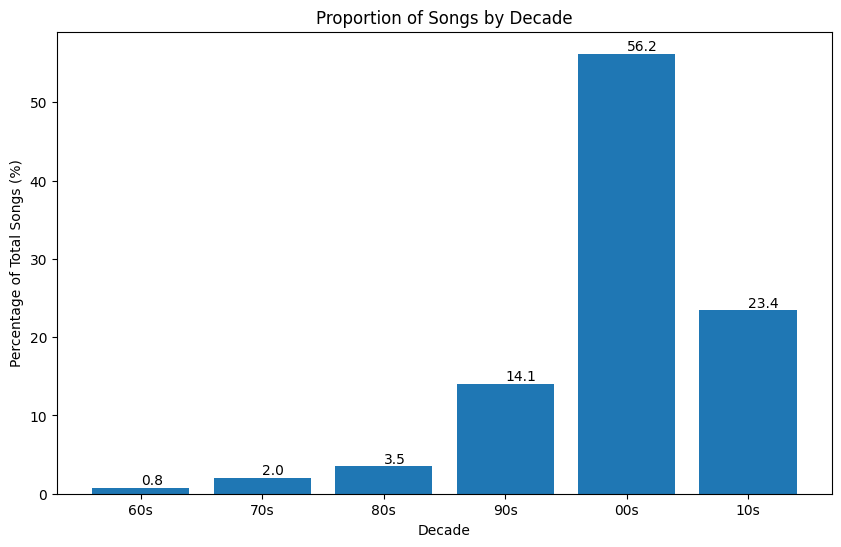

In [ ]:
proportions = [count / total_songs * 100 for count in [count_60, count_70, count_80, count_90, count_00, count_10]]
decades = ['60s', '70s', '80s', '90s', '00s', '10s']
plt.figure(figsize=(10, 6))
bars = plt.bar(decades, proportions)
for bar, proportion in zip(bars, proportions):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(proportion, 1), va='bottom')
plt.title('Proportion of Songs by Decade')
plt.xlabel('Decade')
plt.ylabel('Percentage of Total Songs (%)')
plt.show()

In [ ]:
def encode_year(year):
    if 1960 <= year <= 1969:
        return 1  # 60s
    elif 1970 <= year <= 1979:
        return 2  # 70s
    elif 1980 <= year <= 1989:
        return 3  # 80s
    elif 1990 <= year <= 1999:
        return 4  # 90s
    elif 2000 <= year <= 2009:
        return 5  # 00s
    elif 2010 <= year <= 2020:
        return 6  # 10s
    else:
        return 0  # For years outside the specified range

In [ ]:
year_after_1960['year_group'] = year_after_1960['year'].apply(encode_year)

<ipython-input-23-80dc64b360c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_after_1960['year_group'] = year_after_1960['year'].apply(encode_year)


In [ ]:
# covert year into year groups and encode them for better training processs
year_after_1960.drop(['60s', '70s', '80s', '90s', '00s', '10s', 'year'], axis=1)

,track_id,name,artist,tags,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_group
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,"rock, alternative, indie, alternative_rock, in...",NaN,0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,5
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,"rock, alternative, indie, pop, alternative_roc...",NaN,0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,5
2,TROUVHL128F426C441,Come as You Are,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",RnB,0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",NaN,0.279,0.664,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,5
4,TRLNZBD128F935E4D8,Creep,Radiohead,"rock, alternative, indie, alternative_rock, in...",RnB,0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50678,TRQYCFV128F9322F50,Ryusei Rocket,アンティック-珈琲店-,NaN,NaN,0.438,0.933,6,-3.062,0,0.1650,0.003120,0.000000,0.1300,0.421,166.956,5
50679,TRHQCSH128F42724B7,Colors Of The Wind,ACIDMAN,"rock, alternative_rock, japanese, cover",NaN,0.351,0.693,0,-6.811,1,0.1200,0.000940,0.000049,0.1920,0.450,200.350,5
50680,TRZRODK128F92D68D7,The Revelation,coldrain,"metal, metalcore, post_hardcore",NaN,0.434,0.975,10,-3.092,0,0.2680,0.000108,0.001410,0.1630,0.282,158.025,6
50681,TRGLMEM128F9322F63,Koi no Dependence,アンティック-珈琲店-,NaN,NaN,0.513,0.902,4,-3.914,0,0.0530,0.000715,0.001350,0.0571,0.618,109.923,5


In [ ]:
new_df = year_after_1960.copy(deep=True)

In [ ]:
new_df.drop(['year', 'genre', '60s', '70s', '80s', '90s', '00s', '10s'], axis=1, inplace=True) # Drop genre as many Nans there, also repitition with tags column

In [ ]:
new_df.head()

,track_id,name,artist,tags,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_group
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,"rock, alternative, indie, alternative_rock, in...",0.355,0.918,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,5
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,"rock, alternative, indie, pop, alternative_roc...",0.409,0.892,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,5
2,TROUVHL128F426C441,Come as You Are,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",0.508,0.826,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",0.279,0.664,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,5
4,TRLNZBD128F935E4D8,Creep,Radiohead,"rock, alternative, indie, alternative_rock, in...",0.515,0.430,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,5


In [ ]:
# Normalize features as numerical columns have varying scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'key', 'loudness', 'tempo']
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])

In [ ]:
new_df.head()

,track_id,name,artist,tags,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_group
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,"rock, alternative, indie, alternative_rock, in...",-0.774435,0.919025,-1.208617,0.864102,1,-0.018769,-0.701555,-0.668470,-0.640709,-0.746125,0.830211,5
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,"rock, alternative, indie, pop, alternative_roc...",-0.472476,0.815716,-0.928377,0.861241,1,-0.558135,-0.702821,-0.668470,-0.045724,0.842492,1.718472,5
2,TROUVHL128F426C441,Come as You Are,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",0.081115,0.553470,-0.367898,0.550993,0,-0.473941,-0.704910,-0.667108,-0.691058,0.425045,-0.118477,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",-1.199415,-0.090224,1.033301,-0.124072,1,-0.512092,-0.704202,-0.666527,-0.446351,0.220187,-0.640118,5
4,TRLNZBD128F935E4D8,Creep,Radiohead,"rock, alternative, indie, alternative_rock, in...",0.120258,-1.020006,0.472821,-0.362589,1,-0.514723,-0.671778,-0.668052,-0.468006,-1.271798,-1.069495,5


# 3.1 Traditional Switching Hyrbid Recommender

### 3.1.1 Content-Based Filtering

In [ ]:
# Read content dataset
import pandas as pd
df_content = pd.read_csv("Music Info.csv")

In [ ]:
# Read user dataset
df_user = pd.read_csv("User Listening History.csv")

In [ ]:
# Linking users to their tracks
df_user_tracks = df_user.groupby('user_id')['track_id'].agg(list).reset_index(drop=False)
print(f"Min number of tracks per user: {df_user_tracks.track_id.apply(lambda x: len(x)).min()}")
print(f"Mean number of tracks per user: {df_user_tracks.track_id.apply(lambda x: len(x)).mean()}")
print(f"Max number of tracks per user: {df_user_tracks.track_id.apply(lambda x: len(x)).max()}")
df_user_tracks.head()

Min number of tracks per user: 1
Mean number of tracks per user: 10.094519233667729
Max number of tracks per user: 784


,user_id,track_id
0,00000b722001882066dff9d2da8a775658053ea0,[TRQEBOU128F425D087]
1,00001638d6189236866af9bbf309ae6c2347ffdc,[TRBCDMC128F1452976]
2,0000175652312d12576d9e6b84f600caa24c4715,[TRHVDTF128F428D64C]
3,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,"[TRZPDFG128F92FDEF5, TRKABMK128F426BF72, TRGEI..."
4,0000267bde1b3a70ea75cf2b2d216cb828e3202b,"[TRPXIWX128F429831F, TRJGDTG128F421CE22, TRORD..."


In [ ]:
# Find total user playcounts
df_user_playcounts = df_user.groupby('user_id')['playcount'].sum().reset_index(drop=False)
df_user_playcounts.head()

,user_id,playcount
0,00000b722001882066dff9d2da8a775658053ea0,1
1,00001638d6189236866af9bbf309ae6c2347ffdc,1
2,0000175652312d12576d9e6b84f600caa24c4715,1
3,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,13
4,0000267bde1b3a70ea75cf2b2d216cb828e3202b,9


In [ ]:
# Find total track playcounts
df_track_playcounts = df_user.groupby('track_id')['playcount'].sum().reset_index(drop=False)
df_track_playcounts.head()

,track_id,playcount
0,TRAAAED128E0783FAB,315
1,TRAAAHD128F42635A5,2
2,TRAAAQO12903CD8E1C,1
3,TRAABJS128F9325C99,1831
4,TRAABXA128F9326351,37


In [ ]:
# Find users favourite song
most_listened = df_user.groupby('user_id')['playcount'].idxmax()
most_listened_tracks = df_user.loc[most_listened][['user_id', 'track_id', 'playcount']]
most_listened_tracks.head()

,user_id,track_id,playcount
2429068,00000b722001882066dff9d2da8a775658053ea0,TRQEBOU128F425D087,1
6756374,00001638d6189236866af9bbf309ae6c2347ffdc,TRBCDMC128F1452976,1
3650937,0000175652312d12576d9e6b84f600caa24c4715,TRHVDTF128F428D64C,1
1831359,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,TRZPDFG128F92FDEF5,2
5598082,0000267bde1b3a70ea75cf2b2d216cb828e3202b,TRPXIWX128F429831F,1


Due to computational complexity, cost and the lack of time to prepare the model fully, for these experiments we will be using the same sample of 100 users, with our definition of inactive users being those with less than 100 playcounts. This is to save time and further analysis as this model serves more as a baseline than the model we are providing.

The following computes the 100 user's favourite song, which will be used as a starting point for the information-retrieval based algorithms.

In [ ]:
# Sampling 100 Users
inactive_users = df_user_playcounts[df_user_playcounts['playcount'] < 100]['user_id'].tolist()
inactive_users = most_listened_tracks[most_listened_tracks['user_id'].isin(inactive_users)]
inactive_users = inactive_users.sample(n=100, random_state=1024)
inactive_users.head()

,user_id,track_id,playcount
731284,2a28893c9072ce8ae94558bced2d1e797df76c4a,TREIQEO128F9344352,2
4016835,162da6a50cc691b958329478a9d7797cb5ff4d1c,TRVKJMI128F1490EBA,1
6662916,df8c3545d87369129043894829bca31104d59557,TRERUDZ128F1465259,5
571583,449a85e86f79e6fda703ce9e06a70d3a5572db4f,TRPXIWX128F429831F,1
2211355,92c6ddf3dfb454c2f9d8b4556514cb2af79d9640,TRXESGJ12903CC04D2,2


Down below is the source code for the content-base filtering and evaluation of the experiments. Two sub-experiments were made to compare which method may work the best in content-based filtering for song recommendation.

*Although the original presentation noted three, the combined words and melodic features model was not considered, as there was a lack of time to finalise the third model, and it was not considered important in regards to deriving a baseline.

#### Bag of Words

This is a standardised approach when assessing similarity between content, when textual information is available. The df_content dataset contains name, artist, tags and genre. The general idea of this model is to simply create vector representations of tracks using these features to create 'documents', then use what listeners listen to find songs that are similar to theirs.

The experiments will use CountVectoriser and TfidfVectorizer with cosine similarity and this will be compared to a Word2Vec variant, Doc2Vec model to see which model performs the best.

**Further Dataset Preperation**

From dataset analysis, almost half of all songs have no genre and around 1000 songs without tags, however all songs have a name and artist. To make most of the dataset salvagable, I will be using a string representation that combines all of them, then searching for songs. There are also some inconsistencies regarding the language of the artist and name and the quantity of tags per song.

In [ ]:
# Find basic information about songs
print(f"There are {df_content.shape[0]} songs")
print(f"There are {df_content.genre.isna().sum()} songs without a genre")
print(f"There are {df_content.tags.isna().sum()} songs without tags")
print(f"There are {df_content.name.isna().sum()} songs without a name")
print(f"There are {df_content.artist.isna().sum()} songs without an artist")

There are 50683 songs
There are 28335 songs without a genre
There are 1127 songs without tags
There are 0 songs without a name
There are 0 songs without an artist


Find rows with names and artists in another language (or with language features not parseable by a word vectoriser). Assume that names and artists that use characters other than ASCII is in another language (or not understandable to any word vectoriser).


In [ ]:
# Function to check for non-ASCII characters in a string
def has_non_ascii(s):
    return any(ord(char) > 127 for char in s)

# Had non-ascii-name
print(f"{df_content.name.apply(lambda x: has_non_ascii(x)).sum()} songs contain non-ascii characters in the name.")
df_content['non-ascii-name'] = df_content.name.apply(lambda x: has_non_ascii(x))
# Has non-ascii artist
print(f"{df_content.artist.apply(lambda x: has_non_ascii(x)).sum()} songs contain non-ascii characters in the artist.")
df_content['non-ascii-artist'] = df_content.artist.apply(lambda x: has_non_ascii(x))

510 songs contain non-ascii characters in the name.
1274 songs contain non-ascii characters in the artist.


Hence, for the final string representation for the songs will only contain phrases that only have ascii-characters, with standard string cleaning practices such as removing all punctuation and special characters used in the dataset to form featues e.g. using '_' in creating unique tags such as 'alternative_rock'. Each of the phrases will be concatenated using spaces. Ideally if all of the information is contained for a song, then the name, artist, tags and genre are concatenated in that order.

To note, there may be repeated words and tags however this may be important to differentiate songs with have a stronger affinity to one genre over the other. For example, 'alternative rock' songs may have both the rock tag and the 'alternative rock' tag. Hence repeated words will be kept, as in this instance, repeated phrases may provide an advantage here.

In [ ]:
# Create string representation of song
def generate_string_rep(row):
    # Collect information
    name = row['name']
    artist = row['artist']
    # Tags and genre are already standardised
    tags = row['tags'].split(',')
    tags = " ".join([k.rstrip().lstrip() for k in tags])
    genre = row['genre']
    # Remove any punctuation in name and artist
    content = [name, artist, tags, genre]
    for i in range(len(content)):
        # Remove punctuation
        content[i] = re.sub('[^\w\s]', "", content[i])
        # Make lowercase
        content[i] = content[i].lower()
        # Remove non-ascii
        content[i] = content[i] if not has_non_ascii(content[i]) else ""
    # Remove _ (this is specific to tags)
    content[2] = re.sub('_', ' ', content[2])
    return " ".join(content).rstrip()

In [ ]:
import re

df_bow = df_content[['track_id', 'name', 'artist', 'tags', 'genre']]
# Replace na with empty string
df_bow = df_bow.fillna('')
# Process
df_bow['str_rep'] = df_bow.apply(lambda row: generate_string_rep(row), axis=1)
no_empty_reps = df_bow['str_rep'].apply(lambda x: x == "").sum()
print(f"{no_empty_reps} songs have empty string representation.")
df_bow.head()

10 songs have empty string representation.


,track_id,name,artist,tags,genre,str_rep
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,"rock, alternative, indie, alternative_rock, in...",,mr brightside the killers rock alternative ind...
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,"rock, alternative, indie, pop, alternative_roc...",,wonderwall oasis rock alternative indie pop al...
2,TROUVHL128F426C441,Come as You Are,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",RnB,come as you are nirvana rock alternative alter...
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",,take me out franz ferdinand rock alternative i...
4,TRLNZBD128F935E4D8,Creep,Radiohead,"rock, alternative, indie, alternative_rock, in...",RnB,creep radiohead rock alternative indie alterna...


Only 10 songs in the dataset do not have an empty string representation, which means we can utilise most of the dataset in some capacity to make it possible to recommend all songs.

**Experiments**

TfIdfVectorizer and the CountVectorizer were both considered, as the tags themselves in the corpus had high counts for certain tags, with approximately 1 out of 5 songs. It can be both considered tags with a high occurence could be less important or equally important as the other tags. Having certain tags with a higher occurence may make the tag less meaningful as could simply mean that 'rock' is simply diverse and covers all sorts of music. However, it could also still be an important tag as there is still a large diversity of music that isn't rock, which is the other 4 out 5 songs. Also, there are songs with multiple tags to distinguish music which may or may not play an importance in differentiating the vectorisations of the tracks.

Hence using both word vectorisation methods to see which one works or not, we compare the cosine similarity between a user's favourite song against the rest of the songs and pick the top 50 recommendations. No other similariry or distance metric was chosen as the aim of this task is to find similar songs in vector form through similarity, not via a difference acale, which distance measures do. All other types of metrics are not applicable in this context.

In [ ]:
# Running CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# CountVectorizer
vectorizer_count = CountVectorizer(stop_words=None, max_features=100)
count_matrix = vectorizer_count.fit_transform(df_bow['str_rep'])
df_count_matrix = pd.DataFrame(count_matrix, index=df_bow['track_id']).reset_index(drop=False)
# TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words=None, max_features=100)
tfidf_matrix = vectorizer_tfidf.fit_transform(df_bow['str_rep'])
df_tfidf_matrix = pd.DataFrame(tfidf_matrix, index=df_bow['track_id']).reset_index(drop=False)
# Merge pandas
df_merged_cv = pd.merge(inactive_users, df_count_matrix, on='track_id')
df_merged_tfidf = pd.merge(inactive_users, df_tfidf_matrix, on='track_id')

# Helper function
from sklearn.metrics.pairwise import cosine_similarity
from time import time

def custom_calculation_bow(row1, row2):
    # Exclude the row with the maximum value in each group
    if row1['track_id'] == row2['track_id']:
        return None
    result = cosine_similarity(row1[0], row2[0])
    return result

def create_recommendations_per_user_bow(df1, df2, no_recommendations):
    recommendations = []
    scores = []
    for index1, row1 in df1.iterrows():
        similarity_scores = []
        track_id = []
        for index2, row2 in df2.iterrows():
            similarity_scores.append(custom_calculation_bow(row1, row2))
            track_id.append(row2['track_id'])
        temp_df = pd.DataFrame()
        temp_df['sim'] = similarity_scores
        temp_df['track_id'] = track_id
        sorted_df = temp_df.sort_values(by='sim', ascending=False)
        sorted_df_top_N = sorted_df.head(no_recommendations)
        recommendations.append(sorted_df_top_N['track_id'].tolist())
        scores.append(sorted_df_top_N['sim'].tolist())
    df1['recommendations'] = recommendations
    df1['sim'] = scores

In [ ]:
%%time
# Run Information Retrieval using CountVectorizer
create_recommendations_per_user_bow(df_merged_cv, df_count_matrix, 50)

In [ ]:
%%time
# Run Information Retrieval using TfIdfVectorizer
create_recommendations_per_user_bow(df_merged_tfidf, df_tfidf_matrix, 50)

Considering the Doc2Vec model (a Word2Vec variant), is a Continous Bag of Words model that is used to find similar documents. As Word2Vec is used by Spotify themselves on their recommender algorithm, this experiment was to see if neural network could compare to the more traditional Bag of Words models. The potential of this model is this is better at detecting similarity and the relationship between the words themselves, rather than with the previous models making assumptions on the relationships betwen the features in the previous models.

In [ ]:
# Doc2Vec
import nltk
import gensim
from gensim.models.doc2vec import TaggedDocument, Doc2Vec

tagged_data = [TaggedDocument(words=doc.split(' '), tags=[doc_id]) for doc_id, doc in zip(df_bow['track_id'], df_bow['str_rep'])]
model = Doc2Vec(vector_size=100, workers=4)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
%%time
# Run Information Retrieval using Doc2Vec
df_d2v_merged = pd.merge(inactive_users, df_bow, on='track_id')
df_d2v_merged['tokens'] = df_d2v_merged['str_rep'].apply(lambda x: x.split(' '))
recommendations = []
for index, row in df_d2v_merged.iterrows():
    inferred_vector = model.infer_vector(row['tokens'])
    similar_documents = list(model.dv.most_similar([inferred_vector], topn=50))
    recommendations.append(similar_documents)
df_d2v_merged['recommendations'] = recommendations

#### Bag of Melodies

The 'Bag of Melodies' model, is another information retrieval task, however rather than relying on language for information retrieval we use the other melodic features as a way to find songs that are similar to each other.

This experiment will be similar to the previous ones, where a user's favourite song will be used to provide a list of recommendations using cosine similarity.

**Further Dataset Preperation**

In [ ]:
# Create sub-dataset
df_bom = df_content.drop(columns=['name', 'artist', 'tags', 'spotify_preview_url', 'spotify_id', 'genre', 'non-ascii-name', 'non-ascii-artist'])
# Find basic info on columns
df_basic_insights = {}
for column in df_bom.columns:
    if column == 'track_id':
        continue
    df_basic_insights[column] = []
    df_basic_insights[column].append(df_bom[column].nunique())
    df_basic_insights[column].append(df_bom[column].min())
    df_basic_insights[column].append(df_bom[column].max())
    df_basic_insights[column].append(df_bom[column].mean())
    df_basic_insights[column].append(df_bom[column].var())
index = ['No. Unique', 'Min', 'Max', 'Mean', 'Var']
df_basic_insights = pd.DataFrame(df_basic_insights, index=index)
df_basic_insights

,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
No. Unique,75.000000,2.420200e+04,1086.000000,1600.000000,12.000000,15316.000000,2.000000,1300.000000,5193.000000,5245.000000,1696.000000,1649.000000,36157.000000,5.000000
Min,1900.000000,1.439000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,2022.000000,3.816373e+06,0.986000,1.000000,11.000000,3.642000,1.000000,0.954000,0.996000,0.999000,0.999000,0.993000,238.895000,5.000000
Mean,2004.017323,2.511551e+05,0.493537,0.686486,5.312748,-8.291204,0.631060,0.076023,0.213808,0.225283,0.215425,0.433134,123.507682,3.898151
Var,78.502640,1.157474e+10,0.031983,0.063407,12.731179,20.687624,0.232828,0.005777,0.091717,0.113602,0.034113,0.066967,877.411044,0.176123


From the above, there are a few labels with limited labels, such as the mode and time_signature columns, which pertain to very little as there was no explaination to what these labels neccessarily mean. Also some columns widly vary, and have values less than one, which could affect the performance of computing the similarity as some variables may pertain to more weight numerically than they logically affect the song's similarity.

To balance the weightage (or have the vector representations of melodies be more reflective of what is important to the likeability of a song) in regards to content, the year, duration_ms, and mode columns should be dropped.

The year is not considered to be important in this instance, as it may be an inherently redundant featuee. A user will mostly like songs with similar tunes, regardless of when it is produced. Although music evolves over time, songs similar to the melody are likely to from the same time period regardless, hence this a redundant feature in regards to a melodic content-filtering method.

The duration_ms is not entirely important either as this does not relate to the melodic features of a song at all, any song with any melody can technically be of any length, hence this feature is redundant.

The mode can be used as an important framework to understanding music which pertains to the ordering of notes, there are only two labels. This does not really provide much additional information. There in total seven modes of music, and with most of the music only being modes 0 and 1 (whatever their label designation means), it does not provide a significant factor in finding music that is similar or dissimilar.

In [ ]:
df_bom = df_bom.drop(columns=['year', 'duration_ms', 'mode'])
df_bom.head()

,track_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,0.355,0.918,1,-4.360,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,0.409,0.892,2,-4.373,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,0.508,0.826,4,-5.783,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,0.279,0.664,9,-8.851,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,0.515,0.430,7,-9.935,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


Left with this, there are still features which could be more unfairly weighted than the other ones, which may not provide a realistic representation of a melody and what users may consider in which songs are actually similar melodic wise.

The best approach here would to assume that all features follow a normal distribution in relation to how music is generally produced melodic wise. As there isn't really any determining factors which are more so important one over the other in regards to see which features of music are more deterministic in its nature to see if two songs are similar or not. Many songs may follow along the same lines as tempo, liveliness and speechiness but then differ in instrumentalness and instrumentalness, but they still could be similar in terms of their genre. Hence, as there is no deterministic approach to weigh features over one another, normalising the entire matrix will evenly weigh each feature.

It is also likely that music follows a normal distribution as many songs within the same genre, and across genres will have similar features due to the tastes in music when they were produced and may follow a pattern.

In [ ]:
# Standardise dataset for training and testing
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
columns_to_normalize = df_bom.columns.tolist()[1:]
df_subset = df_bom[columns_to_normalize]
df_bom_subset = pd.DataFrame(standard_scaler.fit_transform(df_subset), columns=columns_to_normalize)
df_bom_normalized = pd.concat([df_bom.drop(columns=columns_to_normalize), df_bom_subset], axis=1)
df_bom_normalized['vector_rep'] = df_bom_normalized.drop(columns=['track_id']).values.tolist()
df_merged_bom = pd.merge(inactive_users.drop(columns=['playcount']), df_bom_normalized, on='track_id')
df_merged_bom['vector_rep'] = df_merged_bom.drop(columns=['track_id'])[columns_to_normalize].values.tolist()

**Experiments**

Similar to the Bag of Words models, cosine similarity will be used on the user's favourite song to recommend 50 songs for them using the functions before.

In [ ]:
def custom_calculation_bom(row1, row2):
    # Exclude the row with the maximum value in each group
    if row1['track_id'] == row2['track_id']:
        return None
    result = cosine_similarity([row1['vector_rep']], [row2['vector_rep']])
    return result

def create_recommendations_per_user_bom(df1, df2, no_recommendations):
    recommendations = []
    scores = []
    for index1, row1 in df1.iterrows():
        similarity_scores = []
        track_id = []
        for index2, row2 in df2.iterrows():
            similarity_scores.append(custom_calculation_bom(row1, row2))
            track_id.append(row2['track_id'])
        temp_df = pd.DataFrame()
        temp_df['sim'] = similarity_scores
        temp_df['track_id'] = track_id
        sorted_df = temp_df.sort_values(by='sim', ascending=False)
        sorted_df_top_N = sorted_df.head(no_recommendations)
        recommendations.append(sorted_df_top_N['track_id'].tolist())
        scores.append(sorted_df_top_N['sim'].tolist())
    df1['recommendations'] = recommendations
    df1['sim'] = scores

In [ ]:
%%time
create_recommendations_per_user_bom(df_merged_bom, df_bom_normalized, 50)

#### Conclusion

In [ ]:
# Bag of Words Evaluation
# CountVectoriser
df_merged_bom_cv_model = df_merged_cv.merge(df_user_tracks, on='user_id')
intersections_cv = []
i = 0
k = 0
while i < 100:
    tracks = df_merged_bom_model['tracks'][i]
    recommendations = [k[0] for k in df_merged_bom_cv_model['recommendations'][i]]
    print(recommendations)
    intersections.append(list(set(track).intersection(set(rec))))
    i += 1

# TfIdfVectorizer
df_merged_bom_tfidf_model = df_merged_tfidf.merge(df_user_tracks, on='user_id')
intersections_ = []
i = 0
k = 0
while i < 100:
    tracks = df_merged_bom_model['tracks'][i]
    recommendations = [k[0] for k in df_merged_bom_tfidf_model['recommendations'][i]]
    print(recommendations)
    intersections.append(list(set(track).intersection(set(rec))))
    i += 1

# Bag of Melodies Evaluation
df_merged_d2v_model = df_d2v_merged.merge(df_user_tracks, on='user_id')
intersections = []
i = 0
k = 0
while i < 100:
    tracks = df_merged_bom_model['tracks'][i]
    recommendations = [k[0] for k in df_merged_bom_model['recommendations'][i]]
    print(recommendations)
    intersections.append(list(set(track).intersection(set(rec))))
    i += 1

In [ ]:
# Bag of Melodies Evaluation
df_merged_bom_model = df_bom_merged.merge(df_user_tracks, on='user_id')
intersections = []
i = 0
k = 0
while i < 100:
    tracks = df_merged_bom_model['tracks'][i]
    recommendations = [k[0] for k in df_merged_bom_model['recommendations'][i]]
    print(recommendations)
    intersections.append(list(set(track).intersection(set(rec))))
    i += 1
# Equates to zero intersections

Evaluating this method for users with less than 100 playcounts, results with zero recommendations that potentially match. This indicates the methods made undelying assumptions that were wrong, or the data used to provide recommendations i.e. using 100 randomly sampled used was too small to evaluate or approximate the potential usefulness of the model. Also the process of using a favourite single song may have been the wrong approach, given that it is better to use a collection of songs to gauge a user's test.

This does not neccessarily mean that the algorithm could be bad, it just seems unlikely to work. Although the 50 recommendations did not match the exact listened tracks of users, it does not neccessarily mean that the music recommended won't be well recieved. All it means is that if the model does have any level of correctness, it recommended songs that are similar which the user hasn't come across.

Also working with in-active users just means that we won't have substantial data to come across any potential matches if any at all. Maybe if different samples or larger samples were used, we could potentially see some matching, however due to time constraints, running the model with the larger sample provided difficult to evaluate the model comprehensively in isolation.

For the evaluation of the traditional hybrid system entirely, we will assume that this model conceptually works and that the CF performance is equivalent to the performance of the content-based filtering. Although this isn't a correct assumption to make, this is what had to be done to at least evaluate the other approaches and compare. Usually systems like these are the baseline and are the simplest recommender systems to conjure and compare to.

### 3.1.2 Content-Based Filtering(active users)

**Acitve users:**

For each active user,  select the top 10  songs with highest
playcount. And then find the most 5  similar songs based on song features for each of these 10 songs from all tracks but excluding tracks users already listened. These top 50 songs recommended will be compared to testing dataset.

**Inactive users(cold start):**

To cold start problem, we can also recommend songs based on similarity users already listened.

In [ ]:
track_df = new_df # Track dataframe after propressing in step 2.3
track_df.head()

,track_id,name,artist,tags,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_group
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,"rock, alternative, indie, alternative_rock, in...",-0.774435,0.919025,-1.208617,0.864102,1,-0.018769,-0.701555,-0.668470,-0.640709,-0.746125,0.830211,5
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,"rock, alternative, indie, pop, alternative_roc...",-0.472476,0.815716,-0.928377,0.861241,1,-0.558135,-0.702821,-0.668470,-0.045724,0.842492,1.718472,5
2,TROUVHL128F426C441,Come as You Are,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",0.081115,0.553470,-0.367898,0.550993,0,-0.473941,-0.704910,-0.667108,-0.691058,0.425045,-0.118477,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",-1.199415,-0.090224,1.033301,-0.124072,1,-0.512092,-0.704202,-0.666527,-0.446351,0.220187,-0.640118,5
4,TRLNZBD128F935E4D8,Creep,Radiohead,"rock, alternative, indie, alternative_rock, in...",0.120258,-1.020006,0.472821,-0.362589,1,-0.514723,-0.671778,-0.668052,-0.468006,-1.271798,-1.069495,5


In [ ]:
import pandas as pd
listening_info = pd.read_csv('./User Listening History.csv')
listening_info.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [ ]:
# Grouping by 'user_id' and summing 'playcount'
grouped_listening_info = listening_info.groupby('user_id')['playcount'].sum().reset_index()


# Filtering out rows where 'playcount' is less than 100 which were seen as inactive users
active_users = grouped_listening_info[grouped_listening_info['playcount'] >= 100]
active_users.describe()

,playcount
count,48558.000000
mean,170.268895
std,93.525707
min,100.000000
25%,116.000000
50%,141.000000
75%,190.000000
max,2953.000000


In [ ]:
# Filter 'listening_info' to keep only rows where 'user_id' is in 'filtered_df'
active_users_listening = listening_info[listening_info['user_id'].isin(active_users['user_id'])]

In [ ]:
active_users_listening.head()

,track_id,user_id,playcount
121,TRLATHU128F92FC275,5a905f000fc1ff3df7ca807d57edb608863db05d,11
122,TRMKFPN128F42858C3,5a905f000fc1ff3df7ca807d57edb608863db05d,2
123,TRTSSUT128F1472A51,5a905f000fc1ff3df7ca807d57edb608863db05d,1
124,TRNJLKP128F427CE28,5a905f000fc1ff3df7ca807d57edb608863db05d,1
125,TRGAOLV128E0789D40,5a905f000fc1ff3df7ca807d57edb608863db05d,2


In [ ]:
active_users_listening.describe()

,playcount
count,2.189236e+06
mean,3.776622e+00
std,1.006706e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,2.948000e+03


In [ ]:
# Active users tracks count distribution
track_counts = active_users_listening.groupby('user_id')['track_id'].count()
track_counts.describe()

count    48558.000000
mean        45.084971
std         35.963037
min          1.000000
25%         19.000000
50%         36.000000
75%         62.000000
max        784.000000
Name: track_id, dtype: float64

In [ ]:
# Filter out users with fewer than 100 tracks
users_less_100_tracks = track_counts[track_counts < 100].index

# Remove the rows corresponding to these users from the original DataFrame
active_users_listening = active_users_listening[~active_users_listening['user_id'].isin(users_less_100_tracks)]

In [ ]:
# Active users with at least 100 tracks:
track_counts = active_users_listening.groupby('user_id')['track_id'].count()
track_counts.describe()

count    3636.000000
mean      133.355611
std        38.353253
min       100.000000
25%       108.000000
50%       121.000000
75%       144.000000
max       784.000000
Name: track_id, dtype: float64

In [ ]:
# Merge two dataframes above
merged_df = active_users_listening.merge(track_df, on='track_id', how='inner')
merged_df.head()

,track_id,user_id,playcount,name,artist,tags,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_group
0,TRLATHU128F92FC275,5a905f000fc1ff3df7ca807d57edb608863db05d,11,Freedom Blade,This Will Destroy You,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
1,TRLATHU128F92FC275,2ae68984bdd7798cc4fba2b7ec8563a3a15565a1,2,Freedom Blade,This Will Destroy You,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
2,TRLATHU128F92FC275,a4493d7bb8c07dc19e4208c8ed6925ec40300d36,6,Freedom Blade,This Will Destroy You,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
3,TRLATHU128F92FC275,f3825861e5575cf4206f883630754fa30c80721e,1,Freedom Blade,This Will Destroy You,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
4,TRLATHU128F92FC275,cdfb84846bea721d2050be040b9c83b195b37c71,1,Freedom Blade,This Will Destroy You,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5


In [ ]:
# Normalize playcount using logarithm as original playcount value extends up to 2948
merged_df.loc[:, 'playcount'] = np.log1p(merged_df['playcount'])

# Encoding user and track ID
user_ids = merged_df['user_id'].unique().tolist()
track_ids = merged_df['track_id'].unique().tolist()
artists = merged_df['artist'].unique().tolist()

merged_df.loc[:, 'user_id'] = merged_df['user_id'].apply(lambda x: user_ids.index(x))
merged_df.loc[:, 'track_id'] = merged_df['track_id'].apply(lambda x: track_ids.index(x))
merged_df.loc[:, 'artist'] = merged_df['artist'].apply(lambda x: artists.index(x))

merged_df.head()

<ipython-input-41-e1f2c8c18e82>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged_df.loc[:, 'user_id'] = merged_df['user_id'].apply(lambda x: user_ids.index(x))
<ipython-input-41-e1f2c8c18e82>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged_df.loc[:, 'track_id'] = merged_df['track_id'].apply(lambda x: track_ids.index(x))
<ipython-input-41-e1f2c8c18e82>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior,

,track_id,user_id,playcount,name,artist,tags,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_group
0,0,0,2.484907,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
1,0,1,1.098612,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
2,0,2,1.945910,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
3,0,3,0.693147,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
4,0,4,0.693147,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5


In [ ]:
merged_df = merged_df.drop(['name', 'tags'], axis=1)

In [ ]:
# Splitting data into train and test sets, randomly select 40 tracks for testing
train = pd.DataFrame()
test = pd.DataFrame()

for user_id, group in merged_df.groupby('user_id'):
    test_tracks = group.sample(n=40, random_state=42)  # Randomly select 40 tracks
    train_tracks = group.drop(test_tracks.index)  # Remaining tracks for training

    train = pd.concat([train, train_tracks])
    test = pd.concat([test, test_tracks])

**Active users recommendation and simulation:**

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import random

# Randomly select 500 users
unique_users = train['user_id'].unique()
selected_users = random.sample(list(unique_users), 500)

# For each user, select top 10 songs
top_songs_per_user = {}
for user in selected_users:
    top_songs = train[train['user_id'] == user].nlargest(10, 'playcount')
    top_songs_per_user[user] = top_songs['track_id'].tolist()

# Prepare data for cosine similarity calculation
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'year_group']
merged_df_unique = merged_df.drop_duplicates(subset='track_id')
all_track_features = merged_df_unique[features].values

# Find the 5 most similar songs for each of these top 10 songs
similar_songs_per_top_song = {}
for user, top_songs in top_songs_per_user.items():
    user_train_track_ids = train[train['user_id'] == user]['track_id'].unique()
    for song in top_songs:
        song_features = merged_df_unique[merged_df_unique['track_id'] == song][features].values
        similarities = cosine_similarity(song_features, all_track_features)[0]

        # Get potential recommendations excluding the tracks user has seen in training
        filtered_indices = ~merged_df_unique['track_id'].isin(user_train_track_ids)
        filtered_similarities = similarities[filtered_indices]
        potential_recommendations = merged_df_unique[filtered_indices].reset_index(drop=True)
        potential_recommendations['similarity'] = filtered_similarities

        # Get top 5 similar songs
        top_5_similar = potential_recommendations.nlargest(5, 'similarity')
        similar_songs_per_top_song[song] = top_5_similar['track_id'].tolist()

In [ ]:
# Calculate Hit Rate
hit_count = 0

# Iterate over each user and their top 50 selected songs
for user, top_songs in top_songs_per_user.items():
    # Flatten the list of top 5 similar songs for each top 10 song
    recommended_songs = [song for top_song in top_songs for song in similar_songs_per_top_song[top_song]]

    # Test dataset songs for this user
    test_songs = test[test['user_id'] == user]['track_id'].tolist()

    # Check for hits
    hit = any(song in recommended_songs for song in test_songs)
    if hit:
        hit_count += 1

# Calculate average hit rate
average_hit_rate = hit_count / len(selected_users)
print(f"Average Hit Rate: {average_hit_rate}")

Average Hit Rate: 0.168


### 3.1.3 Collaborative Filtering Method

**CF Data Processing**

Firstly, I filtered out the inactive users on a dataset of user listening histories., which by our team’s definition is when the user’s aggregated play count is less than or equal to 100. This is to ensure that the collaborative filtering method will be more accurate. Then, I also normalised the play counts by calculating the z-score which is grouped by the users so that it will effectively standardise user activity levels, allowing for a more accurate and comparable recommendations across diverse user profiles.

In [ ]:
import pandas as pd
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from scipy.stats import zscore

# Read the user listening history dataset and convert it into a dataframe
df = pd.read_csv('./datasets/user_listening_history.csv')
df = df.drop_duplicates()

# Filter users by total listening count of at least 100
# Group by 'user_id' and filter out those who have a sum of 'playcount' less than or equal to 100
user_playcount_total = df.groupby('user_id')['playcount'].sum()
eligible_users = user_playcount_total[user_playcount_total > 100].index.tolist()
df = df[df['user_id'].isin(eligible_users)]

# Apply z-score normalization within each user group
df['playcount_zscore'] = df.groupby('user_id')['playcount'].transform(lambda x: zscore(x, ddof=1))
df['playcount_zscore'] = df['playcount_zscore'].fillna(0)

print(df.shape)
print(df.head)

# Define a reader and specify the scale of ratings based on normalized playcount
reader = Reader(rating_scale=(df['playcount_zscore'].min(), df['playcount_zscore'].max()))

# Load the dataset into Surprise format
data = Dataset.load_from_df(df[['user_id', 'track_id', 'playcount_zscore']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/homebrew/lib/python3.11/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


(2161734, 4)
<bound method NDFrame.head of                    track_id                                   user_id  \
121      TRLATHU128F92FC275  5a905f000fc1ff3df7ca807d57edb608863db05d   
122      TRMKFPN128F42858C3  5a905f000fc1ff3df7ca807d57edb608863db05d   
123      TRTSSUT128F1472A51  5a905f000fc1ff3df7ca807d57edb608863db05d   
124      TRNJLKP128F427CE28  5a905f000fc1ff3df7ca807d57edb608863db05d   
125      TRGAOLV128E0789D40  5a905f000fc1ff3df7ca807d57edb608863db05d   
...                     ...                                       ...   
9711269  TRGCHLH12903CB7352  8305c896f42308824da7d4386f4b9ee584281412   
9711270  TRVSJOM12903CD2DC1  8305c896f42308824da7d4386f4b9ee584281412   
9711271  TRAALAH128E078234A  8305c896f42308824da7d4386f4b9ee584281412   
9711272  TRTKLFX12903CD2DC2  8305c896f42308824da7d4386f4b9ee584281412   
9711273  TRZYAGJ128F9332CEF  8305c896f42308824da7d4386f4b9ee584281412   

         playcount  playcount_zscore  
121             11          2.153980  
12

In [ ]:
print(df['playcount_zscore'].min())
print(df['playcount_zscore'].max())

-4.163395580358177
14.322645658197992


**Implement Different CF Models**

I did experiments using the different models that the surprise library offered. I started with matrix factorisation methods such as SVD, SVD++ and NMF since they are not memory intensive, then I started to explore KNN. I used the basic KNN as in the tutorials as a control, and I tried KNNBaseline as well which takes into account a baseline rating. Finally, just for completion, I tried other models like CoClustering and SlopeOne just to see how they would perform against the more common models. Each algorithm has unique characteristics. For example, SVD and SVD++ are matrix factorisation methods known for handling sparse datasets efficiently, while NMF decomposes the user-item interaction matrix into non-negative factors. KNN and its variants work by finding similar users or items, whereas Slope One is a simple yet effective linear regression model, and CoClustering clusters the data in two dimensions (users and items).

**CF Evaluation Metrics**

I used RMSE and MAE as the primary metrics to evaluate the performance of each algorithm. These metrics are crucial for understanding the accuracy of predictions. Additionally, I introduced a hit rate metric in my evaluation process. This metric measures the proportion of test tracks that appear in the top-N recommendations, providing a direct assessment of recommendation relevance.

In [ ]:
from surprise import SVD
from surprise.model_selection import cross_validate

# Using 80/20 Split
model_svd = SVD()
model_svd.fit(trainset)
predictions_svd = model_svd.test(testset)
rmse_svd = accuracy.rmse(predictions_svd)
print(f"SVD RMSE: {rmse_svd}")
mae_svd = accuracy.mae(predictions_svd)
print(f"SVD MAE: {mae_svd}")

# Using Cross Validation with 5 Folds
cross_validate(model_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

RMSE: 0.9827
SVD RMSE: 0.9827301618722567
MAE:  0.6434
SVD MAE: 0.6434460067470195
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9837  0.9879  0.9894  0.9889  0.9885  0.9877  0.0020  
MAE (testset)     0.6427  0.6438  0.6449  0.6443  0.6445  0.6440  0.0008  
Fit time          11.85   11.67   12.39   12.28   12.28   12.09   0.28    
Test time         1.96    1.99    1.94    1.93    1.97    1.96    0.02    


{'test_rmse': array([0.98373048, 0.98794754, 0.98940673, 0.98891954, 0.98854495]),
 'test_mae': array([0.64269501, 0.64377497, 0.64493979, 0.64434767, 0.64446029]),
 'fit_time': (11.849040031433105,
  11.666693210601807,
  12.385087966918945,
  12.283392667770386,
  12.281012058258057),
 'test_time': (1.9616329669952393,
  1.989259958267212,
  1.9411468505859375,
  1.9308390617370605,
  1.966383934020996)}

In [ ]:
from surprise import SVDpp

# Using 80/20 Split
model_svdpp = SVDpp()
model_svdpp.fit(trainset)
predictions_svdpp = model_svdpp.test(testset)
rmse_svdpp = accuracy.rmse(predictions_svdpp)
print(f"SVD++ RMSE: {rmse_svdpp}")
mae_svdpp = accuracy.mae(predictions_svdpp)
print(f"SVD++ MAE: {mae_svdpp}")

# Using Cross Validation with 5 Folds
cross_validate(model_svdpp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

RMSE: 0.9904
SVD++ RMSE: 0.9904223385158865
MAE:  0.6481
SVD++ MAE: 0.6481257812081606
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9942  0.9936  0.9935  0.9971  0.9940  0.9945  0.0013  
MAE (testset)     0.6481  0.6478  0.6489  0.6471  0.6470  0.6478  0.0007  
Fit time          52.43   52.57   53.71   52.75   52.78   52.85   0.45    
Test time         13.35   12.23   13.13   12.22   14.53   13.09   0.85    


{'test_rmse': array([0.99417124, 0.99362329, 0.99354172, 0.99712225, 0.99396373]),
 'test_mae': array([0.64813637, 0.64776596, 0.64893329, 0.64706195, 0.64702256]),
 'fit_time': (52.433732986450195,
  52.56695294380188,
  53.70564818382263,
  52.75417709350586,
  52.781773805618286),
 'test_time': (13.345324754714966,
  12.22864294052124,
  13.134616136550903,
  12.220486164093018,
  14.527693033218384)}

In [ ]:
from surprise import NMF

# Using 80/20 Split
model_nmf = NMF()
model_nmf.fit(trainset)
predictions_nmf = model_nmf.test(testset)
rmse_nmf = accuracy.rmse(predictions_nmf)
print(f"NMF RMSE: {rmse_nmf}")
mae_nmf = accuracy.mae(predictions_nmf)
print(f"NMF MAE: {mae_nmf}")

# Using Cross Validation with 5 Folds
cross_validate(model_nmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

RMSE: 1.3939
NMF RMSE: 1.3938980096461668
MAE:  0.7892
NMF MAE: 0.7891535762176715
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4037  1.3977  1.3754  1.3678  1.4094  1.3908  0.0163  
MAE (testset)     0.7880  0.7899  0.7815  0.7801  0.7913  0.7862  0.0045  
Fit time          16.44   15.85   16.42   16.23   16.65   16.32   0.27    
Test time         2.07    2.08    0.93    2.04    2.10    1.84    0.46    


{'test_rmse': array([1.40366091, 1.39774062, 1.37543403, 1.3677574 , 1.40944555]),
 'test_mae': array([0.7880228 , 0.78993307, 0.78146586, 0.78006103, 0.79131364]),
 'fit_time': (16.437840938568115,
  15.852707862854004,
  16.415915966033936,
  16.23005986213684,
  16.646836042404175),
 'test_time': (2.0665290355682373,
  2.0763120651245117,
  0.9267210960388184,
  2.039400815963745,
  2.1014039516448975)}

In [ ]:
from surprise import KNNBasic

# Using 80/20 Split
model_knn = KNNBasic()
model_knn.fit(trainset)
predictions_knn = model_knn.test(testset)
rmse_knn = accuracy.rmse(predictions_knn)
print(f"KNN RMSE: {rmse_knn}")
mae_knn = accuracy.mae(predictions_knn)
print(f"KNN MAE: {mae_knn}")

# Cross Validation not used due to run time

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9732
KNN RMSE: 0.9732077024265534
MAE:  0.6099
KNN MAE: 0.6099448696506398


In [ ]:
from surprise import KNNBaseline

# Using 80/20 Split
model_knnb = KNNBaseline()
model_knnb.fit(trainset)
predictions_knnb = model_knnb.test(testset)
rmse_knnb = accuracy.rmse(predictions_knnb)
print(f"KNNBaseline RMSE: {rmse_knnb}")
mae_knnb = accuracy.mae(predictions_knnb)
print(f"KNNBaseline MAE: {mae_knnb}")

# Cross Validation not used due to run time

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9847
KNNBaseline RMSE: 0.9846773668219163
MAE:  0.6200
KNNBaseline MAE: 0.6199569307859307


In [ ]:
from surprise import SlopeOne

# Using 80/20 Split
model_slopeone = SlopeOne()
model_slopeone.fit(trainset)
predictions_slopeone = model_slopeone.test(testset)
rmse_slopeone = accuracy.rmse(predictions_slopeone)
print(f"SlopeOne RMSE: {rmse_slopeone}")
mae_slopeone = accuracy.mae(predictions_slopeone)
print(f"SlopeOne MAE: {mae_slopeone}")

# Using Cross Validation with 5 Folds
cross_validate(model_slopeone, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

RMSE: 1.0101
SlopeOne RMSE: 1.0100934549849347
MAE:  0.6665
SlopeOne MAE: 0.6665002861427302
Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0114  1.0135  1.0149  1.0139  1.0155  1.0138  0.0014  
MAE (testset)     0.6651  0.6663  0.6669  0.6661  0.6668  0.6663  0.0006  
Fit time          13.31   14.13   14.30   15.17   14.68   14.32   0.62    
Test time         15.40   12.48   15.33   13.05   15.86   14.42   1.38    


{'test_rmse': array([1.0113928 , 1.0135273 , 1.01488667, 1.01387642, 1.01554282]),
 'test_mae': array([0.66513093, 0.66632443, 0.66694892, 0.66613918, 0.66681313]),
 'fit_time': (13.310464143753052,
  14.13100528717041,
  14.29786992073059,
  15.169382810592651,
  14.681979179382324),
 'test_time': (15.404247045516968,
  12.477869749069214,
  15.33122706413269,
  13.04672884941101,
  15.856777906417847)}

In [ ]:
from surprise import CoClustering

# Using 80/20 Split
model_cc = CoClustering()
model_cc.fit(trainset)
predictions_cc = model_cc.test(testset)
rmse_cc = accuracy.rmse(predictions_cc)
print(f"CoClustering RMSE: {rmse_cc}")
mae_cc = accuracy.mae(predictions_cc)
print(f"CoClustering MAE: {mae_cc}")

# Using Cross Validation with 5 Folds
cross_validate(model_cc, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

RMSE: 1.0172
CoClustering RMSE: 1.017203501828869
MAE:  0.7482
CoClustering MAE: 0.7481865896473385
Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0184  1.0216  1.0237  1.0208  1.0199  1.0209  0.0017  
MAE (testset)     0.7458  0.7480  0.7476  0.7482  0.7476  0.7475  0.0008  
Fit time          15.67   14.07   16.80   14.90   15.67   15.42   0.91    
Test time         3.10    0.79    2.56    0.80    0.79    1.61    1.01    


{'test_rmse': array([1.01842347, 1.02159448, 1.02366026, 1.02084394, 1.01989217]),
 'test_mae': array([0.74584865, 0.74799424, 0.74764337, 0.7482119 , 0.74763299]),
 'fit_time': (15.674405097961426,
  14.066251039505005,
  16.797977209091187,
  14.898092031478882,
  15.673598051071167),
 'test_time': (3.1026499271392822,
  0.7871270179748535,
  2.560512065887451,
  0.8016440868377686,
  0.7918109893798828)}

In [ ]:
# example show
from collections import defaultdict

def get_top_n_recommendations(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Get the top 5 recommendations for each user
top_n = get_top_n_recommendations(predictions_svd, n=5)

# Example: Get recommendations for a specific user_id
user_id = '8305c896f42308824da7d4386f4b9ee584281412'
user_recommendations = top_n[user_id]

print(user_recommendations)

[('TRHNBHR128F9350E67', 1.1028639809361196), ('TRONYHY128F92C9D11', 0.29132794804977036), ('TRAFUNV128F92CFEB2', 0.14404901819394017), ('TRRVJCK12903CD2DCB', 0.11878722724711685), ('TRDGUPO128F9332CF6', 0.10531589237968987)]


**CF Results and Findings As Below**

My experimentation revealed that each algorithm has its strengths and weaknesses. For instance, KNN methods like KNNBasic and KNNBaseline performed well in terms of RMSE and MAE, indicating high accuracy. However, SVD and SVD++ showed better results in the hit rate metric, indicating their potential for more relevant recommendations. The experimentation underlined the importance of balancing accuracy with relevance. While RMSE and MAE are essential for evaluating prediction accuracy, the hit rate provides insights into the actual user experience and satisfaction.

In [ ]:
# Comparison of MAE
print(f"SVD MAE:               {mae_svd}")
print(f"SVD++ MAE:             {mae_svdpp}")
print(f"NMF MAE:               {mae_nmf}")
print(f"KNN MAE:               {mae_knn}")
# print(f"KNN User-Based CF MAE: {mae_knnu}")
print(f"KNNBaseline MAE:       {mae_knnb}")
print(f"SlopeOne MAE:          {mae_slopeone}")
print(f"CoClustering MAE:      {mae_slopeone}")

SVD MAE:               0.6434460067470195
SVD++ MAE:             0.6481257812081606
NMF MAE:               0.7891535762176715
KNN MAE:               0.6099448696506398
KNNBaseline MAE:       0.6199569307859307
SlopeOne MAE:          0.6665002861427302
CoClustering MAE:      0.6665002861427302


In [ ]:
# Comparison of RMSE
print(f"SVD RMSE:               {rmse_svd}")
print(f"SVD++ RMSE:             {rmse_svdpp}")
print(f"NMF RMSE:               {rmse_nmf}")
print(f"KNN RMSE:               {rmse_knn}")
# print(f"KNN User-Based CF RMSE: {rmse_knnu}")
print(f"KNNBaseline RMSE:       {rmse_knnb}")
print(f"SlopeOne RMSE:          {rmse_slopeone}")
print(f"CoClustering RMSE:      {rmse_slopeone}")

SVD RMSE:               0.9827301618722567
SVD++ RMSE:             0.9904223385158865
NMF RMSE:               1.3938980096461668
KNN RMSE:               0.9732077024265534
KNNBaseline RMSE:       0.9846773668219163
SlopeOne RMSE:          1.0100934549849347
CoClustering RMSE:      1.0100934549849347


In [ ]:
# Splitting data into train and test sets, randomly select 40 tracks for testing
train = pd.DataFrame()
test = pd.DataFrame()

for user_id, group in df.groupby('user_id'):
    test_tracks = group.sample(n=40, random_state=42, replace=True)  # Randomly select 40 tracks
    train_tracks = group.drop(test_tracks.index)  # Remaining tracks for training

    train = pd.concat([train, train_tracks])
    test = pd.concat([test, test_tracks])

**Generating Recommendations**

I created a function to generate personalised top-N recommendations for each user. This function is unique in its consideration of both the predicted rating and the diversity of recommendations, aiming to enhance user experience and discovery.

In [ ]:
import numpy as np
# Evaluate with Hit Rate which means if any test track appear in the top-N recommendations

# Get top n recommendation tracks with one user
def top_n_recommend(model, user_id, all_tracks, user_seen_tracks, n):
    track_ids = [track for track in all_tracks if track not in user_seen_tracks]

    # Adjust the prediction method as needed for the model
    predictions = []
    for track_id in track_ids:
        predictions.append(model.predict(user_id, track_id).est)

    # Get top n tracks with highest playcounts predicted
    top_n_index = np.argsort(predictions)[-n:]
    top_n_tracks = [track_ids[i] for i in top_n_index]

    return top_n_tracks

# Calculate average hit rate across all test datasets
def average_hit_rate(model, test_data, all_tracks, n):
    total_hit_count = 0
    user_count = 0

    for user_id, group in test_data.groupby('user_id'):
        # Get user_seen_tracks from the training dataset
        user_seen_tracks = train[train['user_id'] == user_id]['track_id'].tolist()
        top_n_recommends = top_n_recommend(model, user_id, all_tracks, user_seen_tracks, n)
        test_tracks = group['track_id'].values

        hit = any(track in top_n_recommends for track in test_tracks)
        total_hit_count += int(hit)
        user_count += 1

    return total_hit_count / user_count if user_count > 0 else 0

all_tracks = pd.unique(df['track_id'])
n = 50

# Choose 100 users track records from test dataset for testing
unique_users = test['user_id'].unique()
sample_users = np.random.choice(unique_users, size=100, replace=False)
test_data = test[test['user_id'].isin(sample_users)]

hit_rate_svd = average_hit_rate(model_svd, test_data, all_tracks, n)
hit_rate_svdpp = average_hit_rate(model_svdpp, test_data, all_tracks, n)
hit_rate_nmf = average_hit_rate(model_nmf, test_data, all_tracks, n)
hit_rate_knn = average_hit_rate(model_knn, test_data, all_tracks, n)
hit_rate_knnb = average_hit_rate(model_knnb, test_data, all_tracks, n)
hit_rate_slopeone = average_hit_rate(model_slopeone, test_data, all_tracks, n)
hit_rate_cc = average_hit_rate(model_cc, test_data, all_tracks, n)

print(f'SVD Hit Rate:            {hit_rate_svd}')
print(f'SVD++ Hit Rate:          {hit_rate_svdpp}')
print(f'NMF Hit Rate:            {hit_rate_nmf}')
print(f'KNNBasic Hit Rate:       {hit_rate_knn}')
print(f'KNNBaseline Hit Rate:    {hit_rate_knnb}')
print(f'SlopeOne Hit Rate:       {hit_rate_slopeone}')
print(f'CoClustering Hit Rate:   {hit_rate_cc}')

SVD Hit Rate:            0.45
SVD++ Hit Rate:          0.37
NMF Hit Rate:            0.04
KNNBasic Hit Rate:       0.04
KNNBaseline Hit Rate:    0.04
SlopeOne Hit Rate:       0.01
CoClustering Hit Rate:   0.0


**CF Results Analysis:**

The disparity between RMSE/MAE and hit rate results indicates that high accuracy does not always correlate with high user satisfaction - while accuracy metrics such as RMSE and MAE are important, they do not fully capture the user experience in a recommendation system. The hit rate, although a more challenging metric to optimise, provides a more realistic measure of how likely users are to appreciate the recommended items. The z-score normalisation approach was pivotal in ensuring fairness in recommendations. It catered to a more balanced recommendation system, addressing the challenge of varying user interaction levels. The top-N recommendation function, on the other hand, highlighted the importance of diversity and novelty in recommendations, aspects often overlooked in traditional systems.


**CF Conclusion:**

In conclusion, this demonstrates that while traditional metrics like RMSE and MAE are vital for evaluating the accuracy of recommendation algorithms, they should be complemented with user-centric metrics like hit rate. The methods developed and implemented in this project, such as z-score normalisation and the top-N recommendation generator, provide a more rounded and effective approach to building recommendation systems. Therefore, we can conclude that SVD is the best model that we can use given the circumstances, with its relatively high hit rate.

# 3.3 Neural Collaborative Filtering (NCF) Method

**Load file and select active users:**

In [ ]:
import pandas as pd
listening_info = pd.read_csv('./User Listening History.csv')
listening_info.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [ ]:
# Grouping by 'user_id' and summing 'playcount'
grouped_listening_info = listening_info.groupby('user_id')['playcount'].sum().reset_index()


# Filtering out rows where 'playcount' is less than 100 which were seen as inactive users
active_users = grouped_listening_info[grouped_listening_info['playcount'] >= 100]
active_users.describe()

,playcount
count,48558.000000
mean,170.268895
std,93.525707
min,100.000000
25%,116.000000
50%,141.000000
75%,190.000000
max,2953.000000


In [ ]:
# Filter 'listening_info' to keep only rows where 'user_id' is in 'filtered_df'
active_users_listening = listening_info[listening_info['user_id'].isin(active_users['user_id'])]

In [ ]:
active_users_listening.head()

,track_id,user_id,playcount
121,TRLATHU128F92FC275,5a905f000fc1ff3df7ca807d57edb608863db05d,11
122,TRMKFPN128F42858C3,5a905f000fc1ff3df7ca807d57edb608863db05d,2
123,TRTSSUT128F1472A51,5a905f000fc1ff3df7ca807d57edb608863db05d,1
124,TRNJLKP128F427CE28,5a905f000fc1ff3df7ca807d57edb608863db05d,1
125,TRGAOLV128E0789D40,5a905f000fc1ff3df7ca807d57edb608863db05d,2


In [ ]:
active_users_listening.describe()

,playcount
count,484881.000000
mean,1.982043
std,3.254870
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1134.000000


In [ ]:
# Active users tracks count distribution
track_counts = active_users_listening.groupby('user_id')['track_id'].count()
track_counts.describe()

count    3636.000000
mean      133.355611
std        38.353253
min       100.000000
25%       108.000000
50%       121.000000
75%       144.000000
max       784.000000
Name: track_id, dtype: float64

In [ ]:
# Filter out users with fewer than 100 tracks
users_less_100_tracks = track_counts[track_counts < 100].index

# Remove the rows corresponding to these users from the original DataFrame
active_users_listening = active_users_listening[~active_users_listening['user_id'].isin(users_less_100_tracks)]

In [ ]:
# Active users with at least 100 tracks:
track_counts = active_users_listening.groupby('user_id')['track_id'].count()
track_counts.describe()

count    3636.000000
mean      133.355611
std        38.353253
min       100.000000
25%       108.000000
50%       121.000000
75%       144.000000
max       784.000000
Name: track_id, dtype: float64

In [ ]:
active_users_listening.describe()

,playcount
count,484881.000000
mean,1.982043
std,3.254870
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1134.000000


**Data preprocessing:**



*   Encode user_id and track_id
*   Normalize play_count using logarithm
*   Tran/Test dataset split, 40 tracks for testing, left for training



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import legacy

In [ ]:
# Normalize playcount using logarithm as original playcount value extends up to 2948
active_users_listening.loc[:, 'playcount'] = np.log1p(active_users_listening['playcount'])

# Encoding user and track ID
user_ids = active_users_listening['user_id'].unique().tolist()
track_ids = active_users_listening['track_id'].unique().tolist()

active_users_listening.loc[:, 'user_id'] = active_users_listening['user_id'].apply(lambda x: user_ids.index(x))
active_users_listening.loc[:, 'track_id'] = active_users_listening['track_id'].apply(lambda x: track_ids.index(x))

In [ ]:
active_users_listening.describe()

,playcount
count,484881.000000
mean,0.949428
std,0.442407
min,0.693147
25%,0.693147
50%,0.693147
75%,1.098612
max,7.034388


**Implement 3 models for NCF method and compare them**


1.   Neural Network model(MLP)
2.   Generalised Matrix Factorisation(GMF)
3.   Neural Matrix Factorisation(NeuMF)

This method is based on method proposed in the paper '[Neural Collaborative Filtering by He et al. from 2017](https://arxiv.org/pdf/1708.05031.pdf)'. On the one side, we have a standard matrix factorization network (GMF) and on the other a multilayer perceptron network (MLP). The idea is to take advantage of both the linearity and non-linearity of the two networks, and combined them together to get the final score
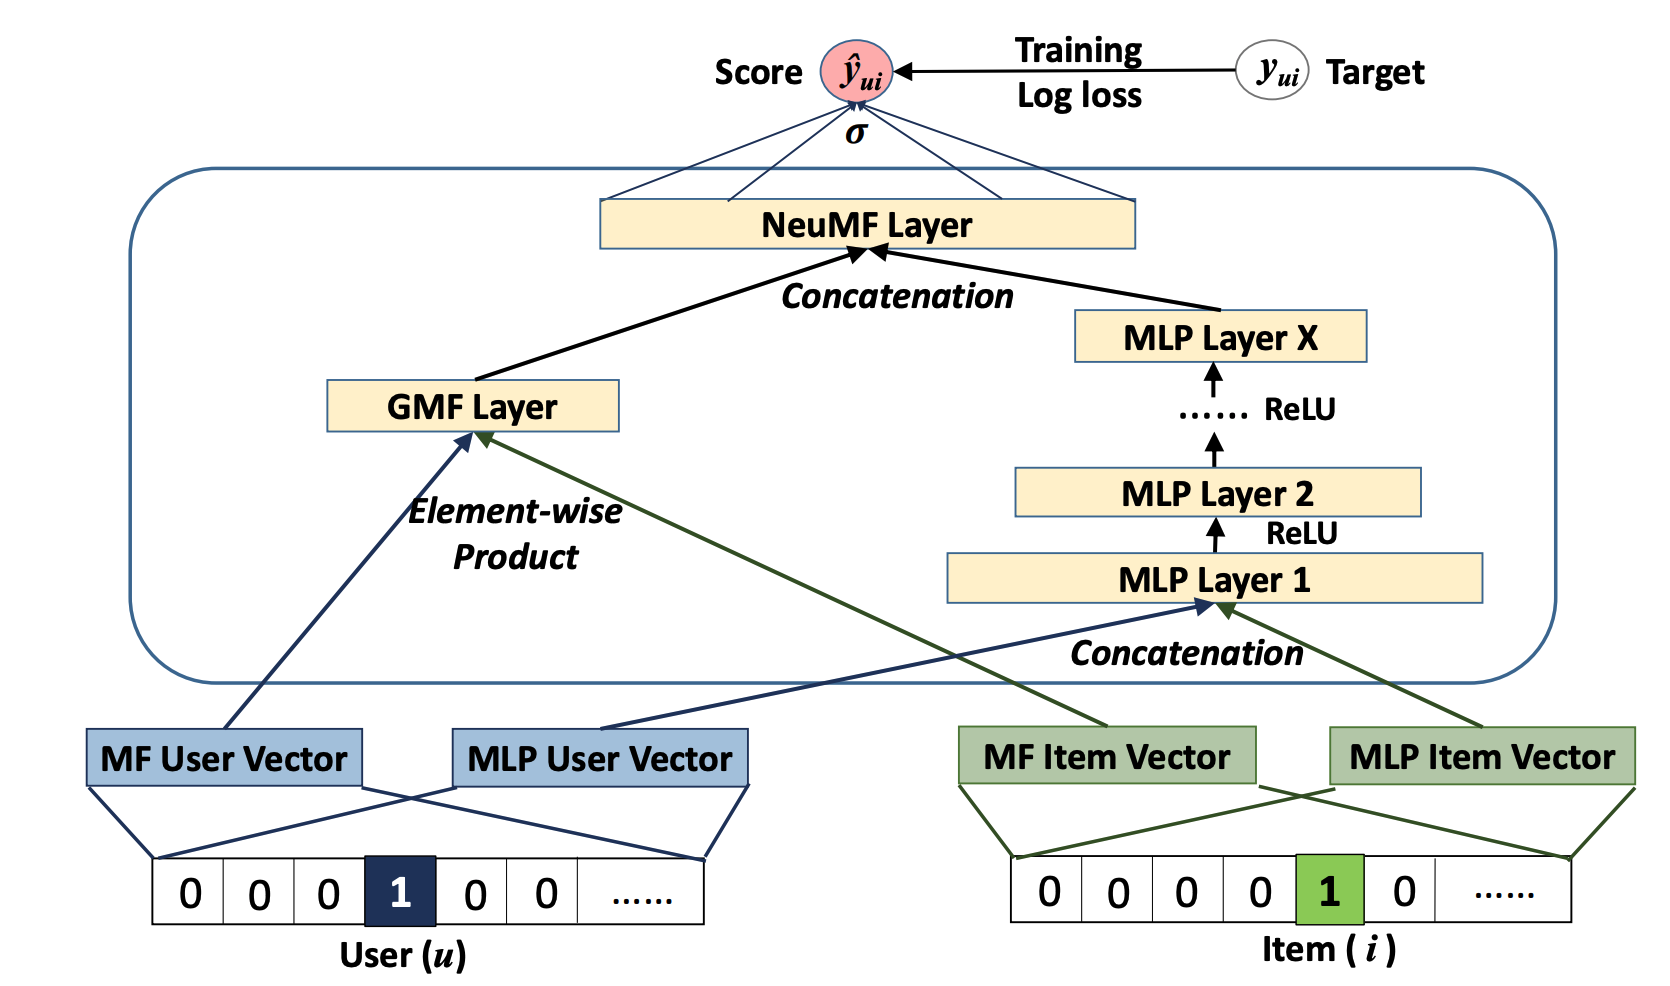


**MLP Model:**

MLP, is another name for “the simplest kind of deep neural network”. We have at least one hidden layer of neurons and each neuron has some kind of non-linear activation function. The layers are then densely connected, so each neuron in one layer is connected to every neuron in the next layer and so on.

After some experiments, the optimal MLP network consists of 3 dense hidden layers and ReLu as the activation.


In [ ]:
# Splitting data into train and test sets, randomly select 40 tracks for testing
train = pd.DataFrame()
test = pd.DataFrame()

for user_id, group in active_users_listening.groupby('user_id'):
    test_tracks = group.sample(n=40, random_state=42)  # Randomly select 40 tracks
    train_tracks = group.drop(test_tracks.index)  # Remaining tracks for training

    train = pd.concat([train, train_tracks])
    test = pd.concat([test, test_tracks])

In [ ]:
# Neural MLP
n_users = len(user_ids)
n_tracks = len(track_ids)
n_latent_factors = 30

# User embedding
user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(n_users, n_latent_factors, name='user-embedding')(user_input)
user_vec = Flatten(name='user-vector')(user_embedding)

# Track embedding
track_input = Input(shape=[1], name='track-input')
track_embedding = Embedding(n_tracks, n_latent_factors, name='track-embedding')(track_input)
track_vec = Flatten(name='track-vector')(track_embedding)


# Concatenate, dense layer and dropout layer
concat = Concatenate()([user_vec, track_vec])
dense_layer_1 = Dense(64, activation='relu')(concat)
dropout_layer_1 = Dropout(.2)(dense_layer_1)
dense_layer_2 = Dense(32, activation='relu')(dropout_layer_1)
dropout_layer_2 = Dropout(.2)(dense_layer_2)
dense_layer_3 = Dense(8, activation='relu')(dropout_layer_2)
dropout_layer_3 = Dropout(.2)(dense_layer_3)
output = Dense(1,
        activation='sigmoid',
        kernel_initializer="lecun_uniform",
        name='output_layer')(dropout_layer_3)

# output = Dense(1)(dropout_layer_2)

# Define model
model = Model([user_input, track_input], output)
model.compile(optimizer=legacy.Adam(0.0001), loss='mean_squared_error')

# Train model
history = model.fit([train.user_id.values.astype('int32'), train.track_id.values.astype('int32')], train.playcount.values.astype('float32'),
                    epochs=5,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=128)


Epoch 1/5
2387/2387 [==============================] - 20s 8ms/step - loss: 0.2186 - val_loss: 0.1931
Epoch 2/5
2387/2387 [==============================] - 19s 8ms/step - loss: 0.1869 - val_loss: 0.1920
Epoch 3/5
2387/2387 [==============================] - 19s 8ms/step - loss: 0.1875 - val_loss: 0.1921
Epoch 4/5
2387/2387 [==============================] - 19s 8ms/step - loss: 0.1881 - val_loss: 0.1927
Epoch 5/5
2387/2387 [==============================] - 19s 8ms/step - loss: 0.1887 - val_loss: 0.1926


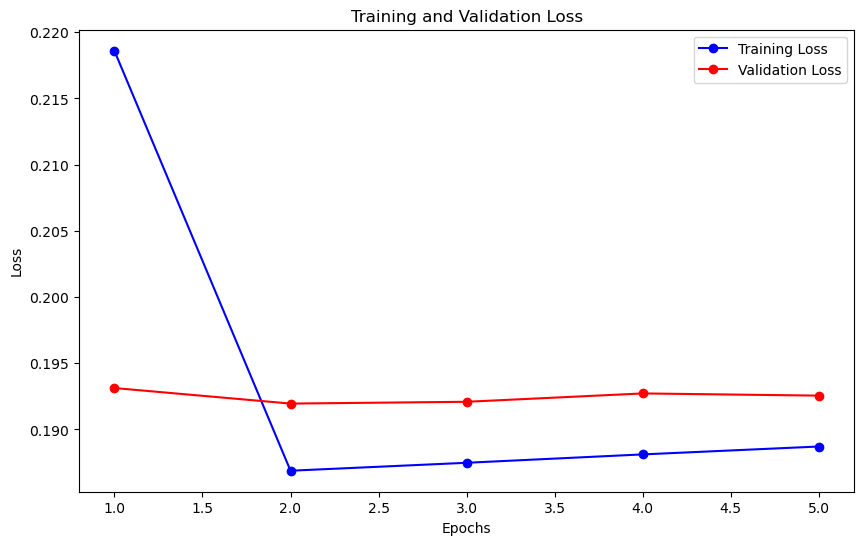

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 track-input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 user-embedding (Embedding)  (None, 1, 30)                109080    ['user-input[0][0]']          
                                                                                                  
 track-embedding (Embedding  (None, 1, 30)                652110    ['track-input[0][0]']         
 )                                                                                         

Evaluate MLP model with MAE/RMSE:

In [ ]:
# Evaluate with MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

test_user_ids = test['user_id'].values.astype('int32')
test_track_ids = test['track_id'].values.astype('int32')
actual_playcounts = test['playcount'].values.astype('float32')

# Predict test data
predicted_playcounts = model.predict([test_user_ids, test_track_ids]).flatten()

# Calculate MAE
mae = mean_absolute_error(actual_playcounts, predicted_playcounts)
print(f"MAE: {mae}")

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_playcounts, predicted_playcounts))
print(f"RMSE: {rmse}")

4545/4545 [==============================] - 6s 1ms/step
MAE: 0.3253229558467865
RMSE: 0.43293511137834145


Evaluate MLP model with Hit Rate:

In [ ]:
# Evaluate with Hit Rate which means if any test track appear in the top-N recommendations
# Get top n recommendation tracks with one user
def top_n_recommend(model, user_id, all_tracks, user_seen_tracks, n):
    track_to_predict = [track for track in all_tracks if track not in user_seen_tracks]

    user_ids = np.array([user_id] * len(track_to_predict), dtype='int32')
    track_ids = np.array(track_to_predict, dtype='int32')

    # Predict playcount for all tracks with this user
    predictions = model.predict([user_ids, track_ids]).flatten()

    # Get top n tracks with highest playcounts predicted
    top_n_index = np.argsort(predictions)[-n:]
    top_n_tracks = [all_tracks[i] for i in top_n_index]

    return top_n_tracks

# Calculate average hit rate across all test datasets
def average_hit_rate(model, test_data, all_tracks, n):
    total_hit_count = 0
    user_count = 0

    for user_id, group in test_data.groupby('user_id'):

        # Get user_seen_tracks from training dataset
        user_seen_tracks = train[train['user_id'] == user_id]['track_id'].tolist()
        top_n_recommends = top_n_recommend(model, user_id, all_tracks, user_seen_tracks, n)
        test_tracks = group['track_id'].values

        print(user_id)
        print(test_tracks)
        print(top_n_recommends)

        hit = any(track in top_n_recommends for track in test_tracks)
        if hit:
            print('***')
        total_hit_count += int(hit)
        print(total_hit_count)
        user_count += 1
    print('----')
    print(user_count)
    return total_hit_count/user_count if user_count > 0 else 0

all_tracks = pd.unique(active_users_listening['track_id'])
n = 50

# Choose 100 users track records from test dataset for testing
unique_users = test['user_id'].unique()
sample_users = np.random.choice(unique_users, size=500, replace=False)
test_data = test[test['user_id'].isin(sample_users)]

hit_rate = average_hit_rate(model, test_data, all_tracks, n)
print(f'The Hit Rate is {hit_rate}')

677/677 [==============================] - 1s 1ms/step
3
[203 447 417 426 484 454 493 437 52 403 456 413 478 137 445 457 285 414
 408 489 421 405 407 401 444 428 402 491 479 455 226 468 170 429 458 411
 494 250 63 180]
[2763, 6128, 9388, 8390, 2268, 7930, 83, 486, 768, 756, 70, 501, 3303, 1624, 1608, 364, 1051, 10023, 5132, 2388, 2634, 6757, 8786, 16656, 3752, 7381, 6184, 1339, 136, 1313, 5969, 4716, 1751, 1326, 2904, 816, 3799, 705, 20, 1038, 183, 5026, 793, 481, 688, 345, 684, 179, 125, 177]
0
678/678 [==============================] - 1s 1ms/step
13
[1553 1576 1571 765 119 234 37 1056 266 9 747 1616 1184 1617 1192 467 92
 1612 1630 609 1577 1588 1607 1140 1198 577 1595 1614 12 1594 490 154 1575
 1586 91 1610 35 1591 1572 1601]
[8414, 2292, 7954, 83, 563, 841, 829, 70, 578, 3327, 1648, 1632, 371, 1122, 10047, 5156, 2412, 2658, 6781, 8810, 16680, 3776, 7405, 6208, 1408, 136, 1382, 5993, 4740, 1775, 1395, 2928, 103, 889, 3823, 111, 778, 19, 1109, 184, 5050, 866, 558, 761, 351, 757, 179

678/678 [==============================] - 1s 1ms/step
136
[7636 398 2996 7631 921 226 2840 1415 798 6079 69 433 1873 1171 6602 225
 229 2733 81 3159 400 1938 1461 3580 1135 34 6090 236 529 738 41 778 3334
 6410 7633 567 612 1573 3488 238]
[6167, 9415, 8417, 2320, 7957, 86, 559, 831, 819, 73, 574, 3350, 1678, 1662, 372, 1111, 10050, 5176, 2437, 2682, 6793, 8813, 16683, 3799, 7417, 6223, 1396, 138, 1370, 6011, 4762, 1805, 1383, 2951, 105, 878, 3846, 114, 769, 20, 1098, 187, 5070, 855, 555, 752, 352, 748, 128, 166]
3
670/670 [==============================] - 1s 1ms/step
141
[7826 1509 7865 1167 7825 377 7860 5845 1619 7222 7799 7812 1064 2237 4899
 7789 7857 7800 7796 5669 7847 7791 5233 4598 7803 7786 128 277 3155 7837
 3182 2697 5210 6703 7856 408 1390 1130 7839 7862]
[2879, 3018, 500, 2713, 5998, 9171, 8173, 2245, 7713, 83, 521, 794, 782, 70, 534, 3236, 1612, 1596, 1064, 9806, 2359, 2590, 6623, 8569, 16439, 3681, 7242, 6054, 1338, 136, 1316, 5855, 4625, 1738, 1327, 2853, 103, 840, 37

677/677 [==============================] - 1s 1ms/step
255
[203 2265 2213 426 1793 4738 1624 651 10000 9 116 2762 146 2288 2263 2616
 5144 3088 15 4756 37 7064 7067 10430 98 5223 1879 1358 909 4740 229 241
 2990 1590 4744 4887 273 256 9221 10]
[8394, 2301, 7934, 86, 557, 835, 823, 73, 572, 3329, 1675, 1659, 365, 1111, 10025, 5144, 2420, 2666, 6764, 8790, 16656, 3775, 7385, 6194, 1396, 137, 1370, 5979, 4734, 1800, 1383, 2931, 879, 3822, 112, 772, 20, 1098, 183, 5039, 859, 552, 755, 345, 751, 179, 127, 164, 176, 277]
***
8
676/676 [==============================] - 1s 1ms/step
258
[1272 3315 886 5824 252 8921 1142 1390 6979 3272 1250 2237 197 2365 9204
 5262 1251 1307 1135 5204 768 8512 748 3627 427 3266 3297 5810 8202 869
 5812 3372 6793 10451 3997 4108 4113 1021 2659 1618]
[6118, 9355, 8364, 2308, 7906, 86, 557, 836, 824, 73, 572, 3315, 1669, 1654, 369, 1115, 9989, 5131, 2426, 2666, 6743, 8757, 16614, 3757, 7360, 6174, 141, 1370, 5959, 4716, 1795, 2935, 106, 883, 3804, 115, 773, 20, 11

677/677 [==============================] - 1s 1ms/step
419
[9048 3536 44 429 2393 9171 1623 8431 1591 3573 106 2869 4111 10640 91
 2710 1381 1710 23 158 1589 849 1582 1285 9556 3395 12 493 904 692 105
 6389 501 58 113 567 918 150 69 8329]
[8392, 2291, 7932, 66, 532, 809, 799, 57, 547, 3323, 1652, 1636, 340, 1089, 10024, 5148, 2411, 2657, 6760, 8788, 16656, 3771, 7384, 6196, 1372, 106, 1346, 5981, 4733, 1779, 1359, 2927, 80, 854, 3818, 88, 748, 15, 1076, 150, 5042, 832, 527, 731, 320, 727, 145, 127, 142, 252]
***
15
677/677 [==============================] - 1s 1ms/step
421
[9786 5062 5462 12516 12509 9467 2957 1389 10299 7553 6886 12519 11282
 9545 12521 5685 12524 5452 9837 12523 4423 5673 10294 5677 8375 6218
 12507 10316 3735 9793 4392 2119 11291 6935 666 2983 12494 4174 8728 1988]
[8439, 2356, 7979, 87, 579, 861, 849, 74, 594, 1717, 1701, 384, 1144, 10063, 5203, 2476, 2722, 6812, 8833, 16669, 3830, 7432, 6245, 1432, 142, 1406, 6033, 4792, 1844, 1419, 2986, 107, 909, 3877, 116, 798,

678/678 [==============================] - 1s 1ms/step
552
[13691 1169 13694 1232 1229 3725 1178 1916 13689 4957 5929 2241 2185 2394
 2460 4958 1262 7016 4386 430 13698 453 2781 2331 2850 498 13690 2288 5167
 13688 2292 4539 2304 1239 2238 12761 287 9024 1167 3915]
[8432, 2328, 7972, 87, 567, 848, 836, 74, 582, 3358, 1693, 1677, 379, 1128, 10062, 5176, 2446, 2691, 6799, 8828, 16686, 3804, 7423, 6227, 1409, 140, 1383, 6012, 4768, 1818, 1396, 2960, 107, 896, 3851, 114, 785, 21, 1116, 191, 5071, 873, 562, 769, 360, 765, 186, 129, 183, 292]
19
678/678 [==============================] - 1s 1ms/step
557
[494 17 6 2831 264 107 51 1532 489 405 207 205 3756 1101 28 2710 699 138
 2444 67 1392 244 692 414 1640 4763 3461 1168 23 135 1211 150 11 449 155
 44 61 1973 166 134]
[510, 2794, 6155, 9415, 8417, 2301, 7957, 72, 532, 812, 800, 60, 547, 3333, 1659, 1643, 340, 1091, 10050, 5159, 2420, 2666, 6784, 8813, 16683, 3780, 7408, 6211, 1376, 115, 1350, 5996, 4743, 1786, 1363, 2935, 87, 860, 3827, 94, 7

676/676 [==============================] - 1s 1ms/step
685
[2671 3995 3455 1136 427 1175 414 220 209 5811 3574 244 266 2444 2579 2562
 1220 492 416 1649 1248 248 405 1155 5047 111 3461 1168 748 179 396 4761
 3770 251 1135 180 3696 223 871 616]
[3078, 512, 2761, 6117, 9377, 8379, 2274, 7919, 87, 534, 809, 797, 74, 548, 3299, 1635, 1619, 353, 1085, 10010, 5123, 2393, 2634, 6746, 8775, 16643, 3747, 7370, 6173, 1359, 142, 1333, 5958, 4708, 1759, 1346, 2902, 107, 856, 3794, 116, 747, 21, 1073, 5017, 529, 731, 334, 727, 131]
24
678/678 [==============================] - 1s 1ms/step
701
[4548 3115 4579 2887 8430 10742 3825 645 11150 5405 2209 2432 8351 6411
 1674 11913 7775 4553 4383 5768 8634 10649 7972 14569 4414 128 2640 3527
 4564 14567 12929 10821 5029 14570 7973 14571 14566 3669 11167 3525]
[9435, 8438, 2351, 7982, 87, 577, 858, 846, 74, 592, 3374, 1712, 1696, 382, 1140, 10068, 5190, 2467, 6813, 8834, 16684, 3820, 7435, 6241, 1427, 142, 6026, 4778, 1839, 1414, 2977, 107, 906, 3867, 116,

678/678 [==============================] - 1s 1ms/step
822
[138 2814 8 144 1660 121 9809 78 4773 296 1553 139 2307 11438 302 232 104
 7400 1628 70 1583 2603 117 2562 576 13084 2085 135 28 73 778 384 21 1903
 1747 464 51 69 9 96]
[6152, 9411, 8413, 2303, 7953, 73, 536, 814, 802, 61, 551, 3335, 1665, 1649, 343, 1096, 10046, 5160, 2423, 2667, 6780, 8809, 16678, 3782, 7404, 6208, 1383, 112, 1358, 5993, 4745, 1791, 1370, 2937, 862, 3829, 92, 754, 17, 1083, 156, 5054, 839, 532, 737, 324, 733, 134, 149, 256]
***
27
677/677 [==============================] - 1s 1ms/step
826
[9403 6891 4659 37 2903 9003 85 3770 106 855 5021 1296 1915 11184 2531
 10170 39 6912 9305 1331 5811 2205 5206 1635 1626 426 2258 691 4352 3756
 2209 48 13467 189 4033 2808 1663 12465 2446 29]
[2798, 6148, 9398, 8401, 2305, 7941, 81, 546, 826, 814, 68, 561, 3336, 1666, 1650, 1106, 10033, 5156, 2425, 2670, 6777, 8797, 16658, 3779, 7399, 6204, 1387, 129, 1361, 5989, 4740, 1793, 1374, 2939, 98, 874, 3826, 106, 763, 20, 1093, 1

677/677 [==============================] - 1s 1ms/step
933
[10922 6086 14891 1305 10527 2950 10504 5359 9951 9781 12692 2930 15868
 285 5023 7328 8277 8820 1673 10796 2924 14890 5792 6721 6783 7818 2266
 8300 1831 6716 2209 6087 4945 9931 1751 2970 15871 11284 14689 5221]
[9408, 8417, 2342, 7960, 86, 574, 853, 841, 73, 589, 1705, 1689, 382, 1134, 10039, 5186, 2461, 2707, 6796, 8809, 16658, 3810, 7411, 6232, 1420, 141, 1394, 6019, 4771, 1830, 1407, 2968, 106, 901, 3857, 115, 792, 21, 1121, 193, 5080, 878, 570, 775, 771, 188, 130, 170, 185, 295]
32
678/678 [==============================] - 1s 1ms/step
934
[2774 3047 2272 1461 7017 15873 1118 13190 1283 2630 2653 2665 799 2750
 1107 1380 8720 1896 15094 3510 3245 2707 2658 8984 10941 1553 13532 2684
 3159 3334 7862 2473 7637 1944 4966 1489 8999 1328 9494 12016]
[2340, 7977, 87, 578, 859, 847, 74, 593, 3364, 1702, 1686, 383, 1139, 10065, 5190, 2460, 2698, 6810, 8833, 16685, 3812, 7433, 6237, 1423, 142, 1398, 6022, 4774, 1827, 1410, 2967, 

677/677 [==============================] - 1s 1ms/step
1018
[6722 2776 956 2264 13382 13427 4487 1957 16235 3365 8492 13434 15271 5759
 1193 16233 1284 5880 1691 16237 5091 2097 9199 546 3378 9294 522 1196
 5089 1264 8470 3219 658 8395 4603 11055 5488 1605 5112 5083]
[9407, 8412, 2344, 7955, 850, 838, 74, 589, 3365, 1701, 1685, 383, 1130, 10042, 5172, 2464, 2708, 6786, 8808, 16664, 3810, 7409, 6218, 1416, 141, 1390, 6003, 4765, 1828, 1403, 2976, 106, 898, 3857, 115, 788, 21, 1117, 193, 5067, 875, 570, 771, 363, 767, 188, 130, 170, 185, 295]
***
33
677/677 [==============================] - 1s 1ms/step
1019
[1652 675 570 1211 4996 1080 5628 1597 1307 517 1248 8885 146 10909 85
 1167 504 191 184 7032 4763 405 296 1130 214 1148 3333 1562 1490 229 3350
 241 170 616 8911 1137 810 384 638 180]
[6133, 9392, 8395, 2295, 7935, 87, 551, 823, 811, 74, 565, 3319, 1653, 1637, 367, 1096, 10026, 5143, 2413, 2653, 6762, 8791, 16656, 3765, 7386, 6189, 1375, 142, 1349, 5975, 4727, 1780, 1362, 2922, 107,

674/674 [==============================] - 1s 1ms/step
1119
[9033 6069 5635 16642 5287 16628 1386 72 9082 1167 16640 16636 16632 438
 485 764 798 16617 16620 1859 16625 923 16645 1505 16634 84 21 6366 16639
 16616 590 718 3943 16623 5226 8085 16637 901 2887 11961]
[6120, 9353, 8363, 2294, 7915, 77, 547, 818, 806, 562, 3316, 1656, 1640, 364, 1090, 9984, 5131, 2414, 2658, 6747, 8756, 16575, 3763, 7366, 6176, 1372, 124, 1346, 5961, 4719, 1781, 1359, 2927, 95, 864, 3810, 758, 18, 1077, 176, 5027, 543, 741, 344, 737, 171, 117, 153, 168, 277]
38
675/675 [==============================] - 1s 1ms/step
1120
[526 2495 489 649 4772 9679 1192 627 116 2381 341 2340 4973 140 310 11
 2781 1548 2093 1592 97 1167 2388 3452 4456 160 6610 13721 11246 11343
 5758 3393 1617 1670 63 4963 718 4356 2048 4964]
[522, 2762, 6096, 9349, 8355, 2274, 7895, 76, 542, 809, 797, 555, 3293, 1649, 1633, 358, 1089, 9984, 5107, 2635, 6723, 8751, 16608, 3741, 7347, 6152, 1371, 126, 1345, 5937, 4699, 1776, 1358, 2902, 94, 85

676/676 [==============================] - 1s 1ms/step
1263
[768 9856 4003 17164 7289 2763 8512 3976 10546 4997 2206 3110 519 9405
 17160 5083 4994 464 5204 14238 642 1390 4959 7784 2212 10700 1328 13785
 7776 17173 1496 661 17166 6809 2990 5429 1644 2223 629 4837]
[8384, 2306, 7926, 86, 559, 836, 824, 73, 574, 3336, 1674, 1658, 376, 1114, 10011, 5148, 2425, 2669, 6763, 8778, 16635, 3782, 7380, 6191, 1395, 141, 1371, 5976, 4736, 1796, 1383, 2939, 106, 883, 3829, 115, 21, 1102, 192, 5043, 860, 554, 759, 356, 755, 187, 130, 170, 184, 289]
47
674/674 [==============================] - 1s 1ms/step
1267
[293 1175 354 4563 52 836 6992 4115 5259 4764 232 7866 4677 66 1877 8998
 376 1983 2409 2439 205 308 3121 924 11231 897 2418 4099 935 384 716 226
 452 5589 3274 128 2805 2072 798 74]
[4429, 2895, 3044, 2728, 6061, 9316, 8319, 2247, 7859, 80, 526, 790, 68, 541, 3263, 1619, 1603, 340, 1066, 9950, 5073, 2359, 2599, 6690, 8715, 16577, 3704, 7313, 6117, 1340, 130, 1314, 5902, 4659, 1745, 1327, 28

677/677 [==============================] - 1s 1ms/step
1350
[11459 2540 9801 9809 7239 6072 4425 1877 7489 4426 17402 497 5572 780
 4400 1643 8984 1277 2743 3703 666 2668 5304 969 4401 3621 1579 2825 9117
 9649 5286 11915 6891 3024 1337 2867 5599 14700 3367 576]
[8414, 2340, 7954, 87, 573, 851, 839, 74, 588, 3369, 1701, 1685, 380, 1134, 10042, 5178, 2459, 2704, 6791, 8808, 16670, 3814, 7411, 6219, 1419, 142, 1394, 6004, 4763, 1827, 1406, 2971, 107, 899, 3861, 116, 792, 21, 1121, 194, 5072, 876, 568, 775, 771, 189, 131, 171, 186, 295]
49
676/676 [==============================] - 1s 1ms/step
1351
[11214 7915 1851 671 3467 2427 642 10577 1063 9555 5989 11780 574 10256
 3499 11782 7296 1914 5935 11416 11683 15958 3713 9268 12416 1363 2528 826
 5970 3504 1993 943 8139 402 6083 2301 2501 8532 3077 2658]
[2804, 6145, 9388, 8395, 2312, 7939, 558, 836, 824, 70, 573, 3343, 1675, 1659, 368, 1115, 10019, 5160, 2432, 6773, 8790, 16641, 3787, 7392, 6201, 1396, 133, 1370, 5988, 4749, 1798, 1383, 294

675/675 [==============================] - 1s 1ms/step
1464
[1846 7690 398 1152 2334 1358 1592 194 179 2743 261 522 3066 427 1164 1163
 1930 4457 59 4056 1604 74 10415 4544 3103 7271 238 1177 2003 5976 17750
 2375 804 1135 5986 2072 1305 1696 225 204]
[2910, 3061, 505, 2744, 6085, 9333, 8337, 2257, 7881, 82, 795, 783, 70, 540, 3280, 1623, 354, 1069, 9967, 5093, 2376, 2619, 6713, 8733, 16593, 3726, 7333, 6141, 1348, 133, 1322, 5926, 4680, 1747, 1335, 2884, 100, 840, 3772, 108, 734, 21, 1058, 179, 4987, 521, 717, 335, 715, 122]
***
59
678/678 [==============================] - 1s 1ms/step
1468
[13012 6553 5832 3361 5877 2714 8157 2072 2173 3967 2147 11037 2631 11018
 2009 2197 7725 11040 3043 872 2644 8378 6033 2500 5319 2041 2089 1504
 3836 17756 2743 3951 1987 2049 4503 5890 5866 3984 1382 7125]
[2333, 7967, 87, 578, 860, 848, 74, 593, 3363, 1713, 1697, 383, 1143, 10057, 5178, 2453, 2695, 6796, 8821, 16684, 3811, 7419, 6225, 1429, 142, 1404, 6010, 4763, 1840, 1416, 2965, 107, 908, 3858

677/677 [==============================] - 1s 1ms/step
1575
[236 174 198 689 3571 430 227 1164 1148 398 2578 2562 6316 1684 1392 170
 1244 7216 237 1155 259 248 12 4761 2446 270 4074 188 1648 266 1001 181
 2659 261 3333 2871 219 97 1140 2670]
[521, 2794, 6150, 9409, 8411, 2303, 7951, 86, 543, 821, 809, 74, 558, 3333, 1659, 1643, 358, 1099, 10044, 5156, 2422, 2666, 6779, 8807, 16676, 3780, 7403, 6206, 1380, 141, 1354, 5991, 4740, 1786, 1367, 2934, 106, 868, 3826, 115, 758, 21, 1088, 5050, 845, 538, 742, 339, 739, 130]
***
66
678/678 [==============================] - 1s 1ms/step
1577
[1590 8128 121 1157 3102 68 790 10249 1516 2348 7265 608 5793 3770 138
 2352 244 7578 15 43 166 1752 191 237 73 1958 292 11121 67 11 145 4619
 11237 13838 48 125 2310 748 1167 1720]
[6167, 9420, 8424, 2316, 7967, 81, 550, 830, 818, 69, 564, 3348, 1676, 1660, 359, 1109, 10055, 5172, 2435, 2680, 6796, 8820, 16686, 3796, 7420, 6223, 1393, 130, 1367, 6009, 4757, 1802, 1380, 2949, 100, 877, 3843, 107, 767, 18, 1

677/677 [==============================] - 1s 1ms/step
1664
[3995 5950 179 7216 3985 212 1157 1858 1176 675 228 1211 452 447 2659 426
 1640 184 1244 1154 3770 1128 146 1142 246 274 1392 296 1577 261 1649 398
 2579 1164 689 495 267 1126 5397 241]
[2772, 6125, 9384, 8386, 2290, 7926, 87, 533, 810, 798, 74, 547, 3310, 1646, 1630, 353, 1085, 10018, 5132, 2406, 2647, 6754, 8782, 16651, 3755, 7377, 6181, 1366, 141, 1340, 5966, 4717, 1773, 1353, 2913, 107, 857, 3802, 115, 748, 21, 1075, 5026, 834, 528, 731, 333, 728, 130, 265]
71
677/677 [==============================] - 1s 1ms/step
1665
[1526 200 8134 2329 212 1553 85 1684 1941 4 3455 2625 1649 778 32 229 1392
 1177 296 2344 2322 703 838 2595 576 227 1135 1410 1536 2342 4593 108 345
 1521 1118 302 1535 124 2333 416]
[2780, 6139, 9398, 8401, 2295, 7941, 85, 556, 831, 819, 72, 571, 3320, 1668, 1652, 1108, 10033, 5145, 2414, 2654, 6768, 8797, 16664, 3768, 7392, 6195, 1393, 139, 1367, 5980, 4729, 1791, 1380, 2921, 105, 879, 3815, 113, 770, 21, 

678/678 [==============================] - 1s 1ms/step
1750
[12510 4289 4288 4270 4269 10135 9583 4943 1983 18539 11568 9205 9185
 14991 14157 6717 5351 10296 11755 1896 2904 13589 9460 11931 9785 11206
 12112 18541 5328 4228 6335 6718 2810 9178 11300 5348 7478 6754 12625
 12495]
[8447, 2354, 7988, 87, 579, 860, 848, 74, 594, 1714, 1698, 384, 1142, 10068, 5202, 2474, 2720, 6818, 8843, 16690, 3831, 7439, 6250, 1429, 142, 1403, 6037, 4787, 1839, 1416, 2987, 107, 908, 3876, 116, 797, 21, 1129, 194, 5096, 885, 574, 780, 364, 776, 189, 131, 171, 186, 296]
76
677/677 [==============================] - 1s 1ms/step
1751
[1652 5174 3092 7812 3699 1749 12289 640 6894 1386 2795 568 142 901 5099
 7288 2471 4966 1194 160 52 6832 6834 1574 8548 3273 1984 13510 5125 4984
 5109 1666 4957 203 9915 14888 2192 12541 3588 6793]
[6157, 9400, 8406, 2323, 82, 565, 840, 828, 70, 580, 3346, 1688, 1672, 373, 1122, 10032, 2443, 2685, 6781, 8800, 16658, 3790, 7401, 6213, 1406, 135, 1380, 5998, 4753, 1814, 1393, 2

673/673 [==============================] - 1s 1ms/step
1865
[712 3327 358 37 74 2828 8918 1961 7309 981 1848 7752 3316 989 7650 2859
 1941 935 7723 530 921 400 4098 580 1548 3714 4966 280 16744 1020 394 544
 261 751 10978 3216 1882 2777 675 18794]
[9298, 8309, 2256, 7852, 80, 541, 797, 786, 69, 554, 3283, 1634, 1618, 361, 1077, 9930, 5081, 2374, 2617, 6695, 8702, 16541, 3728, 7312, 6128, 1357, 132, 1331, 5914, 4682, 1759, 1344, 2886, 99, 845, 3775, 108, 737, 21, 1064, 182, 822, 537, 721, 717, 177, 122, 160, 175, 281]
81
677/677 [==============================] - 1s 1ms/step
1873
[13911 4457 5585 349 1389 9002 2327 2701 323 7235 142 306 18814 15305 297
 275 699 2650 360 15335 388 369 9261 3263 15075 14588 15339 8938 3517
 15155 1336 294 1139 12117 288 2361 9556 1454 189 12494]
[542, 2822, 6176, 9427, 8433, 2331, 7973, 86, 564, 844, 832, 73, 3358, 1693, 1678, 1127, 10057, 5183, 2451, 2694, 6803, 8829, 16680, 3805, 7425, 6232, 1413, 140, 1387, 6017, 4769, 1819, 1400, 2963, 892, 3852, 114,

677/677 [==============================] - 1s 1ms/step
1950
[12401 376 5213 3792 1819 1627 10826 2477 6661 7942 549 814 2589 1855 1432
 418 4003 3327 3181 1118 6028 1428 4006 212 12016 4885 7932 1842 1505 1818
 4982 7041 7389 14148 13866 4713 1451 4908 5698 6423]
[9418, 8424, 2331, 7965, 87, 572, 849, 837, 74, 587, 3361, 1694, 1678, 382, 1131, 10050, 5181, 2694, 6798, 8819, 16675, 3807, 7420, 6229, 1413, 142, 1389, 6014, 4767, 1820, 2964, 107, 897, 3854, 116, 787, 21, 1118, 194, 5076, 874, 567, 772, 363, 768, 189, 131, 171, 186, 296]
***
87
677/677 [==============================] - 1s 1ms/step
1951
[1532 6199 6254 5668 8733 2127 102 13212 2774 1380 3632 14024 5690 7140
 2639 8873 6169 1509 13829 5691 2701 2733 11145 4 4457 2702 2650 538 12016
 5655 824 2078 2716 1523 103 10277 509 14025 5138 17895]
[9418, 8424, 2344, 7964, 86, 573, 852, 840, 73, 588, 3364, 1705, 1689, 381, 1135, 10052, 5184, 2464, 2700, 6800, 8817, 16673, 3811, 7422, 6228, 1422, 140, 1396, 6016, 4770, 1832, 1409, 2968

674/674 [==============================] - 1s 1ms/step
2091
[1332 921 15984 2142 1609 14802 4895 1578 46 427 1454 3421 227 668 9686
 278 647 1441 5834 3423 1649 7679 1175 598 665 2871 3341 1613 449 12279
 638 5833 1065 719 9745 2853 251 5204 60 3803]
[6078, 9325, 8334, 2263, 7874, 79, 541, 800, 788, 556, 3284, 1636, 1620, 360, 1077, 9954, 5093, 2383, 2625, 6706, 8728, 16568, 3726, 7328, 6134, 1360, 130, 1334, 5919, 4681, 1756, 1347, 2892, 99, 848, 3773, 108, 20, 1064, 175, 4988, 825, 536, 725, 340, 722, 171, 122, 168, 273]
91
678/678 [==============================] - 1s 1ms/step
2106
[1902 117 104 4865 3164 73 148 10753 288 18033 29 55 4755 1619 363 280 135
 322 20 44 166 95 4711 118 657 162 2481 10696 70 15 4639 1192 2834 96 48
 106 6 364 11469 61]
[3120, 506, 2802, 6163, 9420, 8422, 2307, 7963, 77, 528, 809, 797, 66, 543, 3342, 1663, 1647, 1092, 10054, 5168, 2427, 2673, 6792, 8818, 16686, 3789, 7414, 6219, 1378, 1353, 6004, 4753, 1790, 1366, 2943, 857, 3836, 102, 746, 1079, 167, 506

676/676 [==============================] - 1s 1ms/step
2210
[829 5345 378 5096 2824 3201 4501 4352 4365 5397 531 677 5038 11260 4620
 552 3239 1330 226 13982 7121 8395 3492 10767 188 814 103 3458 19454 1331
 482 3167 5059 6824 14123 1937 5053 3154 653 3219]
[6135, 9376, 8383, 2309, 7923, 82, 553, 823, 811, 69, 568, 3330, 1668, 1652, 369, 1104, 10005, 5147, 2429, 2672, 6756, 8778, 16631, 3777, 7376, 6191, 1388, 134, 1363, 5977, 4734, 1794, 1375, 2936, 102, 871, 3824, 762, 20, 1091, 186, 5041, 848, 746, 742, 181, 123, 163, 178, 285]
98
677/677 [==============================] - 1s 1ms/step
2212
[1535 1839 2838 1043 2903 1457 3564 6089 2562 3781 347 2591 13312 3357 447
 227 5258 1886 7313 806 193 3500 12465 3333 4491 1824 1282 3821 250 1748
 7771 5349 2411 426 692 4659 3823 1861 5868 8515]
[2314, 7940, 87, 567, 848, 836, 74, 582, 3339, 1692, 1676, 375, 1129, 10029, 5154, 2433, 2675, 6770, 8793, 16656, 3779, 7392, 6198, 1410, 142, 1384, 5986, 4740, 1806, 1397, 2941, 107, 896, 3826, 116, 78

676/676 [==============================] - 1s 1ms/step
2349
[19816 11298 18405 12085 6297 8306 6470 6452 4818 6913 19809 2254 1733
 17790 19789 19783 19806 6897 6956 5554 3039 18765 6530 6886 2940 6481
 17804 14890 19785 13099 9926 1988 19784 9791 19807 19815 17802 19814
 11156 16276]
[2347, 7963, 87, 578, 858, 846, 74, 593, 3377, 1711, 1695, 383, 1140, 10049, 5191, 2466, 2712, 6798, 8816, 16653, 3824, 7414, 6232, 1427, 142, 1401, 6018, 4777, 1837, 1414, 2978, 107, 906, 3870, 116, 795, 21, 1127, 194, 5087, 883, 573, 778, 363, 774, 189, 131, 171, 186, 295]
102
677/677 [==============================] - 1s 1ms/step
2357
[9654 104 22 37 3536 154 2820 166 78 30 53 16150 609 7 126 130 44 101 48
 332 21 12 50 19827 6584 79 165 121 9622 4061 13 162 83 29 5900 147 60 17
 96 6614]
[9390, 8392, 2284, 7932, 51, 506, 788, 776, 42, 521, 3316, 1642, 1626, 312, 1071, 10025, 5138, 2404, 2650, 6761, 8788, 16657, 3765, 7383, 6188, 1358, 81, 1332, 5974, 4724, 1768, 1345, 2918, 836, 3812, 66, 725, 11, 105

678/678 [==============================] - 1s 1ms/step
2552
[13115 6220 5465 12072 346 10357 6478 10076 12490 5155 6333 1006 4932 5537
 9507 20224 14733 7542 3148 10074 7504 10202 9714 5492 11496 2938 6745
 7557 7505 13108 8848 2975 2921 966 11480 8019 10072 20221 4934 5512]
[2356, 7978, 87, 577, 859, 847, 74, 592, 3383, 1712, 1696, 382, 1140, 10058, 5204, 2476, 2722, 6814, 8832, 16684, 3830, 7436, 6248, 1428, 142, 1402, 6038, 4789, 1839, 1415, 2984, 107, 907, 3877, 116, 796, 21, 1127, 194, 5099, 884, 572, 779, 362, 775, 189, 131, 171, 186, 296]
112
675/675 [==============================] - 1s 1ms/step
2554
[1192 5967 1853 1455 7301 12 293 1591 106 3653 448 1177 429 3702 1203 13
 309 299 1439 45 4518 119 8918 1581 9 1608 1043 17 3698 5107 1218 1206 107
 6621 3636 7480 163 15538 2501 1198]
[6098, 9343, 8347, 2263, 7888, 527, 802, 790, 64, 541, 3292, 1638, 1622, 345, 1084, 9976, 5107, 2381, 2627, 6720, 8743, 16605, 3735, 7339, 6154, 1363, 120, 1337, 5939, 4693, 1763, 1350, 2895, 88, 850

676/676 [==============================] - 1s 1ms/step
2647
[11902 6896 805 1699 8476 403 665 34 1451 12 2357 354 7100 10922 6137 1913
 21 8686 5441 1037 1705 7250 859 2289 15799 8651 1059 492 6651 13 1952
 6084 8045 3579 842 486 489 273 7681 1390]
[6146, 9383, 8388, 2303, 7930, 82, 547, 823, 811, 562, 3335, 1663, 1647, 360, 1101, 10017, 5159, 2423, 2668, 6768, 8781, 16644, 3782, 7383, 6202, 1386, 131, 1362, 5991, 4744, 1788, 1374, 2937, 869, 3829, 108, 761, 20, 1088, 5053, 846, 543, 744, 340, 740, 175, 122, 159, 173, 275]
118
678/678 [==============================] - 1s 1ms/step
2655
[13428 8576 698 11959 7392 1592 35 3234 1578 9426 5631 588 1332 14240 5734
 176 5647 9438 1993 589 2850 6661 40 433 460 7384 432 1620 3624 2616 1579
 18526 7403 42 5952 10 7247 4578 8975 9428]
[9428, 8433, 2332, 7975, 85, 565, 839, 827, 72, 580, 3365, 1675, 378, 1122, 10063, 5192, 2452, 2698, 6805, 8828, 16693, 3813, 7426, 6235, 1410, 139, 1384, 6021, 4777, 1815, 1397, 2967, 104, 887, 3860, 113, 776, 110

677/677 [==============================] - 1s 1ms/step
2800
[5040 17574 325 11265 282 962 6030 1349 309 1063 1058 18198 286 4045 365
 3965 11435 5946 12389 8873 7043 323 5291 6053 6418 321 8998 1100 5773
 12204 7038 5039 1606 1700 4055 3753 8624 5272 354 5610]
[8420, 2336, 7961, 86, 571, 852, 840, 73, 586, 3367, 1698, 1682, 377, 1129, 10049, 5185, 2455, 2700, 6793, 8815, 16671, 3812, 7415, 6224, 1415, 139, 1389, 6009, 4772, 1824, 1402, 2969, 899, 3859, 114, 790, 20, 1116, 191, 5079, 877, 566, 773, 357, 769, 186, 129, 168, 183, 292]
123
677/677 [==============================] - 1s 1ms/step
2807
[370 1634 1719 4427 1582 3459 113 3672 5592 5577 4377 4403 5356 1122 561
 1873 2616 310 2624 657 11933 11721 556 4401 107 4603 6665 14596 4409 9423
 2531 4622 316 3429 1810 5054 346 5610 4092 2243]
[6165, 9414, 8424, 2333, 7964, 574, 851, 839, 73, 589, 3360, 1693, 1677, 380, 1132, 10048, 5174, 2451, 2697, 6793, 8818, 16676, 3806, 7416, 6221, 1416, 139, 1390, 6006, 4760, 1819, 1403, 2966, 104, 89

678/678 [==============================] - 1s 1ms/step
2929
[4476 12299 8122 12401 8431 9221 1951 5230 1888 5795 3716 9015 5401 1559
 5824 5374 6623 422 1199 7387 498 4364 3266 1480 9224 8998 1817 5119 5384
 5220 488 4703 4925 8469 18393 707 2206 480 6681 1908]
[2331, 7968, 86, 566, 847, 835, 73, 581, 3362, 1695, 1680, 378, 1129, 10060, 5181, 2450, 2696, 6797, 8824, 16688, 3809, 7420, 6228, 1414, 141, 1388, 6013, 4767, 1819, 1401, 2965, 106, 895, 3856, 115, 784, 21, 1116, 193, 5075, 872, 561, 767, 358, 763, 188, 130, 170, 185, 292]
130
675/675 [==============================] - 1s 1ms/step
2931
[8394 1819 9370 4984 9320 9960 1993 2504 5758 1451 2259 15033 9963 4055
 6638 11640 11644 1701 648 4480 1620 2572 374 1136 4958 3996 13369 2477
 3743 458 8405 427 1606 1617 4485 4963 3750 973 7818 3452]
[2796, 6117, 9362, 8367, 2305, 87, 562, 840, 828, 74, 577, 3328, 1665, 1649, 371, 1112, 9988, 5127, 2668, 6744, 8762, 16610, 3768, 7365, 6173, 1391, 141, 1365, 5959, 4720, 1789, 1378, 2937, 888, 

676/676 [==============================] - 1s 1ms/step
3135
[1498 15002 10613 2483 2530 180 218 197 220 21111 1416 462 2301 17137 798
 10922 5220 3106 5734 43 3015 4990 422 1558 204 2009 72 11416 1453 1390
 1505 866 4006 194 396 4210 489 7259 21112 5151]
[9391, 8397, 2321, 7940, 84, 554, 834, 822, 71, 569, 3350, 1678, 1662, 368, 1117, 5156, 2441, 2686, 6774, 8792, 16649, 3795, 7394, 6203, 1398, 136, 1374, 5991, 4750, 1805, 1387, 2954, 103, 882, 3842, 112, 771, 21, 1104, 185, 5050, 859, 549, 754, 349, 750, 181, 164, 178, 281]
139
677/677 [==============================] - 1s 1ms/step
3164
[1139 1728 1156 2335 1130 1148 886 252 5584 2085 214 1167 296 242 10999
 1135 236 5012 5628 838 2664 205 692 6073 306 616 2346 248 4403 241 186
 189 2452 2659 2624 271 469 2668 730 2569]
[6144, 9399, 8402, 2300, 7944, 87, 551, 827, 815, 74, 566, 3331, 1667, 1651, 1107, 10034, 5151, 2419, 2664, 6773, 8798, 16666, 3777, 7395, 6200, 1390, 139, 1364, 5985, 4736, 1791, 1377, 2933, 106, 874, 3824, 114, 766, 

677/677 [==============================] - 1s 1ms/step
3243
[1431 7820 2310 331 308 1451 9714 7068 8158 6070 5580 2697 4887 3095 10930
 368 7624 4061 11991 15507 93 1432 6641 10082 10947 1401 10140 10839 15630
 11994 9098 10084 11793 1618 10753 15243 314 10074 2409 10068]
[8432, 2342, 7979, 87, 569, 849, 838, 74, 584, 3369, 1701, 374, 1132, 10056, 5193, 2460, 2704, 6812, 8828, 16673, 3817, 7432, 6242, 1417, 141, 1392, 6030, 4779, 1827, 1405, 2974, 107, 897, 3864, 116, 787, 21, 1119, 193, 5088, 874, 564, 770, 357, 766, 188, 130, 170, 185, 293]
146
678/678 [==============================] - 1s 1ms/step
3248
[116 1696 1286 8952 4036 225 1305 5897 2292 8027 6063 2615 10319 9363 3836
 2569 2072 106 2192 1312 2558 8157 11409 6408 3204 1715 1440 3541 2212 327
 2286 12697 2643 4970 1598 226 46 3274 3896 1062]
[8420, 2325, 7961, 83, 566, 847, 835, 70, 581, 3351, 1689, 1673, 373, 1126, 10053, 5171, 2445, 2687, 6793, 8816, 16681, 3794, 7414, 6221, 1411, 135, 1385, 6007, 4756, 1815, 1398, 2956, 89

678/678 [==============================] - 1s 1ms/step
3442
[3342 1165 348 212 868 6073 1178 17186 1392 171 2652 1648 1676 1271 6043
 398 8919 1428 4700 198 494 14148 4761 1341 3981 1167 1136 627 3980 10448
 249 6119 3566 372 1646 2618 1131 221 14312 203]
[6166, 9420, 8423, 2325, 7964, 87, 563, 843, 831, 74, 578, 3353, 1683, 1667, 372, 1124, 10055, 5173, 2444, 2687, 6794, 8819, 16687, 3799, 7416, 6222, 142, 1381, 6008, 4757, 1809, 2957, 107, 891, 3846, 116, 780, 21, 1112, 193, 5067, 868, 558, 763, 353, 759, 188, 131, 171, 185]
***
154
678/678 [==============================] - 1s 1ms/step
3450
[958 8552 9359 14148 71 11257 2463 9128 2419 8527 1401 5050 5957 4006
 16984 7037 3605 1715 4062 6960 2467 87 8939 5985 9127 11544 1400 9698
 3792 14 9254 4083 5029 4765 2432 1754 3572 8833 7291 2673]
[9426, 8433, 2342, 7973, 86, 569, 850, 838, 73, 584, 3370, 1699, 1683, 374, 1132, 10061, 5186, 2459, 6802, 8828, 16688, 3816, 7425, 6233, 1418, 139, 1392, 6018, 4775, 1826, 1405, 2974, 104, 898, 386

677/677 [==============================] - 1s 1ms/step
3589
[479 515 2036 232 3621 1721 9058 709 2319 13377 1950 1822 7429 8052 7238
 2412 234 8991 9720 7890 1118 254 401 1707 2524 1365 15112 4659 616 3703
 2284 1692 953 2623 13525 2869 990 684 1640 430]
[8430, 2332, 7972, 86, 571, 851, 839, 73, 586, 3363, 1691, 1675, 379, 1127, 10057, 5183, 2452, 2697, 6804, 8826, 16679, 3809, 7424, 6233, 1410, 141, 1384, 6019, 4770, 1817, 1397, 2966, 106, 898, 3856, 115, 788, 21, 1114, 5077, 875, 566, 772, 359, 768, 187, 130, 170, 184, 292]
159
677/677 [==============================] - 1s 1ms/step
3597
[9501 10934 89 972 19 381 4430 1492 7767 5630 4407 413 1494 10699 189 838
 2793 7626 734 9441 695 5127 2468 9195 9235 11375 595 411 4421 410 2185
 5820 372 13256 1167 71 1131 2781 8927 459]
[2828, 6172, 9417, 8421, 2335, 7962, 87, 569, 851, 839, 74, 584, 3361, 1695, 1679, 380, 1133, 10048, 5181, 2455, 2700, 6798, 16673, 3809, 7420, 6228, 142, 6013, 4767, 1405, 2968, 107, 899, 3856, 116, 788, 21, 1120,

MLP Model Hit Rate as shown above is **0.322**

**GMF Model:**

GMF network is basically just a regular point-wise matrix factorization using SGD to approximate the factorization of a (user x item) matrix into the two matrices (user x latent features) and (latent_features x items) respectively


In [ ]:
# GMF model
import tensorflow as tf

n_users = len(user_ids)
n_tracks = len(track_ids)
n_latent_factors = 30

# User embedding
user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(n_users, n_latent_factors, name='user-embedding')(user_input)
user_vec = Flatten(name='user-vector')(user_embedding)

# Track embedding
track_input = Input(shape=[1], name='track-input')
track_embedding = Embedding(n_tracks, n_latent_factors, name='track-embedding')(track_input)
track_vec = Flatten(name='track-vector')(track_embedding)


prediction_matrix = tf.multiply(user_vec, track_vec)

# Our single neuron output layer
output = Dense(1,
        activation='sigmoid',
        kernel_initializer="lecun_uniform",
        name='output_layer')(prediction_matrix)


# Define model
model = Model([user_input, track_input], output)
model.compile(optimizer=legacy.Adam(0.0001), loss='mean_squared_error')

# Train model
history = model.fit([train.user_id.values.astype('int32'), train.track_id.values.astype('int32')], train.playcount.values.astype('float32'),
                    epochs=12,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=128)

Epoch 1/12
2387/2387 [==============================] - 14s 6ms/step - loss: 0.3734 - val_loss: 0.3433
Epoch 2/12
2387/2387 [==============================] - 13s 6ms/step - loss: 0.3296 - val_loss: 0.3045
Epoch 3/12
2387/2387 [==============================] - 14s 6ms/step - loss: 0.2941 - val_loss: 0.2736
Epoch 4/12
2387/2387 [==============================] - 13s 6ms/step - loss: 0.2660 - val_loss: 0.2498
Epoch 5/12
2387/2387 [==============================] - 14s 6ms/step - loss: 0.2440 - val_loss: 0.2321
Epoch 6/12
2387/2387 [==============================] - 13s 6ms/step - loss: 0.2271 - val_loss: 0.2192
Epoch 7/12
2387/2387 [==============================] - 14s 6ms/step - loss: 0.2144 - val_loss: 0.2102
Epoch 8/12
2387/2387 [==============================] - 13s 6ms/step - loss: 0.2054 - val_loss: 0.2042
Epoch 9/12
2387/2387 [==============================] - 13s 6ms/step - loss: 0.1991 - val_loss: 0.2002
Epoch 10/12
2387/2387 [==============================] - 13s 6ms/step - l

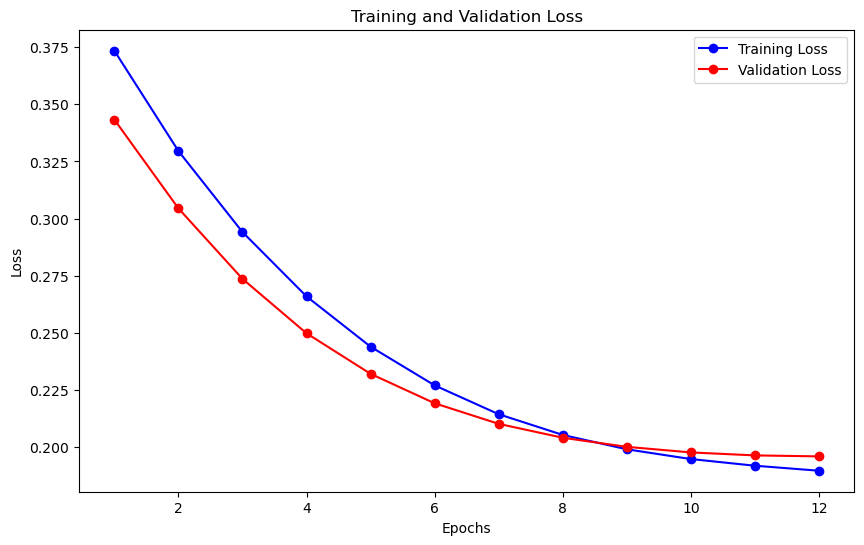

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate with MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

test_user_ids = test['user_id'].values.astype('int32')
test_track_ids = test['track_id'].values.astype('int32')
actual_playcounts = test['playcount'].values.astype('float32')

# Predict test data
predicted_playcounts = model.predict([test_user_ids, test_track_ids]).flatten()

# Calculate MAE
mae = mean_absolute_error(actual_playcounts, predicted_playcounts)
print(f"MAE: {mae}")

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_playcounts, predicted_playcounts))
print(f"RMSE: {rmse}")

4545/4545 [==============================] - 5s 1ms/step
MAE: 0.3162878751754761
RMSE: 0.44032897135977855


GMF model:

MAE: 0.316

RMSE: 0.440

Evaluate GMF model with Hit Rate:

In [ ]:
# Evaluate with Hit Rate which means if any test track appear in the top-N recommendations

# Get top n recommendation tracks with one user
def top_n_recommend(model, user_id, all_tracks, user_seen_tracks, n):
    track_to_predict = [track for track in all_tracks if track not in user_seen_tracks]

    user_ids = np.array([user_id] * len(track_to_predict), dtype='int32')
    track_ids = np.array(track_to_predict, dtype='int32')

    # Predict playcount for all tracks with this user
    predictions = model.predict([user_ids, track_ids]).flatten()

    # Get top n tracks with highest playcounts predicted
    top_n_index = np.argsort(predictions)[-n:]
    top_n_tracks = [all_tracks[i] for i in top_n_index]

    return top_n_tracks

# Calculate average hit rate across all test datasets
def average_hit_rate(model, test_data, all_tracks, n):
    total_hit_count = 0
    user_count = 0

    for user_id, group in test_data.groupby('user_id'):

        # Get user_seen_tracks from training dataset
        user_seen_tracks = train[train['user_id'] == user_id]['track_id'].tolist()
        top_n_recommends = top_n_recommend(model, user_id, all_tracks, user_seen_tracks, n)
        test_tracks = group['track_id'].values

        print(user_id)
        print(test_tracks)
        print(top_n_recommends)

        hit = any(track in top_n_recommends for track in test_tracks)
        if hit:
            print('***')
        total_hit_count += int(hit)
        print(total_hit_count)
        user_count += 1
    print('----')
    print(user_count)
    return total_hit_count/user_count if user_count > 0 else 0

all_tracks = pd.unique(active_users_listening['track_id'])
n = 50

# Choose 100 users track records from test dataset for testing
unique_users = test['user_id'].unique()
sample_users = np.random.choice(unique_users, size=1000, replace=False)
test_data = test[test['user_id'].isin(sample_users)]

hit_rate = average_hit_rate(model, test_data, all_tracks, n)
print(f'The Hit Rate is {hit_rate}')

676/676 [==============================] - 1s 1ms/step
0
[139 30 119 29 144 163 166 51 105 60 15 158 135 45 68 85 24 109 75 108 19
 16 31 18 12 9 82 98 76 55 42 56 150 111 69 138 2 93 136 156]
[545, 172, 148, 263, 1009, 1619, 382, 68, 58, 96, 1228, 668, 33, 242, 254, 233, 230, 13, 1000, 208, 163, 114, 212, 19, 23, 218, 238, 25, 38, 64, 1492, 1, 446, 11, 35, 1772, 34, 59, 234, 166, 14, 56, 3, 30, 29, 41, 27, 8, 39, 18]
***
1
677/677 [==============================] - 1s 1ms/step
6
[605 930 972 963 936 998 989 1007 958 937 961 949 1008 1014 943 926 980
 1021 346 1012 985 1002 495 527 940 986 953 947 975 408 1020 983 458 189
 990 966 935 955 1019 984]
[6270, 2297, 4925, 8185, 373, 125, 2871, 147, 9834, 3989, 6793, 22, 4318, 165, 7651, 7454, 8137, 3498, 3244, 4277, 703, 1640, 1598, 1572, 3238, 61, 135, 3005, 3984, 130, 311, 1309, 4623, 1421, 141, 1959, 3341, 4931, 2482, 3497, 1076, 3012, 134, 4868, 29, 3197, 6281, 9767, 363, 2454]
1
678/678 [==============================] - 1s 1ms/step
16

677/677 [==============================] - 1s 1ms/step
86
[3937 5883 5856 5860 2264 2101 1164 5886 5884 3595 2128 204 2270 3410 5863
 863 1817 4141 1846 2070 2155 3775 1175 2032 5882 5893 180 5859 5855 5888
 1832 1284 2177 5877 2723 5891 5400 1964 2173 471]
[21, 2516, 116, 1433, 1321, 369, 1147, 480, 107, 1084, 1339, 1836, 1429, 389, 232, 1118, 209, 1511, 371, 1113, 248, 356, 662, 377, 187, 1431, 246, 544, 785, 223, 198, 357, 365, 74, 196, 1122, 131, 1399, 1408, 1426, 341, 239, 1396, 1412, 335, 188, 192, 185, 170, 289]
8
678/678 [==============================] - 1s 1ms/step
97
[6181 6158 6155 6192 2735 2148 5866 2101 802 6159 6182 6173 501 6183 6163
 6197 6175 2160 2147 6170 3370 2056 2149 2032 1411 5867 5877 6190 6161
 3924 2173 6187 1979 6166 2150 5890 2035 2070 6156 3866]
[172, 250, 5642, 6552, 2149, 1658, 224, 196, 1998, 657, 391, 1384, 2139, 283, 1474, 4775, 242, 187, 2535, 2088, 370, 340, 863, 2661, 1896, 670, 913, 2408, 2560, 1499, 824, 1492, 358, 1447, 2562, 1425, 297, 344, 19

678/678 [==============================] - 1s 1ms/step
152
[193 8193 5639 7452 2564 256 3566 4563 940 170 3833 576 381 1177 7160 4456
 2532 2562 3500 954 8198 331 5965 3548 200 7998 7409 8185 3722 15 754 3499
 8200 236 8184 5989 512 6615 2848 1591]
[1594, 1409, 1659, 1569, 226, 1204, 1393, 850, 2571, 647, 660, 188, 107, 677, 2627, 1158, 254, 2416, 714, 220, 206, 1146, 2436, 853, 385, 1129, 1396, 580, 1141, 1596, 1509, 1157, 229, 431, 2531, 1405, 386, 439, 1083, 237, 416, 195, 1191, 478, 394, 166, 245, 247, 181, 189]
13
678/678 [==============================] - 1s 1ms/step
153
[8205 2329 8216 69 5918 1620 3952 975 1189 279 2209 3510 8227 1015 360
 1130 8223 8206 4618 4540 1796 4414 539 8222 3396 8221 8202 1592 318 7233
 8226 528 168 1005 4541 5615 8201 8214 3858 6473]
[1768, 610, 2926, 9689, 691, 1339, 1530, 5610, 337, 10522, 2717, 10207, 3207, 497, 3319, 2299, 2142, 5536, 1873, 1712, 1522, 2065, 2311, 298, 1503, 6941, 1072, 1930, 9121, 1558, 2285, 2298, 2278, 1600, 83, 1439, 30, 2288,

677/677 [==============================] - 1s 1ms/step
195
[762 537 3349 3548 5591 398 4921 652 4417 2920 3761 5287 1166 492 9439 74
 561 2850 482 1159 1386 764 136 749 9435 9432 3781 3568 9428 771 1037 1929
 9431 536 9427 1087 471 2023 4440 2393]
[7248, 7905, 15235, 8121, 8099, 7702, 11719, 1752, 4264, 8746, 9879, 3582, 9777, 7656, 6290, 6075, 6176, 4553, 5521, 11847, 296, 7316, 3583, 5733, 11738, 6891, 2465, 2649, 3359, 9135, 3790, 1853, 15618, 3086, 228, 3902, 2139, 4331, 825, 6861, 11523, 6265, 742, 9303, 9740, 7179, 1913, 3501, 14589, 6888]
19
677/677 [==============================] - 1s 1ms/step
201
[2733 503 2504 353 1381 5803 8168 708 872 515 3699 3018 9497 3076 1391
 8971 2451 9490 1564 3346 2739 4121 9487 3340 5645 1263 3753 5917 5334 824
 1171 1987 584 6045 1377 591 696 4104 3206 628]
[1267, 9391, 8286, 6324, 3201, 3611, 5768, 5028, 701, 6761, 6017, 7278, 5525, 3528, 1610, 7005, 4354, 3064, 5671, 2170, 2774, 3627, 5745, 9040, 9164, 12974, 3696, 13836, 1776, 4374, 240, 11767

677/677 [==============================] - 1s 1ms/step
255
[203 2265 2213 426 1793 4738 1624 651 10000 9 116 2762 146 2288 2263 2616
 5144 3088 15 4756 37 7064 7067 10430 98 5223 1879 1358 909 4740 229 241
 2990 1590 4744 4887 273 256 9221 10]
[653, 112, 554, 213, 54, 535, 11, 345, 199, 238, 71, 189, 14, 131, 329, 130, 66, 73, 21, 105, 92, 1322, 115, 22, 117, 159, 230, 58, 323, 772, 155, 407, 28, 142, 10, 60, 93, 179, 68, 94, 141, 176, 109, 183, 20, 148, 164, 43, 277, 127]
***
22
678/678 [==============================] - 1s 1ms/step
256
[6896 4589 897 3349 451 391 6950 4363 6883 3893 8941 1592 5446 6944 904
 6366 247 4354 3339 10434 10446 692 856 6933 3988 1551 301 10438 981 540
 4604 946 4650 2542 3270 6936 849 8003 1165 10437]
[693, 879, 379, 1090, 403, 2574, 509, 1137, 689, 395, 235, 116, 211, 341, 489, 450, 231, 1439, 1434, 347, 793, 1843, 1124, 1520, 370, 1579, 833, 187, 394, 225, 199, 862, 74, 592, 1420, 1407, 251, 672, 425, 1416, 1166, 243, 1404, 197, 253, 188, 193, 185, 170, 2

675/675 [==============================] - 1s 1ms/step
287
[403 5578 1789 4276 482 8149 943 4066 4741 669 9745 2546 2843 227 5862
 8879 193 1334 87 1043 1801 5118 6104 1993 2997 8002 5054 528 4075 1175
 816 2563 662 10880 1719 9270 2524 5589 5636 1638]
[5688, 6845, 10606, 464, 5900, 12907, 6278, 1508, 10059, 8078, 5725, 11967, 7161, 3599, 1919, 1438, 14551, 6460, 3498, 6874, 4569, 3583, 1590, 4344, 3616, 11700, 4554, 1514, 2276, 2919, 3087, 839, 1249, 409, 3668, 3277, 4996, 4333, 6721, 2471, 5514, 1584, 1161, 9721, 7230, 687, 6714, 303, 6871, 1754]
25
676/676 [==============================] - 1s 1ms/step
293
[1329 2393 1598 1592 1165 1526 232 2849 1629 9622 2420 3455 1579 1596 5220
 191 1557 198 708 5799 1597 1993 5857 1984 1176 871 5128 5801 1147 10539
 2489 4996 468 5638 2185 3327 239 2453 4894 248]
[74, 864, 154, 437, 290, 363, 2527, 378, 329, 350, 244, 190, 254, 222, 1103, 333, 388, 428, 467, 1488, 1175, 2487, 2372, 849, 1796, 339, 711, 1541, 195, 438, 657, 395, 130, 674, 474, 200

670/670 [==============================] - 1s 1ms/step
350
[2847 536 3080 11715 6121 1740 308 5588 135 614 7543 2485 5781 9014 7521
 1920 3304 2569 1951 598 3331 2086 38 140 4074 92 884 6026 1912 1871 6365
 2366 554 3822 210 5225 11687 4081 1944 663]
[3003, 1246, 1534, 453, 2407, 2983, 1348, 4272, 259, 3159, 1335, 4092, 2581, 3710, 540, 6847, 1352, 71, 395, 67, 326, 3808, 125, 1344, 1094, 263, 1302, 1274, 4761, 1551, 384, 1619, 1362, 1575, 1306, 1332, 63, 1412, 264, 1341, 2428, 1355, 354, 110, 1404, 1406, 1360, 1388, 1257, 1358]
34
678/678 [==============================] - 1s 1ms/step
351
[11722 8557 3421 671 648 6378 799 212 4619 2411 3378 3388 9579 4605 1942
 3775 377 3018 9261 416 1684 2853 305 363 2253 824 296 371 628 1131 2546
 1578 8449 1752 3385 4591 284 480 5759 1590]
[2342, 546, 1412, 636, 367, 821, 121, 733, 504, 59, 1113, 94, 1122, 249, 133, 275, 161, 165, 197, 63, 95, 494, 251, 147, 344, 22, 96, 34, 116, 72, 373, 420, 241, 338, 106, 146, 44, 69, 21, 74, 113, 154, 191, 107,

677/677 [==============================] - 1s 1ms/step
413
[75 4559 29 43 155 1445 96 144 118 37 131 39 5012 7037 1171 471 1211 117
 8438 121 2765 13 1795 15 921 61 3593 115 632 2 1393 58 69 411 3536 484
 127 1582 113 5377]
[288, 298, 744, 1433, 243, 599, 1298, 2, 5043, 56, 718, 31, 91, 1683, 314, 106, 119, 71, 97, 28, 108, 13, 72, 1556, 90, 58, 39, 29, 9, 16, 27, 62, 83, 115, 11, 111, 7, 92, 6, 102, 103, 21, 93, 81, 86, 54, 47, 99, 73, 116]
***
42
677/677 [==============================] - 1s 1ms/step
417
[9837 5463 10953 5526 1389 6267 12496 10972 6380 5469 6534 8375 3425 8866
 5661 5452 5681 10294 5685 7458 11211 12498 4134 2940 2118 11212 12501
 5662 9465 5560 4950 5657 10296 8854 1988 12495 2957 3735 8769 9786]
[1825, 479, 69, 2337, 1945, 376, 22, 189, 293, 2720, 3282, 134, 113, 364, 15, 21, 348, 365, 1901, 299, 1277, 74, 3823, 147, 3639, 94, 384, 3870, 3640, 412, 360, 359, 87, 23, 135, 61, 2099, 186, 3648, 338, 4997, 29, 44, 155, 148, 388, 296, 171, 131, 1903]
42
677/677 [=======

678/678 [==============================] - 1s 1ms/step
466
[2575 1579 5406 804 12874 7843 3396 12868 2976 2918 5023 3034 12863 12876
 11834 8090 12872 12875 12873 333 12864 8210 5526 1422 2023 3644 5343 5924
 10728 2886 6336 1779 6879 4564 9521 12880 12866 7581 6693 12871]
[2822, 1405, 3293, 2352, 2327, 17, 5220, 911, 1415, 65, 1713, 380, 1435, 7311, 421, 1160, 689, 595, 1417, 1408, 383, 1421, 301, 375, 796, 1123, 770, 276, 371, 1440, 2518, 295, 187, 136, 499, 51, 553, 277, 363, 62, 347, 33, 791, 170, 73, 71, 115, 188, 341, 377]
48
678/678 [==============================] - 1s 1ms/step
467
[1297 12913 12911 6256 11304 2938 12927 12903 12888 12883 5081 12897 1118
 12258 5191 12885 1339 12899 6213 11291 12931 12909 4249 12914 12902 11343
 12890 12917 12478 4230 12925 6879 5077 11310 12895 12686 6201 6314 11315
 7388]
[2921, 398, 194, 675, 3825, 110, 22, 767, 254, 1901, 252, 1532, 7307, 121, 20, 6765, 1592, 109, 106, 113, 55, 119, 1622, 1169, 6242, 135, 451, 175, 79, 166, 148, 868, 6210, 

677/677 [==============================] - 1s 1ms/step
521
[13369 3 9407 604 6635 5646 1923 1550 47 3499 3910 8943 5349 13374 5964
 6003 4419 4450 2853 3948 5641 5989 5076 1885 6956 2264 3384 5633 13370
 9122 4609 674 698 6961 3803 5636 2813 1644 5447 9130]
[7103, 824, 29, 1145, 1382, 1932, 18097, 5839, 523, 12358, 8869, 21, 1880, 6550, 3410, 1378, 94, 1444, 40, 1810, 3852, 5174, 11950, 7137, 5112, 146, 4763, 4618, 8293, 2573, 2374, 1420, 164, 1470, 4971, 1933, 9475, 3624, 12084, 1428, 6544, 147, 1481, 1891, 3668, 1408, 3645, 4966, 3623, 3632]
52
676/676 [==============================] - 1s 1ms/step
524
[5887 4071 481 608 8410 13378 6626 1426 5876 7953 2813 9745 1879 7936 2481
 13379 763 1083 1179 13377 13385 2206 7000 280 1200 5742 1243 609 6104
 2406 13390 1228 3023 2850 1026 10260 1206 1039 13383 6395]
[407, 395, 516, 99, 369, 32, 89, 722, 668, 434, 492, 380, 123, 348, 363, 1812, 1098, 68, 1385, 136, 410, 1093, 1376, 149, 345, 1373, 1408, 770, 264, 230, 105, 42, 212, 554, 1389, 58,

677/677 [==============================] - 1s 1ms/step
564
[632 3077 13749 5331 5571 1483 1758 7546 2781 402 617 570 749 1267 8151
 501 7348 4119 5295 777 694 1934 13751 528 5799 697 1143 955 85 10772 799
 7920 726 581 7084 638 397 4625 4376 7351]
[285, 736, 294, 773, 1863, 902, 1459, 86, 93, 68, 561, 1417, 362, 142, 3607, 1862, 126, 378, 401, 4950, 110, 22, 368, 366, 3082, 383, 156, 71, 92, 43, 490, 354, 768, 143, 753, 1390, 6540, 2329, 60, 371, 270, 104, 182, 150, 113, 339, 183, 73, 21, 127]
60
678/678 [==============================] - 1s 1ms/step
567
[580 13762 124 4424 1065 1118 1795 1738 2311 275 1523 1528 2342 2345 1783
 1186 778 54 13717 955 497 3673 2316 248 661 2830 1583 1539 1731 1516 791
 1810 2834 1489 307 12939 6405 2330 108 7188]
[370, 101, 1100, 241, 61, 491, 3283, 74, 1500, 59, 783, 185, 111, 93, 486, 2505, 163, 369, 2303, 373, 92, 170, 144, 117, 1511, 1704, 343, 1873, 337, 69, 44, 1515, 106, 1766, 21, 384, 1557, 1527, 1121, 191, 2281, 152, 105, 128, 183, 1467, 1112, 2

675/675 [==============================] - 1s 1ms/step
622
[1005 6550 764 6909 6899 3944 7268 6877 2518 14074 14083 6879 1442 11595
 912 14077 13031 14075 11237 6915 4432 135 4066 13106 5247 8367 201 8246
 3576 5287 9210 3982 8150 10053 6918 6941 6880 6940 14066 930]
[830, 795, 1303, 1393, 5143, 2468, 3094, 4945, 719, 1573, 3091, 1315, 2917, 409, 829, 215, 3397, 3231, 1138, 405, 506, 698, 1427, 367, 345, 83, 52, 7913, 864, 4349, 669, 1766, 1333, 63, 551, 185, 447, 354, 1425, 3292, 68, 1406, 1420, 88, 115, 2069, 373, 66, 72, 790]
66
677/677 [==============================] - 1s 1ms/step
623
[1779 553 5758 1550 1597 518 796 663 214 1401 3461 1163 1169 5996 1934
 2849 568 1740 5201 676 397 1488 378 1944 871 631 511 278 2840 1497 1528
 239 600 537 933 1768 1619 620 2894 1177]
[1122, 1787, 1390, 197, 185, 132, 349, 400, 255, 464, 210, 258, 1385, 1527, 178, 360, 1355, 1055, 256, 1358, 467, 841, 1367, 372, 712, 219, 232, 1371, 66, 353, 33, 388, 428, 1088, 234, 188, 342, 326, 225, 357, 354, 75

677/677 [==============================] - 1s 1ms/step
691
[10789 6046 285 4977 10140 10093 2856 9679 3128 727 1194 4758 14507 1620
 7818 3270 482 2629 1500 1363 2616 1720 1678 878 1224 1882 532 4367 3144
 189 7844 2763 430 9617 5950 2498 2717 3174 1576 1590]
[481, 300, 691, 1409, 250, 490, 1335, 202, 34, 1423, 1126, 1564, 252, 1826, 234, 734, 767, 224, 374, 211, 278, 1396, 1428, 563, 1405, 413, 1111, 242, 386, 1393, 63, 441, 276, 72, 357, 368, 1116, 401, 369, 416, 185, 372, 784, 187, 115, 74, 193, 294, 188, 170]
73
678/678 [==============================] - 1s 1ms/step
693
[2286 14528 9395 2178 10242 7203 14530 5232 12553 7762 2734 880 5404 2735
 853 9970 14313 3057 6301 14532 2641 7820 1846 3837 10140 7181 1544 8389
 5042 8380 8388 2742 2415 10896 5879 6192 13552 2075 8372 14534]
[1150, 488, 298, 1091, 254, 2566, 252, 392, 251, 909, 596, 498, 88, 448, 347, 1157, 1125, 223, 72, 1442, 346, 1417, 180, 256, 1440, 193, 401, 1843, 74, 553, 52, 203, 1405, 34, 1520, 244, 116, 63, 1435, 1421,

678/678 [==============================] - 1s 1ms/step
745
[594 12037 8907 2094 1442 3819 7863 648 10154 8731 14900 14783 8508 798
 136 172 7162 3396 7065 14809 3146 2517 11071 4677 6020 1768 14899 66 2051
 4654 12207 3192 2988 902 2495 6437 3077 9854 993 3527]
[409, 69, 695, 146, 250, 1516, 856, 2060, 234, 61, 252, 83, 427, 771, 344, 276, 224, 300, 85, 587, 393, 1607, 44, 210, 378, 21, 111, 1513, 358, 1118, 196, 186, 1122, 153, 242, 1113, 381, 361, 390, 665, 129, 105, 340, 569, 346, 192, 184, 187, 169, 294]
78
677/677 [==============================] - 1s 1ms/step
746
[8137 8342 7763 5971 5983 1355 5062 8931 11370 1304 4560 1822 7119 10989
 5990 2965 3517 14920 2501 14916 1890 1880 14908 14904 786 2510 11443
 12257 7134 14100 7915 6000 8468 1298 13114 4836 14912 9681 14919 1920]
[10308, 12310, 6307, 11933, 12015, 8112, 15090, 11244, 6743, 7398, 56, 13504, 4843, 12750, 1676, 6430, 4695, 1257, 11890, 3971, 7685, 1106, 872, 2735, 3215, 7927, 267, 11128, 9345, 5046, 6320, 6981, 8767, 3991

677/677 [==============================] - 1s 1ms/step
784
[449 475 5210 15169 6123 6541 2375 179 6392 7614 3452 495 5217 13502 438
 427 6517 171 248 918 881 2785 8045 3036 11649 1194 296 3730 15170 418
 7612 856 10852 3108 2798 10850 452 6618 9679 861]
[329, 116, 3391, 143, 109, 809, 1871, 350, 379, 786, 118, 67, 147, 355, 55, 185, 339, 542, 22, 284, 134, 93, 1313, 23, 72, 1331, 108, 333, 29, 170, 59, 120, 95, 94, 69, 1592, 112, 105, 15, 133, 44, 781, 165, 146, 161, 106, 21, 61, 154, 130]
83
678/678 [==============================] - 1s 1ms/step
785
[15066 2558 3082 5075 890 1755 2601 4729 911 188 10639 332 500 2857 3384
 15173 217 4770 103 3103 5318 970 6033 49 43 1902 9318 5397 7933 13295 142
 1104 28 11466 3415 7954 7577 1315 845 8213]
[2802, 330, 6103, 3133, 6325, 2166, 15532, 136, 10169, 3832, 10329, 475, 2104, 262, 9110, 3400, 1905, 4318, 4996, 274, 6693, 4176, 1372, 6390, 7690, 551, 3355, 12240, 3335, 2612, 2617, 303, 12, 4469, 3351, 6611, 906, 1423, 4766, 5536, 6227, 9969, 103

678/678 [==============================] - 1s 1ms/step
828
[5048 1333 8904 4412 429 964 5360 4411 1579 1873 1814 6892 391 1617 1005
 6116 3876 52 18 4545 817 2072 5317 4585 6994 806 536 6312 1590 1578 3606
 942 2190 1916 5381 2616 9328 7923 6131 5054]
[1141, 349, 872, 376, 217, 412, 904, 194, 206, 197, 489, 824, 679, 126, 52, 245, 1430, 400, 440, 384, 70, 361, 1158, 1116, 734, 1425, 1832, 365, 229, 1408, 270, 1399, 72, 271, 34, 1412, 1396, 338, 247, 237, 369, 182, 784, 332, 415, 188, 180, 183, 288, 165]
***
91
677/677 [==============================] - 1s 1ms/step
830
[10979 7605 203 10955 175 2602 9695 4111 3975 2691 2438 2889 3966 5847
 15338 8394 705 5637 812 275 7917 10780 5805 7700 9337 1592 1681 241 15353
 9700 2418 5799 460 1034 4924 8990 15355 9015 6814 7247]
[6057, 2617, 12715, 10752, 7000, 6853, 9342, 8359, 2923, 8040, 14827, 7203, 3107, 4458, 6132, 18036, 10895, 2975, 7226, 306, 11076, 5534, 6815, 13688, 11688, 12676, 11488, 3549, 18035, 11763, 9382, 7207, 1888, 13876, 1668,

677/677 [==============================] - 1s 1ms/step
870
[12194 7015 2600 7922 669 904 6651 6855 4513 15479 9337 7307 2786 1262
 15261 6789 11 5734 9329 162 5803 130 2348 5379 2777 4106 528 2766 4486
 913 6661 3738 698 1286 1622 2762 2877 1340 369 4624]
[1587, 220, 2551, 1914, 408, 1479, 114, 1078, 1427, 1423, 418, 1135, 696, 1827, 406, 1472, 337, 1873, 1505, 1588, 390, 399, 476, 343, 1123, 464, 734, 421, 249, 446, 376, 247, 183, 367, 231, 1425, 1402, 221, 1110, 239, 1152, 1406, 189, 1420, 1390, 1393, 181, 184, 291, 166]
97
676/676 [==============================] - 1s 1ms/step
873
[668 381 2806 67 2621 1684 5643 149 5648 191 1340 465 8398 7373 3309 528
 10909 3713 7919 5906 188 9912 1152 729 9313 1696 1579 118 18 4535 1109 9
 1528 4045 3108 6620 63 52 96 5385]
[104, 252, 639, 267, 63, 218, 111, 114, 82, 133, 478, 165, 745, 65, 340, 13, 95, 1558, 316, 142, 1085, 49, 353, 140, 83, 60, 81, 129, 53, 322, 119, 542, 105, 118, 25, 145, 171, 141, 103, 85, 84, 128, 166, 163, 270, 19, 39, 134

677/677 [==============================] - 1s 1ms/step
1011
[2103 7440 161 11773 2151 8813 3394 2073 5557 8896 5460 11635 5329 15882
 13830 4937 11741 7874 2953 6209 10662 5495 697 6198 2954 2047 1749 2916
 2980 5564 2936 2932 6021 4648 7258 16212 15863 2022 4097 7246]
[127, 1622, 139, 364, 15, 1126, 302, 106, 125, 35, 11, 22, 41, 75, 36, 154, 134, 7423, 384, 360, 368, 575, 149, 96, 94, 130, 113, 61, 1897, 23, 119, 69, 121, 42, 10, 29, 162, 59, 67, 148, 109, 135, 155, 95, 166, 147, 107, 44, 131, 21]
112
677/677 [==============================] - 1s 1ms/step
1012
[85 1769 3 2050 14614 10655 6128 405 4674 1758 4789 1119 19 5353 9405
 12478 3874 8415 7355 3133 1455 13942 2961 16221 5332 10647 32 103 4008
 310 1747 40 11136 10648 124 601 3110 1755 1992 54]
[140, 6278, 294, 449, 1530, 14074, 2282, 3110, 8154, 6303, 83, 5739, 2310, 1101, 2298, 354, 1384, 1740, 1929, 1113, 1848, 607, 2452, 2297, 1500, 296, 2560, 1438, 1048, 1516, 1719, 2275, 1522, 1704, 570, 1074, 2710, 1766, 1498, 5598, 2284

676/676 [==============================] - 1s 1ms/step
1083
[350 712 1599 5801 349 6120 460 214 10345 6386 5575 1586 1993 1220 12621
 4937 9231 1426 7635 293 4360 3338 1190 10657 1176 3164 2578 2504 1592
 4835 8133 1621 5614 1503 2347 1 3992 747 3162 1349]
[346, 12, 353, 40, 160, 377, 368, 1573, 34, 8, 125, 154, 36, 90, 115, 10, 6, 14, 286, 52, 181, 178, 138, 22, 64, 554, 105, 128, 116, 56, 129, 143, 28, 92, 114, 21, 9, 158, 102, 163, 91, 108, 141, 58, 142, 66, 42, 103, 20, 149]
118
676/676 [==============================] - 1s 1ms/step
1088
[1248 1155 452 1159 1097 1707 1546 252 111 489 1135 226 1392 381 9204 2659
 242 124 2625 2085 232 10668 3082 396 4761 236 207 2603 2671 3807 1646 266
 1149 256 4072 146 3770 868 6060 1139]
[23, 105, 146, 110, 347, 118, 95, 740, 610, 411, 154, 1103, 172, 350, 21, 74, 44, 185, 312, 1646, 112, 809, 195, 308, 390, 440, 329, 353, 318, 69, 410, 333, 2567, 1097, 527, 2360, 2511, 1513, 106, 2513, 130, 546, 1073, 1082, 1069, 1064, 447, 365, 219, 228]
***
11

675/675 [==============================] - 1s 1ms/step
1168
[3915 399 12158 885 2684 12 3169 7067 429 2167 2003 2648 6909 2057 609 10
 7081 2182 4066 2106 2152 5152 1975 8120 4921 937 15448 7074 2067 460 4490
 2190 7155 475 6416 2103 798 4887 13355 2016]
[104, 405, 2552, 7558, 1060, 2284, 57, 5334, 2563, 137, 67, 1516, 103, 1110, 4865, 92, 1522, 152, 2265, 3779, 154, 1503, 4454, 8844, 42, 2235, 318, 2300, 1388, 128, 87, 782, 21, 1850, 781, 2059, 809, 59, 2065, 269, 4968, 383, 521, 20, 90, 1530, 102, 158, 561, 147]
127
678/678 [==============================] - 1s 1ms/step
1171
[3156 1167 10716 5167 5940 439 1678 3461 1578 4957 3716 4627 4055 5992
 6686 4958 5395 430 1190 194 4924 1160 1585 1168 441 1022 296 9496 4973
 2589 5201 5215 2192 4902 3582 694 1187 9320 4985 1149]
[254, 1506, 355, 1593, 389, 1503, 1184, 85, 2408, 390, 416, 1824, 712, 1135, 422, 3286, 294, 270, 364, 340, 1116, 352, 1151, 385, 1142, 1561, 477, 334, 730, 397, 376, 210, 1080, 202, 562, 373, 356, 247, 199, 1108, 187

678/678 [==============================] - 1s 1ms/step
1217
[467 1578 1378 137 9896 7348 52 15885 4518 18 728 8476 3756 5240 6419 689
 9894 116 9907 8061 10843 6427 3110 310 10142 3341 4724 5922 2591 63 2738
 770 526 1900 4863 7349 1822 9888 5261 77]
[2576, 587, 861, 127, 475, 1518, 358, 221, 218, 132, 112, 1137, 256, 193, 183, 1148, 876, 1418, 789, 336, 2533, 683, 61, 71, 739, 721, 485, 1199, 342, 2415, 666, 198, 482, 828, 1165, 389, 1124, 207, 1090, 195, 231, 247, 420, 249, 239, 184, 189, 166, 181, 291]
134
678/678 [==============================] - 1s 1ms/step
1223
[5418 2523 8120 5426 12738 11407 265 2885 2480 3327 16218 52 3752 5992
 16984 16217 11413 5420 11402 2871 6827 11408 1893 709 16221 5651 5963
 5434 7016 7144 1945 18 3188 94 1419 3733 12731 137 1758 3792]
[1576, 1481, 2461, 1155, 220, 874, 4928, 444, 2522, 906, 564, 685, 3297, 1438, 2356, 405, 374, 183, 737, 370, 1660, 590, 527, 639, 272, 792, 386, 51, 1436, 17, 271, 766, 342, 366, 132, 358, 290, 1414, 33, 547, 1405, 69, 

678/678 [==============================] - 1s 1ms/step
1268
[9229 1880 10764 3698 705 5758 2365 4631 13188 523 1550 3651 2411 1933 545
 10282 3666 1931 6619 627 526 617 1755 2497 1893 6606 1748 5131 9681 2322
 1347 6623 519 604 1328 1562 5052 2319 505 13242]
[1789, 1724, 4577, 352, 4678, 2133, 1156, 363, 141, 2999, 347, 2064, 1971, 508, 1592, 1833, 451, 411, 298, 2093, 1393, 188, 4643, 170, 6015, 2530, 68, 380, 1114, 426, 87, 549, 251, 457, 2337, 266, 1403, 295, 2688, 705, 63, 586, 780, 818, 691, 341, 618, 345, 115, 74]
***
142
677/677 [==============================] - 1s 1ms/step
1273
[553 204 3981 730 4457 1148 212 6051 3456 2507 638 1684 179 8438 492 1392
 2714 871 2625 838 5319 620 2444 482 2658 2605 2743 1101 1533 3127 1031
 186 689 2489 495 2333 6034 194 4911 675]
[351, 1908, 384, 1108, 1861, 640, 172, 232, 1580, 839, 2556, 219, 177, 225, 2610, 653, 241, 412, 242, 247, 435, 574, 1493, 193, 216, 723, 1553, 841, 1125, 1113, 464, 2514, 206, 809, 1141, 427, 705, 2400, 392, 385, 197,

677/677 [==============================] - 1s 1ms/step
1329
[5620 181 7836 10796 1433 5572 799 5675 1914 533 6017 5286 7845 7633 1484
 210 1404 9128 4644 665 1877 2393 13919 1104 620 2669 513 7231 7239 787
 7070 730 1415 1883 11451 719 5923 1206 771 5649]
[169, 92, 59, 164, 367, 2721, 158, 375, 352, 109, 20, 270, 105, 6, 108, 55, 372, 120, 1421, 112, 126, 23, 35, 42, 160, 1855, 90, 69, 29, 41, 118, 384, 67, 61, 130, 21, 94, 95, 145, 147, 359, 563, 106, 133, 185, 10, 44, 22, 153, 146]
148
676/676 [==============================] - 1s 1ms/step
1331
[1734 1305 1712 14395 6106 614 1004 446 452 674 493 11325 586 942 956 952
 13580 188 3423 9649 425 3564 7409 945 381 1392 939 1751 399 1748 189 440
 4987 2604 2853 2253 1719 3206 9634 5981]
[150, 117, 41, 120, 160, 125, 35, 48, 11, 139, 13, 366, 110, 163, 6, 1576, 1851, 134, 94, 79, 42, 55, 119, 75, 15, 67, 109, 22, 135, 10, 149, 23, 69, 113, 106, 29, 162, 121, 95, 148, 96, 59, 61, 21, 147, 107, 155, 166, 44, 131]
148
677/677 [================

678/678 [==============================] - 1s 1ms/step
1385
[133 181 1381 10830 2328 3298 1419 14598 254 2209 10169 742 1372 368 7041
 3226 1236 4107 270 3278 4887 866 3044 1416 3717 2781 1064 5648 13102 210
 2391 7354 3896 11861 93 1250 2497 204 16945 219]
[267, 184, 685, 744, 539, 1830, 135, 34, 84, 1916, 2685, 145, 93, 609, 1390, 1420, 1857, 4909, 1463, 221, 3602, 1399, 111, 44, 363, 782, 2338, 63, 359, 4955, 152, 365, 2067, 1786, 21, 330, 6542, 1387, 3610, 1789, 352, 129, 72, 1910, 336, 1418, 74, 114, 777, 1868]
***
155
675/675 [==============================] - 1s 1ms/step
1387
[12590 9979 6194 6258 6246 2070 1678 11067 13614 8047 5283 6182 12051 7471
 8777 17462 6552 17464 353 8840 6703 2128 14130 14935 3498 17451 2742 5924
 14272 2182 11551 14534 17465 11191 11076 2236 879 11155 7804 6761]
[8690, 335, 4025, 1818, 319, 2320, 292, 5076, 9122, 143, 13011, 8849, 3001, 47, 4156, 5545, 13002, 8119, 6229, 1711, 7215, 4959, 2815, 4070, 9415, 10559, 9634, 2587, 3997, 8412, 7140, 5322, 12

678/678 [==============================] - 1s 1ms/step
1446
[6848 94 1092 3858 211 1155 37 9370 6832 5311 5812 2679 10758 202 1119
 15357 2539 4598 290 4562 1742 12208 318 1063 4589 4540 329 273 528 3876
 6834 1321 17655 6736 10263 396 356 4585 326 301]
[1070, 1560, 112, 3675, 331, 347, 3358, 408, 1879, 5758, 194, 1367, 181, 1701, 1530, 1097, 1466, 9262, 1428, 1475, 1317, 2280, 1723, 2268, 355, 1457, 103, 51, 3405, 1393, 1473, 2188, 2564, 805, 390, 1602, 126, 164, 1405, 1426, 1413, 1118, 493, 557, 216, 1409, 1396, 777, 1430, 1423]
159
677/677 [==============================] - 1s 1ms/step
1448
[6645 2564 4456 1734 1139 3536 103 522 4404 2897 546 676 846 600 5785 1340
 1678 2908 4071 482 5819 617 40 1457 3637 6634 2814 1954 697 1776 4622
 1328 9733 3479 981 5625 579 649 829 2415]
[5199, 105, 614, 3380, 21, 405, 70, 567, 658, 641, 370, 1468, 136, 1415, 167, 366, 65, 755, 1298, 727, 86, 587, 1310, 1710, 18, 51, 358, 222, 1460, 742, 1640, 1386, 634, 133, 67, 780, 4908, 127, 184, 493, 545, 

677/677 [==============================] - 1s 1ms/step
1513
[298 2681 313 6759 4945 9497 12008 2754 1512 278 1411 7862 1433 148 2313
 2330 3334 10362 2639 394 61 1479 275 1410 576 989 13056 303 2682 1504
 3122 14209 878 9142 161 1702 320 360 10955 307]
[114, 58, 250, 382, 94, 95, 3283, 184, 93, 354, 675, 73, 1527, 71, 781, 60, 413, 145, 84, 1557, 117, 368, 1768, 1510, 144, 782, 365, 1907, 379, 111, 1121, 240, 296, 152, 274, 68, 1600, 351, 339, 21, 43, 333, 190, 129, 560, 105, 182, 371, 290, 185]
166
678/678 [==============================] - 1s 1ms/step
1516
[17630 11665 12945 4273 17908 790 1499 2371 17903 6716 17626 1306 16135
 17913 17910 17901 17592 3910 1696 17907 2748 11923 17905 8107 6902 716
 10433 12199 12683 17902 11600 3969 15316 6924 594 2800 1689 11664 6567
 11628]
[1590, 88, 250, 188, 161, 348, 509, 4937, 2495, 3244, 270, 874, 4047, 118, 40, 450, 60, 71, 599, 235, 451, 479, 1610, 33, 94, 251, 395, 1843, 834, 794, 1163, 2081, 95, 688, 1583, 130, 160, 1424, 1173, 404, 192, 

678/678 [==============================] - 1s 1ms/step
1597
[9509 8256 2333 11765 7830 8683 7866 1447 6725 2913 15644 8675 2466 2970
 18142 13055 2965 2942 9845 2938 1685 12061 2931 2961 1065 1626 2490 13501
 18141 12341 6775 2924 1181 9226 322 9859 7566 12367 6765 2946]
[12492, 1902, 254, 8851, 2695, 10712, 4997, 14633, 3620, 4550, 9308, 5367, 11389, 9403, 9055, 12765, 8911, 1924, 6788, 7299, 6906, 312, 3654, 5694, 9180, 1617, 4673, 17524, 3537, 5887, 3637, 3069, 12990, 4036, 6918, 11611, 6942, 1916, 7153, 1626, 5014, 4389, 1867, 10844, 5768, 1793, 7253, 6939, 3118, 3536]
***
170
678/678 [==============================] - 1s 1ms/step
1599
[243 398 1127 146 1545 463 580 212 2340 1516 381 1176 1126 248 189 236
 1461 1935 826 3461 179 3274 699 193 2659 2562 85 1553 1583 1156 489 261
 3333 426 2446 1087 1142 441 1128 342]
[1474, 358, 831, 1415, 1485, 107, 282, 323, 246, 1677, 129, 3261, 268, 1534, 2483, 801, 1504, 373, 375, 426, 1122, 2540, 1803, 849, 562, 1165, 406, 695, 69, 763, 362, 19

675/675 [==============================] - 1s 1ms/step
1652
[1691 6668 3864 2502 47 8534 18275 1354 4691 4604 5054 478 375 2465 420
 13014 14 7273 308 5759 486 1064 653 541 112 398 2544 1432 3943 6033 960
 1715 3933 5865 11692 2256 2131 10510 4315 2240]
[1110, 786, 272, 169, 1468, 62, 73, 442, 1356, 197, 359, 28, 699, 248, 749, 344, 834, 1382, 1562, 1045, 183, 627, 171, 207, 529, 1120, 350, 222, 1789, 1082, 385, 331, 373, 316, 100, 413, 174, 224, 1078, 1073, 644, 311, 215, 388, 347, 160, 158, 161, 144, 266]
179
677/677 [==============================] - 1s 1ms/step
1654
[8845 10524 403 412 11750 8801 3108 10048 8864 11930 8828 6739 18282 220
 8758 8779 4761 14891 10060 3103 3889 396 486 1646 7024 11744 16039 850
 3082 8860 438 11522 12610 18283 11246 491 11745 170 13009 7122]
[17986, 7704, 599, 7441, 2959, 3400, 2895, 596, 6024, 6602, 8480, 3080, 11562, 13019, 7389, 11670, 2932, 12215, 9135, 5793, 2931, 1871, 9939, 2947, 2683, 6784, 2952, 5055, 4421, 3649, 7800, 2411, 7358, 3699, 9980,

676/676 [==============================] - 1s 1ms/step
1702
[39 4429 28 20 13419 482 189 665 18412 1392 11 16975 918 212 2903 5580
 4408 4754 13904 11099 11115 148 1577 2881 2426 11469 4356 232 242 3368
 12191 1814 250 4073 405 9 1622 96 10948 48]
[81, 118, 1082, 9, 69, 333, 31, 32, 143, 535, 41, 37, 168, 150, 134, 109, 1564, 19, 11, 1842, 144, 100, 6, 129, 14, 47, 153, 133, 122, 20, 108, 51, 21, 96, 103, 110, 26, 99, 132, 10, 148, 131, 86, 59, 61, 97, 119, 53, 139, 85]
***
190
678/678 [==============================] - 1s 1ms/step
1703
[2320 6387 1186 1065 1731 1091 2595 1194 8394 1733 1932 6031 2727 1795
 2307 1523 1461 5356 2346 5649 3020 2313 6964 124 791 7201 1139 13037 142
 1553 2314 580 1539 1516 316 3673 2330 416 11680 1130]
[58, 368, 9, 116, 139, 21, 143, 108, 102, 342, 130, 1509, 183, 336, 2497, 93, 56, 168, 1071, 92, 373, 91, 161, 114, 142, 2274, 1701, 273, 1118, 2545, 384, 2267, 1868, 1513, 1439, 66, 42, 1761, 82, 1525, 189, 20, 150, 103, 126, 291, 181, 1109, 184, 166]
***


677/677 [==============================] - 1s 1ms/step
1758
[144 15346 3195 37 6689 3669 2445 1951 7475 7201 119 2883 3670 5605 2668
 1907 12899 5084 8634 82 1180 14595 12270 4404 2528 5884 4242 5221 17709
 5076 2253 1879 9321 1080 754 5134 7775 3892 11926 15160]
[5789, 7421, 1864, 5927, 292, 476, 4694, 4875, 6772, 809, 4819, 3572, 636, 5934, 485, 6648, 770, 961, 3473, 1558, 12669, 6635, 3304, 7547, 6267, 7437, 3917, 524, 6153, 3097, 1481, 6068, 3762, 182, 1000, 3253, 380, 314, 1709, 4333, 1465, 360, 3296, 1138, 3366, 9208, 1521, 105, 8654, 786]
195
678/678 [==============================] - 1s 1ms/step
1759
[4746 18560 6791 2577 18561 113 2366 1834 2806 940 6435 2331 170 1092 3787
 229 339 705 10965 7629 180 970 1242 4625 310 9500 1063 1929 1814 67 146
 1854 1880 1826 5013 3296 6606 437 7761 449]
[8841, 3711, 1458, 12043, 3308, 8078, 2264, 14626, 9171, 10244, 2920, 3115, 4539, 11885, 6303, 5, 2387, 7904, 3699, 7646, 11562, 2935, 6767, 8134, 1231, 1263, 14053, 10762, 1904, 763, 4730, 1

676/676 [==============================] - 1s 1ms/step
1797
[226 2569 9226 135 3455 17853 96 1747 4385 405 296 15 3082 51 5592 449 130
 3315 80 113 8408 482 36 82 4944 5003 555 254 5992 194 470 110 85 18645
 11866 220 13 384 1858 252]
[295, 806, 1405, 724, 1661, 93, 1251, 191, 1137, 1469, 1095, 90, 12566, 181, 84, 113, 138, 50, 16, 319, 108, 34, 58, 507, 303, 25, 67, 101, 112, 76, 52, 1814, 299, 9, 7, 1536, 231, 13, 111, 28, 78, 41, 38, 80, 96, 85, 19, 116, 86, 68]
***
200
675/675 [==============================] - 1s 1ms/step
1799
[13059 16275 3518 2532 3922 138 933 10633 8261 17132 1428 662 1419 4552
 241 15142 6436 424 1321 421 3942 7131 5390 15672 11486 214 2589 140 2597
 4745 9745 7252 12274 9740 150 504 3479 1092 7353 8977]
[675, 5829, 15905, 2268, 7127, 300, 2761, 11723, 7503, 8848, 15077, 13734, 5045, 1895, 6708, 272, 5051, 5840, 5270, 18803, 1133, 1146, 7575, 4777, 7123, 2518, 18901, 10930, 1279, 7101, 13762, 9760, 11992, 4481, 5986, 2848, 3348, 11496, 2800, 3235, 8841, 3251, 

677/677 [==============================] - 1s 1ms/step
1857
[10494 6317 5765 66 14563 5762 3864 18509 18777 18775 9927 798 11070 12538
 12280 2600 12762 10464 10519 14991 3591 12511 378 9005 2054 1999 5156
 2105 10528 2021 15117 18771 9402 11460 10510 18772 12935 15118 15113 2037]
[116, 2093, 1620, 284, 59, 95, 188, 2974, 383, 148, 10, 112, 3869, 20, 340, 143, 1590, 109, 120, 67, 392, 575, 11, 37, 29, 106, 55, 44, 133, 23, 6, 118, 130, 134, 22, 146, 170, 105, 4789, 69, 147, 165, 161, 295, 108, 363, 61, 94, 21, 154]
206
678/678 [==============================] - 1s 1ms/step
1860
[379 4573 4908 228 2319 2605 2216 435 290 9215 3833 194 2982 2562 237 281
 1177 3876 295 420 4071 383 4547 200 351 3085 4562 4585 405 391 406 254
 456 416 4598 1127 326 3858 318 1135]
[340, 1583, 1817, 22, 1495, 4026, 704, 234, 147, 131, 1132, 2564, 2562, 458, 121, 384, 200, 322, 23, 1114, 119, 218, 162, 106, 55, 107, 44, 571, 96, 195, 2521, 421, 95, 155, 69, 21, 375, 465, 2403, 377, 468, 1142, 406, 231, 197, 24

676/676 [==============================] - 1s 1ms/step
1917
[6624 15799 9863 18035 12423 3192 94 37 7283 4654 7712 354 1363 2442 3819
 7155 1397 7919 14107 574 7483 8503 9099 8441 1908 299 1062 18901 3668
 2416 4836 10958 7403 13059 1874 3689 8924 8990 10566 293]
[1567, 347, 114, 396, 64, 436, 283, 268, 1597, 152, 20, 729, 362, 1409, 21, 103, 411, 32, 90, 365, 1109, 112, 69, 101, 356, 127, 110, 139, 151, 138, 777, 92, 107, 91, 234, 336, 184, 59, 178, 330, 145, 350, 42, 66, 19, 124, 176, 179, 286, 161]
212
675/675 [==============================] - 1s 1ms/step
1918
[297 9236 133 2218 62 2837 1328 9628 1240 12010 29 147 46 3734 1191 6813
 689 6380 4697 15069 5810 60 7183 1358 6626 1268 3867 202 16057 2238 189
 1168 1258 5812 3082 4853 5397 4746 4735 4921]
[6878, 3610, 11800, 12919, 7087, 6848, 456, 2357, 1232, 5733, 8146, 5729, 5710, 11970, 9113, 11981, 1851, 7187, 3494, 2143, 10644, 3272, 12693, 11539, 5516, 8081, 9335, 1577, 1855, 8795, 1820, 5980, 2463, 11718, 3593, 4332, 6717, 681, 1

678/678 [==============================] - 1s 1ms/step
1973
[4290 11728 932 13803 19005 2105 19001 4973 10818 18730 9438 6760 5452
 19006 5836 7537 2074 4289 6785 7520 18999 8771 14387 9428 4963 11731 4411
 6053 8745 8783 15041 1673 6056 3841 12086 8015 5579 4066 6717 19004]
[2860, 342, 1910, 72, 1615, 7786, 6712, 74, 6027, 1527, 7432, 7246, 212, 2866, 3899, 154, 569, 1534, 780, 626, 5985, 348, 458, 92, 1760, 8941, 116, 567, 2168, 7880, 424, 599, 674, 575, 14087, 3818, 5281, 430, 452, 1585, 381, 1789, 4931, 171, 302, 189, 412, 2841, 1530, 1125]
217
678/678 [==============================] - 1s 1ms/step
1979
[19018 2415 5141 5688 256 227 2501 6086 11996 403 9708 1833 170 6100 5862
 225 12484 2388 11031 72 2209 5355 8468 426 6800 17677 10922 9250 19016
 7250 204 12765 3333 449 251 2781 1832 9772 19019 9761]
[33, 65, 1111, 863, 816, 380, 1106, 709, 131, 484, 1419, 3288, 1426, 69, 1078, 214, 201, 371, 224, 555, 1115, 398, 654, 671, 239, 179, 359, 1405, 363, 368, 60, 1424, 1392, 335, 190, 7

677/677 [==============================] - 1s 1ms/step
2021
[3346 4889 7032 2849 3056 106 3455 636 4877 1590 1187 147 1587 3354 2710
 7069 1548 1577 1440 13 1592 3262 1242 0 442 4763 663 5857 490 8514 8133
 7007 1148 489 921 545 741 2489 599 1914]
[12965, 7258, 8354, 8113, 1883, 3253, 6905, 4355, 8833, 5102, 12620, 9025, 10960, 5229, 13775, 1900, 598, 10083, 8177, 5336, 9337, 7857, 4366, 1869, 1892, 4325, 11759, 11740, 9373, 904, 7796, 2780, 2157, 5756, 12026, 1523, 7718, 8273, 137, 4357, 3634, 753, 8821, 400, 8834, 11580, 7219, 293, 1163, 1589]
226
677/677 [==============================] - 1s 1ms/step
2024
[4593 1686 4402 464 2311 13258 359 699 616 293 2338 312 1941 835 300 6076
 16814 302 8255 338 799 382 294 9097 3932 1626 2346 3627 4628 497 1550 297
 2317 1795 288 10585 2327 1545 2316 7811]
[5386, 854, 808, 1427, 3535, 3267, 828, 4406, 2709, 1648, 1031, 148, 3370, 7384, 897, 3476, 6818, 5876, 857, 6295, 1147, 1829, 1398, 1953, 6813, 4898, 1841, 3935, 2884, 1563, 5019, 1474, 2796, 

678/678 [==============================] - 1s 1ms/step
2106
[1902 117 104 4865 3164 73 148 10753 288 18033 29 55 4755 1619 363 280 135
 322 20 44 166 95 4711 118 657 162 2481 10696 70 15 4639 1192 2834 96 48
 106 6 364 11469 61]
[2262, 64, 363, 66, 30, 379, 1804, 2541, 54, 747, 376, 1435, 1572, 1881, 330, 1499, 39, 373, 2492, 216, 746, 1083, 1374, 3273, 726, 198, 1741, 1481, 1366, 318, 361, 167, 697, 131, 2322, 401, 1397, 1363, 102, 76, 1392, 1378, 1087, 159, 161, 1078, 525, 144, 319, 162]
***
238
675/675 [==============================] - 1s 1ms/step
2109
[2477 576 911 5643 382 1576 11402 3273 9503 1449 3466 2806 1218 3702 3719
 1386 1822 1641 2884 6674 4647 3674 1618 3452 7102 5522 4065 14 390 11785
 627 1207 5108 11855 10554 2481 1358 1904 1534 8532]
[134, 1468, 909, 2558, 273, 61, 1116, 773, 2722, 1450, 417, 794, 688, 1258, 1558, 1420, 3625, 697, 4882, 167, 358, 5754, 3088, 157, 1423, 69, 386, 371, 445, 369, 274, 405, 3386, 71, 1392, 1785, 2323, 365, 528, 3629, 128, 184, 222, 790, 

677/677 [==============================] - 1s 1ms/step
2159
[675 369 6639 868 2383 165 2328 143 2344 287 3204 5636 297 743 1618 829 30
 2347 1514 2338 8103 7400 2394 2961 87 6791 3216 3520 127 7749 4887 2814
 286 198 332 83 380 698 3233 5641]
[166, 57, 2534, 77, 81, 1388, 347, 669, 117, 2321, 280, 328, 61, 358, 83, 66, 350, 130, 1413, 129, 741, 339, 31, 329, 344, 541, 342, 1408, 1394, 1415, 101, 1381, 64, 311, 762, 1378, 55, 277, 169, 40, 271, 96, 137, 257, 21, 103, 319, 314, 332, 151]
***
246
678/678 [==============================] - 1s 1ms/step
2162
[134 15 7 141 3673 118 36 69 17822 17 135 7352 3 4593 2483 120 3536 464
 166 59 1393 42 108 2316 1523 416 75 2828 1583 67 148 149 1516 39 94 119
 2595 56 1130 9297]
[72, 6, 96, 13, 323, 126, 175, 331, 81, 97, 265, 125, 111, 100, 121, 131, 58, 35, 16, 89, 26, 207, 1571, 9, 7, 92, 1849, 30, 1089, 74, 327, 11, 152, 157, 40, 259, 51, 104, 105, 117, 83, 44, 149, 91, 86, 129, 116, 134, 53, 101]
***
247
677/677 [==============================] 

676/676 [==============================] - 1s 1ms/step
2219
[1490 189 469 188 2393 495 274 1532 1248 203 179 267 9524 2562 871 220
 1136 234 213 357 9844 180 31 1392 398 397 675 2710 2513 430 2870 1148
 3613 726 1597 146 10265 223 3770 11416]
[152, 21, 68, 210, 605, 221, 173, 1532, 1350, 62, 1346, 401, 337, 344, 324, 333, 805, 105, 113, 2503, 339, 356, 1086, 384, 2505, 520, 370, 739, 325, 539, 402, 203, 1450, 807, 128, 1073, 310, 228, 689, 186, 2463, 1129, 1507, 357, 1095, 618, 179, 634, 190, 180]
***
254
678/678 [==============================] - 1s 1ms/step
2221
[151 4982 134 78 11137 69 37 4006 6557 9531 1297 3976 4597 6374 9587 10
 377 8955 2814 51 3993 156 44 75 131 9585 70 6151 20 12108 21 1739 386
 6373 162 13 6148 14037 59 8940]
[1424, 348, 647, 54, 2343, 335, 424, 87, 1111, 399, 677, 384, 20, 810, 19, 365, 222, 350, 97, 68, 332, 166, 1390, 256, 1403, 1107, 548, 1422, 1417, 353, 770, 172, 1102, 63, 105, 102, 344, 118, 130, 315, 204, 40, 18, 320, 164, 336, 273, 167, 115, 149]
**

673/673 [==============================] - 1s 1ms/step
2264
[44 7693 1902 493 8994 9128 1224 2451 3331 3073 2615 748 11195 49 3427
 1443 6389 130 2596 3436 3365 3830 529 11675 714 629 13361 1453 5017 2253
 6035 448 105 6049 2587 3997 2165 3378 11455 223]
[92, 1643, 1796, 334, 1113, 56, 25, 73, 1369, 331, 85, 2430, 248, 458, 8, 232, 100, 322, 2262, 145, 74, 1287, 199, 718, 521, 378, 4, 90, 43, 182, 737, 297, 151, 326, 10, 84, 46, 318, 143, 20, 93, 103, 146, 251, 120, 75, 124, 112, 33, 128]
260
676/676 [==============================] - 1s 1ms/step
2267
[2713 2736 2068 55 5111 6224 6757 8213 8865 2722 6719 6729 7493 14367 6221
 8751 12763 2937 8811 5653 2067 3828 6549 14316 6769 2885 11334 6737 2940
 10362 1891 11143 11066 6908 6594 7435 7466 2127 6740 9954]
[6303, 121, 108, 6266, 4504, 749, 3863, 3811, 94, 13911, 35, 764, 23, 384, 109, 802, 29, 42, 2311, 6, 600, 932, 341, 1898, 166, 7904, 72, 649, 5370, 162, 67, 147, 69, 7960, 130, 12534, 364, 113, 2714, 148, 6708, 107, 59, 79, 55, 95, 

678/678 [==============================] - 1s 1ms/step
2333
[16446 85 2471 3341 4088 15086 7645 7602 3368 316 7728 4563 15085 19156
 3756 7363 3396 3598 804 15090 2489 1284 11682 6615 6686 1155 5811 3548
 17153 3733 3372 3714 1305 3367 10332 2506 2514 2558 3294 172]
[1161, 2726, 573, 3403, 4036, 236, 173, 280, 69, 1137, 1436, 378, 61, 363, 452, 773, 2578, 1124, 381, 880, 134, 1716, 902, 85, 1481, 1617, 533, 244, 107, 820, 364, 144, 1545, 155, 1133, 186, 302, 393, 131, 278, 171, 277, 296, 2529, 1921, 744, 189, 194, 384, 342]
***
267
674/674 [==============================] - 1s 1ms/step
2334
[814 6371 396 9760 12 1112 530 151 19759 1451 161 528 1439 478 1485 881
 3803 405 6402 6661 6127 11853 1016 7300 9852 1189 2375 3103 443 4066 2292
 11644 447 1404 10745 91 719 3466 614 1077]
[2009, 4776, 6204, 6611, 2083, 12056, 8127, 5103, 21, 2760, 1478, 1610, 114, 7781, 8939, 3234, 7312, 6115, 20, 1843, 4748, 22, 1410, 4912, 2634, 2877, 2849, 674, 4796, 10, 4359, 6067, 349, 3230, 4987, 1724, 2857

678/678 [==============================] - 1s 1ms/step
2402
[4825 946 6415 899 995 18128 6124 3653 2396 6006 11900 1848 12984 6041
 7268 14078 5604 4673 8970 3535 9333 6020 8579 865 3210 1054 85 4609 1293
 11214 1257 10243 8937 1830 99 2406 200 7583 843 989]
[1148, 148, 101, 1440, 379, 181, 88, 565, 503, 493, 1127, 130, 90, 154, 268, 367, 179, 2334, 816, 187, 196, 771, 567, 339, 287, 71, 384, 269, 59, 1415, 363, 418, 1407, 69, 767, 60, 51, 548, 20, 1419, 110, 33, 369, 1433, 355, 788, 125, 164, 182, 333]
272
676/676 [==============================] - 1s 1ms/step
2406
[79 7060 701 3661 4647 1679 7712 529 5473 1192 4921 9643 15582 6008 8068 8
 19907 12400 151 138 3234 3717 1650 5718 69 5650 2596 6571 4305 1902 11988
 8094 550 58 337 401 1946 742 10568 13059]
[137, 1104, 122, 317, 19, 338, 212, 547, 400, 103, 313, 230, 188, 104, 13, 6, 1852, 1095, 97, 11, 15, 339, 51, 117, 129, 27, 166, 55, 63, 116, 105, 143, 96, 220, 10, 171, 21, 139, 128, 93, 65, 127, 85, 57, 41, 94, 20, 272, 163, 148]
2

676/676 [==============================] - 1s 1ms/step
2457
[7751 1766 5246 20068 1748 5964 8112 1533 5609 4445 6005 5754 398 1536
 4086 188 143 2270 4076 8644 655 11605 2756 10689 10373 1623 2795 3722 248
 4339 5992 81 9156 218 1875 2446 194 37 69 267]
[747, 1002, 117, 4630, 6868, 4813, 5649, 58, 2891, 6314, 4544, 11617, 8704, 2917, 3169, 9084, 4004, 6892, 5211, 848, 4694, 4615, 3415, 3148, 5729, 9, 8087, 6933, 7744, 8993, 3510, 3677, 11509, 6297, 9731, 5740, 8863, 6269, 2918, 14574, 4967, 4344, 6662, 28, 249, 6738, 161, 6889, 547, 2477]
278
677/677 [==============================] - 1s 1ms/step
2458
[3843 1380 14339 864 7493 3872 995 6322 2937 5653 6246 11185 6769 2173
 2918 6199 6062 7476 6035 10045 4184 5348 8869 7567 6723 2706 858 6227
 6264 6224 3321 17725 6760 8424 2713 17720 6056 17715 6352 14785]
[15648, 4450, 2943, 2898, 10495, 6698, 3905, 1804, 6702, 9725, 8612, 56, 11557, 8739, 11677, 9100, 1440, 6385, 5892, 6289, 5113, 6692, 2676, 2951, 11548, 13761, 317, 7169, 7914, 6192,

677/677 [==============================] - 1s 1ms/step
2528
[545 12381 8375 139 1573 864 97 149 587 4764 661 3682 11625 3607 7489 12
 127 91 6054 500 37 5328 2103 154 4937 614 4841 1347 5322 2152 526 3830
 119 16372 163 4956 6436 586 2857 9170]
[46, 67, 68, 316, 140, 138, 22, 11, 338, 72, 37, 43, 322, 31, 110, 103, 114, 133, 342, 162, 9, 18, 272, 38, 165, 8, 83, 97, 105, 33, 84, 50, 147, 5, 13, 54, 104, 96, 118, 117, 129, 106, 139, 25, 143, 85, 94, 128, 62, 19]
***
283
678/678 [==============================] - 1s 1ms/step
2531
[3745 1159 9757 3101 1652 4354 2360 242 531 18334 9828 4853 9759 2781 1679
 7000 17666 131 4537 7388 1070 4647 1645 8518 3419 13739 3211 20197 528
 4071 2206 4412 786 2025 1562 2351 14270 4366 10379 4704]
[377, 184, 2571, 3383, 34, 381, 665, 274, 67, 136, 686, 192, 1128, 416, 682, 1481, 299, 444, 2566, 1436, 71, 369, 695, 404, 130, 73, 1327, 793, 186, 293, 3300, 419, 62, 788, 1400, 1434, 371, 1412, 224, 374, 275, 169, 1429, 115, 1403, 344, 187, 365, 338, 1416]
2

677/677 [==============================] - 1s 1ms/step
2578
[2487 8191 11881 376 397 18811 8194 811 593 5289 2264 10888 15517 1618
 2183 530 17346 348 17348 11913 4966 6267 4105 4604 4787 5333 1623 16439
 7683 262 21 1582 7159 2360 1510 1619 8914 959 6789 6620]
[4449, 106, 238, 134, 22, 369, 133, 208, 420, 867, 120, 197, 1153, 144, 112, 372, 159, 271, 246, 335, 141, 136, 118, 9, 819, 730, 130, 230, 115, 63, 44, 488, 37, 91, 272, 191, 74, 29, 146, 61, 145, 183, 248, 69, 186, 96, 168, 152, 418, 290]
288
678/678 [==============================] - 1s 1ms/step
2579
[3119 2481 2477 11442 1608 230 860 214 12993 3086 467 85 171 2384 5659
 4691 97 3738 8194 2846 5700 1426 7085 3717 3012 10708 1604 20251 1701
 6649 381 247 1196 4719 1332 2406 5047 1436 5215 4980]
[562, 243, 143, 157, 93, 21, 115, 1696, 227, 117, 61, 1399, 194, 267, 1387, 364, 1105, 353, 112, 192, 729, 245, 369, 103, 1149, 1560, 32, 1826, 109, 384, 366, 268, 156, 778, 1403, 59, 197, 1110, 67, 42, 183, 235, 338, 150, 332, 188, 127

677/677 [==============================] - 1s 1ms/step
2636
[14067 6118 19939 7016 12358 730 696 8919 9018 5859 20180 5381 480 261
 5377 10562 100 12460 2271 3746 2853 2458 1568 7679 3714 2518 20323 6122
 5012 4544 805 2793 5845 5865 698 2440 3497 14102 20182 14576]
[3538, 427, 1347, 106, 5347, 1938, 1366, 426, 231, 820, 1408, 4973, 1487, 1159, 977, 708, 1442, 1995, 1879, 829, 251, 73, 3631, 424, 455, 346, 185, 1494, 362, 2468, 130, 1438, 199, 115, 1440, 197, 1421, 225, 188, 170, 508, 1405, 1890, 644, 1417, 527, 1932, 5635, 789, 294]
295
676/676 [==============================] - 1s 1ms/step
2641
[1168 1091 261 1147 703 191 2330 1532 233 262 186 886 183 1731 2314 1640
 1489 799 232 296 214 2481 181 2480 1139 2346 3995 1148 1676 1167 256 1451
 437 364 172 244 2842 3758 4977 108]
[15264, 138, 846, 6110, 9096, 2585, 13468, 727, 58, 5943, 1685, 51, 1198, 1416, 1867, 911, 1481, 961, 4929, 781, 7357, 2219, 3668, 15588, 880, 14299, 2803, 16545, 600, 2646, 158, 1580, 6108, 1333, 7872, 5589, 29

678/678 [==============================] - 1s 1ms/step
2695
[255 1843 5824 1449 2606 1444 2562 1496 2589 2990 2495 1431 246 203 1505
 5808 2619 2542 180 1432 2570 6986 426 5818 1097 2220 3284 3822 5809 245
 178 1451 3312 3759 10458 3335 5823 1483 5816 6122]
[1459, 735, 683, 825, 1151, 248, 1088, 544, 63, 217, 469, 2514, 219, 1147, 2562, 354, 413, 3286, 457, 403, 905, 226, 1479, 1122, 268, 1506, 1591, 385, 382, 370, 2449, 440, 1430, 1426, 116, 238, 365, 339, 220, 333, 186, 188, 2557, 367, 193, 1428, 287, 171, 189, 1410]
***
301
677/677 [==============================] - 1s 1ms/step
2696
[6618 3382 1622 1751 1550 112 427 8431 1562 1725 511 6623 4354 1171 113
 411 1929 1696 9164 21 1153 3388 1466 4693 5752 2564 7612 3199 4997 829
 2433 5488 9656 788 4689 2763 3876 5047 3459 878]
[259, 1487, 1315, 1081, 135, 1505, 743, 4856, 1093, 1451, 1407, 353, 70, 1403, 357, 533, 50, 178, 716, 374, 2161, 768, 21, 61, 5053, 260, 64, 128, 329, 1405, 2495, 620, 323, 789, 122, 764, 1449, 1102, 109, 1371, 1

677/677 [==============================] - 1s 1ms/step
2755
[7319 7400 3331 1908 4544 11236 8698 403 11232 4667 1199 3242 1192 6101
 6086 10692 1766 1872 6102 1953 92 11222 7694 10922 11305 7237 1198 7769
 6664 5580 3661 8455 7389 1443 4670 2221 3108 7770 12 6423]
[4962, 2213, 7736, 7670, 1455, 3719, 1441, 4306, 3082, 1621, 17778, 4709, 6077, 1157, 6915, 1403, 9190, 2687, 68, 3952, 3300, 4680, 482, 32, 8218, 4580, 6198, 5308, 4772, 3224, 2208, 3965, 15523, 2954, 285, 1975, 2382, 778, 363, 816, 3902, 63, 70, 2775, 127, 7630, 64, 107, 60, 50]
305
677/677 [==============================] - 1s 1ms/step
2763
[10142 4838 1165 7114 598 2894 4583 7259 806 642 53 173 180 2893 7651 2738
 536 5206 2862 8358 10821 7355 5073 884 276 20529 10148 2955 1284 594 575
 34 3263 753 393 372 3082 5428 4348 8333]
[2557, 7401, 2822, 2205, 3618, 3057, 1189, 3867, 442, 12568, 12291, 2207, 9775, 13639, 8559, 3578, 6808, 12597, 6001, 6916, 13245, 7462, 1775, 6887, 4241, 3522, 5233, 310, 15889, 2625, 2579, 10913, 

678/678 [==============================] - 1s 1ms/step
2814
[10330 12 1381 738 260 4101 413 7652 485 177 4857 1594 6545 6389 296 96
 5109 4046 81 1057 5857 737 220 1404 3452 417 3848 126 1192 2454 1589 144
 1386 640 488 410 1434 175 6598 1613]
[2529, 1557, 1309, 188, 1350, 1419, 1464, 60, 70, 1110, 752, 1417, 267, 626, 72, 535, 673, 1146, 889, 1400, 43, 352, 156, 266, 155, 36, 108, 337, 1641, 484, 20, 149, 2549, 1388, 33, 62, 1397, 102, 366, 285, 165, 773, 414, 360, 111, 1401, 1414, 125, 331, 1385]
312
678/678 [==============================] - 1s 1ms/step
2820
[5905 3166 9503 3670 5061 970 1702 11647 10430 1374 545 4550 11658 13536
 1092 8024 1119 20678 18671 11676 1169 6624 7111 3525 4818 19493 3646 1663
 14754 3562 1576 7865 5900 7148 5904 10429 2059 1063 9017 10431]
[864, 378, 1940, 424, 371, 1418, 406, 3631, 436, 229, 209, 1203, 1093, 723, 251, 241, 185, 486, 195, 375, 685, 2548, 129, 1169, 589, 570, 6575, 345, 223, 668, 1881, 831, 1892, 421, 249, 1140, 236, 233, 1934, 4985, 3640,

677/677 [==============================] - 1s 1ms/step
2860
[695 8492 4118 8166 245 4985 11572 645 11343 1432 10065 3310 586 8630 230
 9074 8504 178 7828 11430 3023 3264 11434 13093 13111 5977 1164 5630 2579
 4059 4708 190 2504 7056 8514 4963 1486 1404 15922 6144]
[406, 2355, 2523, 1346, 272, 1480, 476, 908, 1573, 1884, 1598, 74, 421, 390, 1091, 772, 228, 418, 739, 375, 1125, 1513, 789, 3294, 198, 1433, 551, 408, 370, 359, 1838, 1437, 387, 116, 2565, 446, 222, 240, 372, 194, 337, 343, 186, 188, 1435, 1403, 291, 171, 189, 1417]
319
677/677 [==============================] - 1s 1ms/step
2861
[1608 285 609 6618 9094 632 9519 3113 2844 13816 5733 1718 3811 8990 5767
 2411 2327 576 2464 8995 1619 4524 551 594 886 3357 495 8494 4974 1624 714
 4467 4763 236 1580 5276 96 3349 41 2504]
[1461, 249, 64, 6557, 505, 783, 112, 3281, 189, 93, 291, 28, 1901, 161, 1309, 387, 1507, 102, 9, 150, 83, 142, 378, 1764, 109, 1525, 1434, 1109, 2279, 103, 129, 163, 418, 1555, 375, 156, 297, 126, 529, 1596, 91, 

677/677 [==============================] - 1s 1ms/step
2907
[1934 6786 651 5067 1395 1064 20809 705 5804 544 2621 6787 20810 834 1300
 1277 7399 2602 10955 1451 5792 1789 4889 1906 706 1625 2346 2497 5752
 14704 729 570 617 804 294 1722 1241 1758 608 7609]
[1559, 1393, 29, 1423, 187, 2270, 106, 1894, 22, 193, 116, 1512, 276, 336, 361, 390, 1428, 291, 374, 185, 1466, 85, 69, 147, 408, 61, 300, 294, 385, 94, 378, 1601, 1108, 133, 146, 113, 369, 346, 358, 567, 21, 381, 107, 154, 340, 44, 362, 188, 170, 130]
***
326
677/677 [==============================] - 1s 1ms/step
2918
[557 15885 66 1768 1375 1592 88 140 10894 74 72 708 18 2533 469 7793 353
 333 1955 275 414 5279 5287 384 568 967 1023 364 4625 12423 536 188 2853
 412 8927 826 8981 3388 5067 452]
[550, 800, 1092, 1084, 392, 1381, 743, 1806, 172, 1293, 839, 4896, 1543, 1311, 132, 125, 191, 242, 730, 715, 194, 1372, 355, 268, 1369, 18, 893, 1120, 1399, 846, 1404, 1113, 269, 1385, 235, 534, 245, 63, 83, 185, 178, 180, 348, 406, 287, 329,

677/677 [==============================] - 1s 1ms/step
2977
[5562 16756 9993 8850 6893 6209 864 8795 8854 2943 20462 4332 2795 8748
 6917 10495 4130 11525 6353 20881 6238 2974 11632 5459 11530 5483 10060
 6266 2918 14317 10657 8784 20701 9811 20879 3910 19055 18457 17609 4123]
[3138, 1495, 2210, 4966, 2794, 4888, 4968, 3260, 1821, 536, 8068, 4937, 10061, 2033, 550, 4633, 3300, 11374, 3672, 3001, 1437, 13381, 16904, 1456, 3090, 2242, 3812, 8249, 3559, 2073, 365, 2804, 658, 8299, 1674, 2460, 3381, 7499, 9794, 3184, 4443, 3259, 2558, 7983, 924, 709, 11234, 1648, 116, 3820]
333
675/675 [==============================] - 1s 1ms/step
2981
[557 959 6588 646 1675 549 6959 2786 5646 4819 11065 16766 4097 4598 4401
 409 7047 727 5513 20888 6971 466 481 12427 2311 814 11487 12664 7565 270
 1544 8135 4315 1847 16273 4761 465 5278 10854 856]
[490, 368, 1471, 135, 6514, 201, 1556, 373, 43, 356, 73, 1145, 159, 271, 1816, 1402, 71, 1446, 186, 223, 106, 1464, 370, 21, 272, 755, 1397, 153, 290, 1462, 51

678/678 [==============================] - 1s 1ms/step
3041
[1416 222 13180 12164 19541 6150 8871 8948 399 4652 7215 21005 4000 9028
 3934 21004 5647 11936 8740 34 21007 981 544 19544 10005 12306 14511 14615
 10126 11 21006 5809 5651 6176 8755 4820 512 92 18521 7886]
[3323, 14676, 4573, 5374, 5288, 4373, 11634, 2903, 3610, 1504, 2039, 10206, 13778, 4532, 9018, 9598, 2314, 3361, 16772, 7675, 9144, 2323, 254, 4330, 11014, 1666, 2298, 4093, 5781, 6133, 775, 6452, 7434, 3358, 6944, 12153, 8898, 10009, 1663, 7466, 323, 1636, 2869, 6267, 4535, 8715, 557, 4710, 10778, 1864]
337
676/676 [==============================] - 1s 1ms/step
3042
[4596 126 3605 3018 4363 5963 12012 595 4908 7924 8745 16262 11672 614
 3625 3453 745 4104 4376 1578 9654 536 399 1575 1200 2465 5920 1902 1940
 813 760 69 1592 2849 1 96 1822 1645 61 800]
[22, 13, 50, 15, 88, 54, 9, 102, 125, 435, 10, 264, 85, 69, 282, 138, 62, 334, 133, 58, 176, 761, 33, 149, 397, 36, 154, 150, 1567, 99, 113, 67, 28, 106, 367, 136, 89, 109, 

675/675 [==============================] - 1s 1ms/step
3100
[1082 5073 1867 10440 9300 5857 3821 1037 1845 1854 7679 13809 15507 10280
 72 1578 235 1816 2830 533 2847 2572 467 1104 1913 2309 13813 137 18 4008
 819 803 3384 9226 310 9656 4921 2838 4507 136]
[387, 738, 78, 839, 709, 1097, 354, 1108, 64, 1734, 411, 190, 1499, 396, 143, 643, 1790, 212, 98, 1125, 237, 1861, 263, 1568, 375, 1088, 405, 287, 471, 187, 660, 222, 394, 331, 433, 120, 198, 378, 366, 408, 1084, 229, 175, 239, 363, 173, 181, 176, 281, 159]
341
677/677 [==============================] - 1s 1ms/step
3105
[72 865 296 5048 4518 2062 885 1011 703 8133 9760 2868 2080 2352 135 747
 424 5344 1090 711 1810 6880 806 8937 2186 2243 689 1246 8949 4844 17 4066
 11237 6368 342 6051 7201 3199 1242 3579]
[124, 89, 1349, 49, 1399, 360, 63, 176, 3608, 1784, 59, 158, 326, 1863, 372, 779, 6534, 539, 1443, 213, 101, 70, 100, 1394, 2546, 136, 123, 21, 1461, 362, 42, 332, 1412, 1391, 68, 57, 1459, 20, 106, 108, 774, 1409, 143, 356, 1379, 

678/678 [==============================] - 1s 1ms/step
3169
[5054 3225 14049 2256 14598 642 2340 2887 398 8415 7070 4405 1957 7924
 7250 512 474 200 2209 194 2810 1163 5381 9640 2849 3323 1136 1169 4414
 16470 482 5216 2584 9171 3388 16828 11007 470 6131 8573]
[286, 187, 352, 270, 255, 2450, 68, 1117, 185, 331, 292, 1395, 34, 373, 2558, 131, 3619, 1865, 1594, 788, 63, 369, 901, 1569, 682, 1430, 2345, 691, 137, 271, 546, 1917, 3289, 72, 1876, 289, 357, 380, 1425, 74, 335, 1398, 188, 1407, 365, 784, 171, 116, 1411, 341]
346
677/677 [==============================] - 1s 1ms/step
3171
[8192 10151 13784 615 121 1684 1748 15229 13253 940 3579 1712 296 20246
 3554 11237 9828 4689 525 1266 8190 1247 8997 4918 6093 1127 1221 9808
 6914 147 293 7678 398 1527 59 1224 482 13019 368 18837]
[31, 481, 324, 1134, 2336, 432, 724, 90, 143, 653, 757, 378, 536, 65, 102, 385, 578, 330, 68, 111, 652, 1184, 192, 91, 1105, 1249, 861, 4907, 16, 1110, 814, 555, 407, 19, 222, 669, 345, 246, 377, 472, 774, 469, 2

677/677 [==============================] - 1s 1ms/step
3214
[871 124 1521 2595 2329 5649 1834 1958 1160 1640 1211 1139 616 2307 6981
 1557 194 1087 595 1738 186 1877 427 2311 384 675 2466 1553 1940 170 179
 495 1461 32 2572 1177 2248 10951 3350 1604]
[144, 1126, 21, 105, 106, 1535, 1088, 836, 402, 223, 145, 175, 277, 1477, 190, 133, 272, 2372, 129, 2530, 22, 23, 29, 117, 547, 111, 376, 366, 1665, 1160, 646, 699, 153, 44, 362, 337, 69, 146, 460, 316, 2488, 95, 374, 234, 463, 192, 221, 403, 186, 181]
***
352
676/676 [==============================] - 1s 1ms/step
3217
[7733 234 4876 11563 2264 1519 1246 313 2518 264 2837 7723 7602 8947 3371
 3087 1556 393 9248 2756 3461 3622 3620 3251 7644 394 3410 5006 1779 7731
 384 640 962 6685 7705 377 14097 15493 8617 6651]
[1422, 94, 1899, 415, 95, 336, 22, 1419, 766, 365, 2506, 224, 105, 1759, 118, 296, 61, 1592, 133, 90, 1401, 147, 112, 1522, 811, 1588, 354, 1107, 165, 342, 369, 44, 384, 1392, 1424, 192, 106, 372, 146, 1389, 186, 184, 69, 290, 375

677/677 [==============================] - 1s 1ms/step
3288
[3278 1728 1128 1224 194 447 689 398 1152 1272 1139 2606 1390 200 4992 921
 494 170 470 256 1449 1653 2670 2444 437 405 186 495 228 482 414 1165 2659
 3770 1444 267 426 871 2466 1577]
[5983, 7047, 4803, 4013, 2210, 6550, 7209, 8497, 7932, 5595, 2615, 4348, 6560, 17312, 16557, 13309, 5353, 1769, 6132, 11843, 4613, 11974, 4635, 1999, 6769, 11100, 4330, 1835, 9056, 7637, 5642, 909, 1765, 4546, 8225, 8323, 9465, 13985, 7870, 11559, 2066, 4574, 1885, 6200, 13037, 7321, 795, 10003, 11270, 8733]
357
677/677 [==============================] - 1s 1ms/step
3290
[2513 51 3462 44 10600 15159 521 7222 6557 12597 313 3096 5414 21361 189
 41 273 5191 1372 8108 5444 3136 409 12590 1390 8529 872 5011 176 6410
 14272 5012 10983 474 5404 3351 1480 12593 3845 1496]
[4949, 13499, 406, 70, 98, 1442, 8948, 32, 15330, 2, 7123, 102, 11, 7224, 140, 117, 3078, 4577, 123, 112, 46, 127, 6359, 37, 15, 64, 149, 62, 23, 54, 126, 9, 88, 111, 20, 151, 113, 19,

673/673 [==============================] - 1s 1ms/step
3322
[1332 1571 205 9249 20819 6389 1777 3771 2996 533 3455 5128 6107 701 2496
 7920 244 6829 58 3966 8539 3082 6378 81 290 3323 5615 5992 175 4105 5641
 609 9349 10378 252 526 1595 10 2738 2454]
[7165, 7793, 2043, 12495, 4417, 546, 775, 8387, 1948, 506, 762, 535, 2558, 4462, 607, 2346, 4835, 583, 123, 2257, 7700, 7175, 7854, 3719, 3783, 1923, 11179, 537, 2047, 919, 2432, 7858, 3605, 4366, 1552, 338, 48, 105, 32, 1908, 78, 690, 11186, 67, 496, 16, 59, 445, 9859, 69]
361
678/678 [==============================] - 1s 1ms/step
3324
[748 6557 4882 1858 708 727 430 1837 814 7238 5621 4597 3756 756 4469 2384
 14313 3059 15164 6378 2646 11610 1547 3341 8943 13555 86 2905 1522 16861
 5397 1678 3082 18006 2569 13069 1426 3463 509 2376]
[148, 20, 5814, 11451, 1291, 12405, 6, 4619, 4690, 1838, 3851, 2527, 6701, 3909, 2957, 3243, 91, 4974, 115, 5844, 158, 1221, 132, 2709, 68, 5780, 4805, 44, 17, 4981, 160, 123, 2147, 29, 10, 66, 108, 11, 23, 7

677/677 [==============================] - 1s 1ms/step
3369
[3209 6023 7973 6639 5649 6651 497 616 576 7037 4667 11685 9373 364 1155
 2710 278 191 186 799 10365 3575 6956 1877 209 2779 397 3242 778 341 7397
 8477 2411 7389 2448 189 10766 155 1148 179]
[120, 1182, 349, 1542, 194, 287, 703, 1815, 21, 184, 439, 1583, 1123, 44, 6537, 1059, 2686, 1128, 95, 367, 1140, 771, 29, 684, 146, 106, 9, 1195, 4656, 204, 10, 165, 2617, 68, 1512, 1688, 767, 118, 2693, 2494, 457, 148, 550, 130, 105, 143, 154, 182, 1889, 405]
364
677/677 [==============================] - 1s 1ms/step
3370
[7348 5355 9426 68 575 2988 1662 9092 4111 14182 5577 5891 3573 6150 1437
 4625 15423 9704 7355 2466 9110 4564 1944 5339 66 404 3498 718 1955 34
 5645 16593 8275 5874 136 52 3294 726 1130 600]
[195, 393, 479, 203, 710, 1107, 2413, 1183, 2573, 469, 656, 813, 192, 109, 672, 15, 217, 728, 21, 22, 20, 2530, 43, 1111, 91, 384, 92, 180, 241, 103, 60, 190, 129, 102, 1073, 227, 415, 1149, 114, 67, 243, 140, 148, 126, 233, 181, 

676/676 [==============================] - 1s 1ms/step
3482
[13721 2711 13731 13727 3055 15519 944 1211 955 9339 9358 2177 3500 13729
 12021 12411 2388 1689 13752 471 2558 1712 12930 12977 2170 7239 9916
 13722 9914 10486 1679 375 3103 4346 251 9214 8676 7409 5345 672]
[589, 519, 3882, 272, 3209, 2122, 199, 3439, 1386, 1216, 2849, 1195, 1325, 401, 134, 340, 158, 1413, 5784, 6121, 457, 3072, 65, 3169, 327, 1399, 1295, 375, 1643, 3755, 73, 5736, 71, 4483, 2968, 34, 3326, 3373, 364, 294, 4561, 185, 774, 1301, 781, 4476, 52, 2300, 1616, 1710]
***
372
677/677 [==============================] - 1s 1ms/step
3487
[3524 9644 9657 3396 5037 3874 7283 763 49 13 4557 557 764 8351 4620 2908
 9852 2905 107 5790 8167 4597 836 7968 531 5287 7483 549 646 5315 814 5014
 9664 1408 1457 634 10 14338 811 12940]
[13526, 13219, 4309, 3101, 141, 3400, 6224, 715, 194, 13253, 3766, 7640, 13522, 68, 222, 27, 17240, 75, 753, 4687, 57, 10090, 1565, 363, 5059, 9, 6567, 118, 572, 4681, 4314, 8968, 1156, 3169, 10789,

676/676 [==============================] - 1s 1ms/step
3542
[4609 258 99 1776 1498 2292 5086 9645 9790 5979 3226 320 2772 313 8151
 6630 7423 316 940 5075 780 273 377 1699 1305 4707 4742 1189 11819 3102 24
 1516 7000 7417 4071 360 8508 1682 30 1496]
[5572, 590, 5421, 1506, 7243, 4365, 601, 4394, 10223, 1764, 6098, 5355, 14579, 11237, 759, 1401, 7511, 445, 9799, 9528, 5189, 13456, 1098, 2214, 1904, 6191, 4848, 5525, 10778, 3524, 736, 1491, 3532, 1795, 15027, 888, 5816, 141, 2138, 2884, 1844, 3755, 11339, 122, 11467, 8832, 6806, 4540, 9044, 6106]
376
678/678 [==============================] - 1s 1ms/step
3549
[7327 1659 353 716 1599 6613 1587 981 544 1873 5319 605 1360 4485 360 5259
 2743 732 2647 2605 21622 478 198 651 232 6603 643 10596 533 803 6007 764
 1660 6703 136 4457 982 6570 2320 11351]
[4390, 20857, 74, 361, 2571, 102, 858, 144, 114, 2573, 7435, 10, 2678, 128, 105, 42, 28, 7212, 155, 2453, 12, 66, 91, 70, 149, 142, 4447, 57, 3501, 5092, 11178, 421, 1594, 115, 19, 154, 5, 156, 5

677/677 [==============================] - 1s 1ms/step
3605
[4029 514 1157 3212 14484 4047 113 144 433 16 1593 49 1176 264 1139 838
 1604 1801 119 786 1752 475 166 405 1136 460 4353 44 1160 574 5206 2569
 7159 1532 1758 443 527 2603 1358 458]
[84, 15631, 1967, 11114, 7, 50, 332, 7226, 104, 7551, 129, 97, 753, 103, 4252, 10934, 373, 13514, 6817, 10656, 2812, 8927, 189, 105, 13, 507, 7905, 5161, 17015, 38, 3868, 6128, 99, 67, 20, 54, 95, 722, 61, 138, 8866, 26, 119, 85, 41, 19, 107, 143, 134, 94]
***
379
677/677 [==============================] - 1s 1ms/step
3608
[4510 5242 1693 5268 154 10790 2376 909 4998 9759 13469 1218 1245 1243 860
 10380 1203 1199 9578 10785 6865 1633 1263 1902 130 3479 1519 1198 10
 11397 16817 5215 21000 4506 7901 149 748 1184 4042 223]
[2818, 871, 247, 138, 2364, 4704, 2835, 3530, 3273, 477, 144, 662, 225, 646, 661, 135, 1404, 52, 1454, 866, 1670, 3116, 258, 230, 1283, 490, 581, 682, 4577, 555, 3930, 1392, 18, 68, 1201, 192, 198, 251, 2856, 248, 2703, 418, 63, 1

GMF Model Hit Rate as shown above is **0.380**

**NeuMF Model:**

Put MLP and GMF together -> the NeuMF model.
So now we have both the linear and non-linear components in the combined model.

In [ ]:
n_users = len(user_ids)
n_tracks = len(track_ids)
n_latent_factors = 30

# User embedding for MLP
user_input = Input(shape=[1], name='user-input')
mlp_user_embedding = Embedding(n_users, n_latent_factors, name='mlp_user-embedding')(user_input)
mlp_user_vec = Flatten(name='user-vector')(mlp_user_embedding)

# Track embedding for MLP
track_input = Input(shape=[1], name='track-input')
mlp_track_embedding = Embedding(n_tracks, n_latent_factors, name='mlp_track-embedding')(track_input)
mlp_track_vec = Flatten(name='track-vector')(mlp_track_embedding)

# MLP layers: Concatenate, dense layer and dropout layer
mlp_concat = Concatenate()([mlp_user_vec, mlp_track_vec])
mlp_dense_layer_1 = Dense(64, activation='relu')(mlp_concat)
mlp_dropout_layer_1 = Dropout(.2)(mlp_dense_layer_1)
mlp_dense_layer_2 = Dense(32, activation='relu')(mlp_dropout_layer_1)
mlp_dropout_layer_2 = Dropout(.2)(mlp_dense_layer_2)
mlp_dense_layer_3 = Dense(8, activation='relu')(mlp_dropout_layer_2)
mlp_dropout_layer_3 = Dropout(.2)(mlp_dense_layer_3)
mlp_output = Dense(1,
        activation='sigmoid',
        kernel_initializer="lecun_uniform",
        name='mlp_output_layer')(mlp_dropout_layer_3)

# User embedding for GMF
gmf_user_embedding = Embedding(n_users, n_latent_factors, name='gmf_user-embedding')(user_input)
gmf_user_vec = Flatten(name='gmf_user-vector')(gmf_user_embedding)

# Track embedding for GMF
# gmf_track_input = Input(shape=[1], name='gmf_track-input')
gmf_track_embedding = Embedding(n_tracks, n_latent_factors, name='gmf_track-embedding')(track_input)
gmf_track_vec = Flatten(name='gmf_track-vector')(gmf_track_embedding)

gmf_prediction_matrix = tf.multiply(gmf_user_vec, gmf_track_vec)

# Merge the two networks together
merged_vector = Concatenate()([gmf_prediction_matrix, mlp_output])

# Single neuron output layer
output = Dense(1,
        activation='sigmoid',
        kernel_initializer="lecun_uniform",
        name='output_layer')(merged_vector)


# Define model
model = Model([user_input, track_input], output)
model.compile(optimizer=legacy.Adam(0.0001), loss='mean_squared_error')

# Train model
history = model.fit([train.user_id.values.astype('int32'), train.track_id.values.astype('int32')], train.playcount.values.astype('float32'),
                    epochs=7,
                    verbose=1,
                    validation_split=0.1,
                    batch_size=128)


Epoch 1/7
2387/2387 [==============================] - 27s 11ms/step - loss: 0.3768 - val_loss: 0.3438
Epoch 2/7
2387/2387 [==============================] - 26s 11ms/step - loss: 0.3301 - val_loss: 0.3049
Epoch 3/7
2387/2387 [==============================] - 25s 11ms/step - loss: 0.2945 - val_loss: 0.2740
Epoch 4/7
2387/2387 [==============================] - 25s 11ms/step - loss: 0.2660 - val_loss: 0.2501
Epoch 5/7
2387/2387 [==============================] - 25s 11ms/step - loss: 0.2436 - val_loss: 0.2323
Epoch 6/7
2387/2387 [==============================] - 25s 11ms/step - loss: 0.2263 - val_loss: 0.2195
Epoch 7/7
2387/2387 [==============================] - 25s 11ms/step - loss: 0.2134 - val_loss: 0.2105


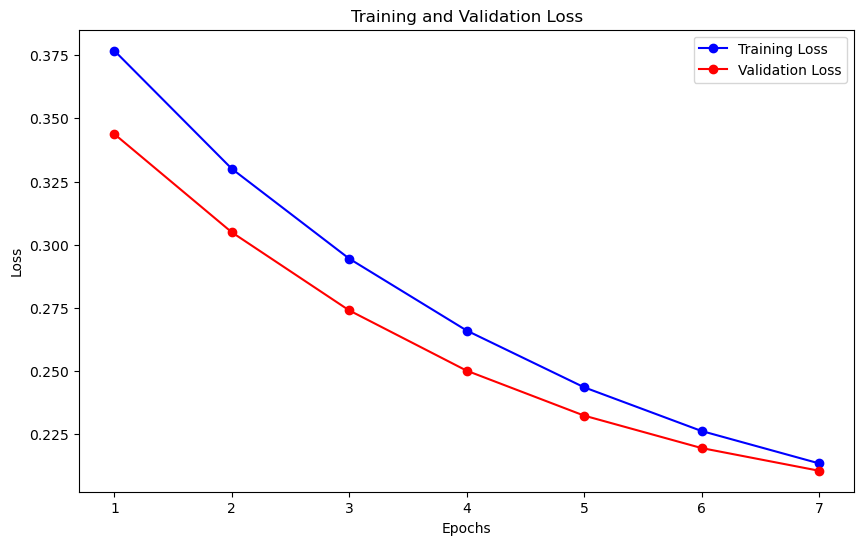

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 track-input (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 mlp_user-embedding (Embedd  (None, 1, 30)                109080    ['user-input[0][0]']          
 ing)                                                                                             
                                                                                                  
 mlp_track-embedding (Embed  (None, 1, 30)                652110    ['track-input[0][0]']   

In [ ]:
# Evaluate NeuMF with MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

test_user_ids = test['user_id'].values.astype('int32')
test_track_ids = test['track_id'].values.astype('int32')
actual_playcounts = test['playcount'].values.astype('float32')

# Predict test data
predicted_playcounts = model.predict([test_user_ids, test_track_ids]).flatten()

# Calculate MAE
mae = mean_absolute_error(actual_playcounts, predicted_playcounts)
print(f"MAE: {mae}")

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_playcounts, predicted_playcounts))
print(f"RMSE: {rmse}")

4545/4545 [==============================] - 8s 2ms/step
MAE: 0.2940051555633545
RMSE: 0.4585190382346348


In [ ]:
# Evaluate with Hit Rate which means if any test track appear in the top-N recommendations

# Get top n recommendation tracks with one user
def top_n_recommend(model, user_id, all_tracks, user_seen_tracks, n):
    track_to_predict = [track for track in all_tracks if track not in user_seen_tracks]

    user_ids = np.array([user_id] * len(track_to_predict), dtype='int32')
    track_ids = np.array(track_to_predict, dtype='int32')

    # Predict playcount for all tracks with this user
    predictions = model.predict([user_ids, track_ids]).flatten()

    # Get top n tracks with highest playcounts predicted
    top_n_index = np.argsort(predictions)[-n:]
    top_n_tracks = [all_tracks[i] for i in top_n_index]

    return top_n_tracks

# Calculate average hit rate across all test datasets
def average_hit_rate(model, test_data, all_tracks, n):
    total_hit_count = 0
    user_count = 0

    for user_id, group in test_data.groupby('user_id'):

        # Get user_seen_tracks from training dataset
        user_seen_tracks = train[train['user_id'] == user_id]['track_id'].tolist()
        top_n_recommends = top_n_recommend(model, user_id, all_tracks, user_seen_tracks, n)
        test_tracks = group['track_id'].values

        print(user_id)
        print(test_tracks)
        print(top_n_recommends)

        hit = any(track in top_n_recommends for track in test_tracks)
        if hit:
            print('***')
        total_hit_count += int(hit)
        print(total_hit_count)
        user_count += 1
    print('----')
    print(user_count)
    return total_hit_count/user_count if user_count > 0 else 0

all_tracks = pd.unique(active_users_listening['track_id'])
n = 50

# Choose 100 users track records from test dataset for testing
unique_users = test['user_id'].unique()
sample_users = np.random.choice(unique_users, size=500, replace=False)
test_data = test[test['user_id'].isin(sample_users)]

hit_rate = average_hit_rate(model, test_data, all_tracks, n)
print(f'The Hit Rate is {hit_rate}')

678/678 [==============================] - 1s 2ms/step
8
[357 179 396 239 1162 886 1145 1154 1176 1133 730 1168 1126 236 1137 226
 1159 1166 1180 204 296 616 220 1142 1140 427 442 261 186 1153 1173 748
 1132 1147 85 266 1143 1151 1130 1158]
[1364, 455, 52, 170, 236, 4695, 1112, 72, 343, 115, 1383, 1524, 177, 717, 232, 1464, 425, 767, 1360, 839, 372, 2535, 2376, 363, 2378, 327, 74, 699, 85, 807, 567, 210, 375, 191, 406, 462, 417, 1143, 223, 854, 2494, 321, 403, 220, 1068, 1094, 233, 183, 275, 168]
***
1
678/678 [==============================] - 1s 2ms/step
13
[1553 1576 1571 765 119 234 37 1056 266 9 747 1616 1184 1617 1192 467 92
 1612 1630 609 1577 1588 1607 1140 1198 577 1595 1614 12 1594 490 154 1575
 1586 91 1610 35 1591 1572 1601]
[3471, 2453, 11494, 383, 484, 297, 454, 1615, 3801, 3110, 6659, 1865, 1291, 5595, 1079, 2845, 2526, 233, 12302, 429, 2261, 2907, 184, 11963, 4459, 364, 4373, 465, 1096, 3393, 5685, 697, 1117, 1827, 7620, 165, 621, 8827, 438, 2245, 9925, 176, 2238, 3815,

678/678 [==============================] - 1s 2ms/step
147
[8063 8075 8053 8068 8064 8076 7508 1188 1514 8066 2331 8071 354 1793 2348
 292 8070 2388 4218 4005 615 287 4479 5238 1558 4498 2357 380 8080 369
 8056 1644 8067 8054 1212 3219 8074 8058 8079 1379]
[11759, 12835, 9776, 3505, 900, 3025, 886, 9229, 10398, 21369, 19689, 2927, 3653, 19825, 3371, 13987, 1809, 556, 10786, 1439, 1644, 5362, 975, 892, 2565, 6679, 4791, 12285, 3128, 19669, 10423, 10552, 822, 9803, 1424, 954, 2585, 1648, 4917, 19708, 3383, 3860, 5636, 9651, 4532, 6582, 212, 602, 2716, 661]
***
9
677/677 [==============================] - 1s 2ms/step
154
[716 668 1092 5471 8236 8243 400 8256 7256 4076 8237 1533 2016 2122 778
 5417 8239 4 103 223 2108 33 3498 8232 517 475 5589 5573 2546 5604 8253
 102 2365 1375 85 8240 8234 8257 5070 71]
[1501, 1128, 331, 820, 242, 191, 370, 2405, 1392, 1469, 479, 676, 196, 401, 2403, 732, 659, 853, 1331, 476, 386, 469, 252, 2521, 1389, 384, 227, 3282, 1154, 1405, 439, 1418, 205, 1110, 118

678/678 [==============================] - 1s 2ms/step
268
[10376 464 348 333 5816 2319 385 4896 9506 275 300 307 162 378 364 280
 1553 313 2311 2316 497 340 5632 357 209 394 1521 363 616 1877 377 288
 1626 341 2317 3673 173 371 108 320]
[219, 1131, 330, 724, 344, 1755, 2270, 127, 104, 1148, 2390, 706, 375, 2392, 360, 67, 43, 1074, 391, 668, 459, 800, 2289, 1091, 2507, 389, 1182, 205, 1107, 592, 254, 860, 229, 1138, 429, 166, 193, 469, 1517, 2269, 1590, 245, 181, 247, 1547, 237, 182, 187, 179, 164]
15
675/675 [==============================] - 1s 2ms/step
290
[14 6786 6379 8581 2237 71 8045 1351 1550 1503 10946 2292 1307 388 4407
 5824 534 3458 6787 729 1419 4663 642 1889 7265 10935 4114 164 1060 4055
 10852 2793 475 1871 2843 1592 3121 310 1037 6707]
[466, 370, 329, 386, 811, 400, 1405, 427, 843, 333, 399, 20, 575, 1096, 1536, 2487, 476, 672, 1177, 206, 437, 1143, 1133, 473, 726, 197, 857, 384, 220, 1377, 709, 393, 230, 1398, 655, 1068, 1403, 1101, 255, 248, 182, 413, 246, 238, 194, 1

675/675 [==============================] - 1s 2ms/step
449
[751 6880 68 94 6934 9 2092 7201 1635 130 7776 28 368 168 1247 162 2831
 1861 4863 207 6914 145 6909 3662 2820 21 93 15 359 156 137 65 63 112 5785
 3536 125 141 12724 4068]
[791, 510, 1393, 1280, 1039, 6474, 59, 2483, 156, 399, 1081, 281, 143, 1377, 1348, 146, 172, 120, 1317, 1314, 174, 1343, 344, 285, 298, 108, 106, 1326, 51, 39, 68, 1330, 114, 50, 22, 1517, 74, 19, 65, 109, 6, 52, 91, 57, 89, 215, 8, 77, 85, 10]
***
23
677/677 [==============================] - 1s 2ms/step
451
[11416 7640 12739 1843 1434 176 12742 327 4974 1390 323 2846 2852 8109
 6188 1437 1404 12738 255 3103 2351 2391 12746 750 12736 11550 3568 6155
 1402 1496 412 3866 197 4082 7873 12749 737 862 1260 12740]
[206, 1133, 2565, 43, 1557, 147, 1162, 118, 584, 443, 66, 1145, 718, 1161, 420, 407, 1406, 1115, 224, 110, 1366, 399, 1194, 480, 213, 2524, 1403, 1152, 736, 483, 680, 1086, 391, 663, 211, 252, 1418, 1394, 20, 234, 1120, 187, 250, 242, 188, 199, 185, 170

677/677 [==============================] - 1s 2ms/step
580
[186 5595 871 3179 518 8677 1164 147 959 5100 7893 13839 531 7746 1619 405
 11855 8901 1018 1875 4548 4726 2376 1792 2362 5384 811 4072 432 13841 537
 11239 5922 9461 13843 5401 1341 12429 2384 886]
[785, 1426, 2704, 1508, 1564, 1117, 1144, 1367, 1408, 2336, 1396, 1979, 390, 233, 1568, 471, 1100, 2450, 109, 1413, 545, 1457, 2413, 5860, 1156, 230, 1405, 1474, 1423, 71, 269, 4712, 223, 3961, 2562, 1393, 3256, 5205, 238, 2530, 481, 1428, 184, 207, 168, 182, 288, 195, 73, 189]
30
678/678 [==============================] - 1s 2ms/step
584
[10863 3193 174 13746 13852 5779 11385 5870 259 13847 240 1316 2411 8223
 2591 13855 13232 1093 13850 1313 6670 427 458 2772 3264 2776 8467 11026
 9607 4893 2577 13854 10579 7681 13851 8930 576 8402 12309 4276]
[3289, 387, 385, 217, 42, 193, 1151, 470, 72, 151, 582, 2531, 1119, 1161, 21, 109, 242, 870, 394, 105, 823, 158, 480, 198, 419, 1411, 716, 416, 1194, 183, 661, 431, 1429, 129, 235, 2417, 143

677/677 [==============================] - 1s 2ms/step
710
[2732 5259 3981 1650 1987 5229 7595 11477 12171 13721 14531 5319 142 1064
 14024 277 3860 1098 2750 910 2155 136 8809 3895 13822 12674 5274 412 84
 188 6172 13731 6133 576 470 517 2598 348 692 414]
[1188, 1154, 209, 6, 22, 577, 1107, 452, 403, 29, 10, 186, 2529, 142, 1125, 21, 1112, 401, 430, 107, 477, 104, 256, 164, 1144, 2411, 374, 54, 1078, 119, 105, 145, 247, 93, 23, 153, 231, 36, 191, 239, 129, 43, 117, 94, 184, 68, 160, 249, 289, 169]
***
36
678/678 [==============================] - 1s 2ms/step
728
[2743 7991 122 8242 209 616 7798 748 14755 5310 14756 2495 1548 10692 4214
 1187 10169 1551 1579 7765 672 3819 302 8574 7465 9261 9240 2466 12 10085
 7789 7452 787 1643 7257 1130 10694 703 1645 8150]
[133, 1406, 854, 580, 562, 2299, 3758, 1796, 5381, 3610, 5775, 492, 465, 3293, 2818, 1497, 2408, 50, 3609, 2549, 1173, 1506, 1911, 3061, 6576, 66, 362, 602, 2812, 1140, 3523, 857, 6349, 4933, 172, 1148, 217, 5399, 178, 1561, 859, 

677/677 [==============================] - 1s 2ms/step
810
[2649 1592 11646 689 1154 7025 871 1628 4924 1572 2492 2544 1149 5123 4889
 2853 5857 1490 2418 2464 4563 2518 3327 2014 5864 1236 181 6603 5801 1177
 237 6813 3726 1031 1861 2489 1646 1329 1476 4966]
[340, 1519, 835, 1415, 74, 249, 2412, 424, 1438, 346, 255, 222, 745, 396, 1419, 188, 1201, 193, 490, 180, 727, 211, 225, 394, 1140, 883, 1128, 593, 2527, 235, 238, 673, 487, 1158, 213, 253, 1152, 690, 243, 1096, 202, 1168, 251, 189, 199, 425, 194, 294, 186, 171]
42
678/678 [==============================] - 1s 2ms/step
819
[3211 3421 8905 4276 2071 7370 1952 3216 21 500 413 6787 814 8848 471
 10265 2831 325 850 8539 11417 677 577 6621 9745 2905 9428 133 1912 4887
 3128 10096 1510 10082 6426 118 3618 473 5845 15332]
[1915, 396, 437, 1430, 7113, 976, 2527, 5889, 359, 330, 368, 449, 2805, 474, 244, 261, 2623, 3772, 878, 1526, 3659, 12310, 2800, 852, 1079, 1096, 1308, 39, 1108, 2523, 242, 3978, 264, 819, 251, 5776, 1562, 674, 190, 111

675/675 [==============================] - 1s 2ms/step
918
[17 11793 7591 9056 2386 845 6557 15790 15794 876 7892 1791 10810 160
 13073 1634 11608 2651 7185 1898 7699 7586 5730 1582 8 890 6425 13057 376
 13020 59 9287 2715 134 6374 15789 162 11759 6017 299]
[161, 1382, 53, 132, 808, 101, 154, 14, 193, 57, 247, 1395, 1143, 229, 137, 115, 133, 129, 143, 399, 1391, 140, 182, 245, 159, 142, 21, 108, 65, 114, 91, 59, 92, 187, 179, 128, 155, 141, 103, 43, 28, 67, 125, 148, 9, 22, 286, 20, 102, 164]
***
48
678/678 [==============================] - 1s 2ms/step
921
[6685 9 5 7744 699 3546 7441 2322 14682 11 5730 364 171 135 9261 6921 1743
 236 6412 59 5038 44 113 1406 4659 9781 69 131 15 61 7667 144 8 39 5014
 3548 2016 10380 6 3408]
[401, 368, 68, 356, 1446, 1412, 119, 1383, 59, 1399, 5, 456, 664, 262, 100, 347, 221, 8, 57, 9, 94, 13, 856, 359, 61, 145, 83, 49, 352, 203, 43, 63, 118, 3284, 171, 143, 134, 103, 163, 97, 93, 166, 51, 140, 324, 318, 35, 115, 273, 148]
***
49
677/677 [============

677/677 [==============================] - 1s 2ms/step
1075
[2216 972 975 10796 5406 4066 5425 12415 7577 4412 3529 5341 13132 364
 12093 9925 7283 4413 3565 13127 576 7817 15576 3819 956 12683 7597 5349
 9962 3874 6009 3504 342 1409 2985 2303 116 5865 2103 665]
[197, 724, 508, 408, 574, 1122, 401, 589, 2577, 219, 187, 422, 202, 238, 1152, 2538, 346, 5008, 1147, 1405, 1088, 392, 179, 1264, 211, 1164, 1432, 73, 1576, 251, 71, 830, 488, 1414, 243, 878, 115, 253, 507, 225, 199, 340, 192, 686, 188, 423, 185, 193, 294, 170]
56
675/675 [==============================] - 1s 2ms/step
1079
[1396 576 3432 5782 16489 3710 14008 1725 4366 3666 1073 5625 9158 13913
 2870 943 9045 4711 3106 1046 8229 10442 2391 2490 7037 4591 430 12704 799
 231 2322 3209 16488 3741 3274 1200 7954 8543 8675 12473]
[152, 43, 676, 1545, 68, 470, 440, 1808, 394, 1392, 105, 412, 93, 1408, 145, 1183, 2493, 581, 714, 144, 414, 245, 10, 22, 231, 94, 21, 111, 66, 222, 209, 23, 659, 385, 401, 1109, 1075, 200, 238, 403, 415, 1

678/678 [==============================] - 1s 2ms/step
1201
[601 691 3115 8576 2439 1015 6598 9744 1634 277 15884 6703 3127 267 9622
 7337 7743 4407 5835 40 812 12105 1403 999 3162 16060 12704 9654 9742 8515
 1487 8231 7701 10817 3720 1933 11603 13943 1449 4164]
[2425, 2594, 1434, 226, 422, 858, 394, 426, 2581, 1839, 193, 180, 1134, 259, 2540, 2423, 682, 2637, 5824, 478, 249, 175, 250, 410, 401, 1429, 1117, 1195, 1162, 448, 392, 485, 665, 212, 203, 236, 719, 188, 873, 244, 1088, 423, 251, 253, 200, 186, 189, 194, 171, 293]
64
677/677 [==============================] - 1s 2ms/step
1205
[5620 1393 342 119 4405 11 2745 442 69 1638 1211 92 6620 158 1608 67 28
 209 489 82 3082 147 1101 2831 1147 50 8 7 26 6050 189 120 194 17 10 110
 139 2562 145 261]
[1067, 365, 55, 1345, 93, 351, 1375, 28, 322, 1357, 9, 280, 1361, 117, 69, 31, 145, 1549, 12, 33, 6, 15, 19, 119, 101, 78, 29, 100, 59, 91, 7, 70, 125, 27, 140, 40, 114, 86, 105, 110, 77, 109, 87, 52, 85, 81, 8, 108, 16, 50]
***
65
676/676 [===

677/677 [==============================] - 1s 2ms/step
1284
[24 3794 2671 234 7687 9320 2606 165 4870 1965 3455 5850 1154 145 17223
 127 1983 4872 11625 2401 9744 3997 8526 2659 3720 2610 5809 1140 3461
 3437 5023 5822 5842 2814 5849 11185 4026 5785 1671 3456]
[402, 90, 126, 337, 1427, 1405, 236, 242, 73, 1122, 864, 400, 784, 1422, 678, 1830, 369, 393, 267, 174, 252, 156, 2525, 1190, 1508, 111, 476, 869, 469, 440, 197, 384, 716, 331, 353, 229, 206, 1084, 243, 661, 245, 1118, 415, 182, 194, 180, 188, 165, 183, 285]
***
72
678/678 [==============================] - 1s 2ms/step
1288
[712 13526 3191 3230 3219 7248 4966 17243 10328 530 719 7921 838 1609
 10321 1605 8034 3932 7059 2671 8395 6838 881 3202 3201 3154 433 3224 849
 2603 1615 748 1188 6371 4487 1843 4469 1589 6829 1728]
[222, 109, 473, 1107, 246, 2608, 235, 391, 2553, 1128, 434, 1491, 374, 405, 1116, 210, 1405, 844, 2395, 1410, 727, 813, 398, 336, 1378, 1387, 858, 1391, 581, 1134, 483, 199, 675, 2513, 208, 389, 480, 184, 1103, 24

677/677 [==============================] - 1s 2ms/step
1380
[4972 3341 9195 10729 263 204 1446 3310 3995 3266 245 2664 1224 175 1486
 3127 2562 3994 5824 1480 8883 1386 1505 3966 5829 1648 447 227 1428 6359
 6633 6563 5030 3264 3166 3613 1097 5630 3991 9235]
[214, 1131, 72, 1561, 467, 1122, 116, 437, 384, 1142, 474, 1114, 2402, 1149, 1502, 111, 855, 334, 217, 367, 358, 822, 391, 1158, 715, 2518, 230, 74, 186, 477, 677, 205, 1119, 1192, 382, 870, 328, 1405, 1085, 234, 227, 660, 1420, 241, 243, 187, 184, 191, 171, 282]
***
82
678/678 [==============================] - 1s 2ms/step
1405
[7736 3492 11184 8483 6033 3220 7917 7605 388 4534 3738 60 499 2453 2420
 3753 5942 1767 3593 11512 8453 8945 1843 6798 550 39 6966 1679 4062 8947
 4512 2459 517 3384 1327 6626 5045 4855 3568 9674]
[477, 440, 582, 1142, 480, 369, 115, 823, 2570, 2626, 1121, 256, 1409, 185, 1397, 234, 679, 2414, 110, 209, 1083, 430, 1159, 1427, 393, 733, 1479, 1149, 1193, 1400, 381, 415, 1112, 1413, 331, 1117, 239, 1432, 384

677/677 [==============================] - 1s 2ms/step
1475
[2649 4402 3582 353 2785 10955 8136 4059 9769 7478 2867 5360 606 2336 300
 6759 943 1349 10155 7633 58 2273 275 2014 1040 1463 16652 2426 322 3433
 134 1606 452 1889 2745 5317 13737 1608 360 956]
[650, 205, 222, 1138, 249, 404, 104, 1415, 259, 91, 2402, 144, 705, 196, 143, 1073, 378, 1148, 1401, 92, 2519, 157, 186, 1397, 245, 1102, 10, 93, 376, 141, 21, 29, 1111, 128, 229, 108, 193, 392, 151, 44, 237, 23, 103, 1107, 181, 68, 187, 247, 287, 166]
90
677/677 [==============================] - 1s 2ms/step
1476
[4490 6703 15838 306 1500 1540 346 4641 360 32 1552 11792 340 7781 241
 2542 9736 467 2801 1169 935 9326 4753 7783 1563 2685 886 3050 7345 275
 1128 203 1569 1522 7836 7861 7850 4457 1547 17763]
[1129, 410, 1387, 1557, 2404, 1400, 2406, 431, 810, 843, 380, 1419, 460, 387, 570, 241, 1414, 1396, 432, 334, 251, 1117, 422, 2520, 219, 328, 1136, 1180, 649, 467, 197, 703, 469, 378, 1146, 183, 206, 1105, 1100, 858, 227, 234, 1071, 

677/677 [==============================] - 1s 2ms/step
1588
[4412 5586 6887 5748 1793 4413 878 2894 6974 3205 753 10231 654 2913 2388
 4440 6891 14077 6979 6919 4387 3082 6987 526 13448 614 9695 1080 866 500
 7496 601 11444 2013 981 2170 2727 10844 3805 7801]
[21, 238, 424, 859, 1135, 379, 362, 225, 590, 1198, 211, 480, 130, 874, 118, 487, 222, 192, 69, 1402, 187, 1154, 1164, 370, 1405, 722, 235, 213, 394, 668, 243, 1088, 340, 685, 346, 1122, 202, 1431, 251, 1418, 1436, 1414, 253, 199, 425, 188, 193, 185, 294, 170]
97
677/677 [==============================] - 1s 2ms/step
1596
[4039 2388 1975 73 14063 498 4986 20 2159 716 1704 2186 13167 13170 12826
 4025 478 8605 3066 18139 4738 2052 5249 11869 2062 17874 15979 117 4754
 2561 4740 35 2241 2265 737 14064 14075 7129 1580 51]
[2347, 221, 21, 11, 92, 894, 93, 134, 107, 118, 53, 1468, 106, 1374, 20, 1486, 185, 3398, 144, 181, 23, 1404, 161, 1434, 10, 130, 110, 1424, 1484, 1416, 1441, 59, 166, 157, 103, 1407, 1420, 1437, 65, 127, 22, 367, 4

678/678 [==============================] - 1s 2ms/step
1703
[2320 6387 1186 1065 1731 1091 2595 1194 8394 1733 1932 6031 2727 1795
 2307 1523 1461 5356 2346 5649 3020 2313 6964 124 791 7201 1139 13037 142
 1553 2314 580 1539 1516 316 3673 2330 416 11680 1130]
[473, 1118, 2398, 2553, 2396, 20, 405, 433, 403, 209, 1139, 1701, 1156, 389, 418, 663, 2267, 387, 373, 734, 1525, 716, 198, 221, 256, 443, 1081, 168, 336, 2512, 483, 1190, 1114, 680, 1146, 207, 82, 183, 231, 868, 195, 249, 247, 239, 1109, 184, 189, 181, 166, 291]
***
107
678/678 [==============================] - 1s 2ms/step
1724
[728 15732 1284 5881 2518 5430 1718 2071 15589 5040 469 1337 2908 1550
 1816 2270 2446 1253 1871 10206 545 975 1755 3513 5863 7241 663 811 3376
 2253 3429 764 943 10660 14952 498 1824 8978 5856 7894]
[2567, 2288, 13744, 2279, 4896, 7418, 6983, 7202, 6599, 7622, 4731, 5597, 7541, 10573, 12701, 8993, 14318, 15621, 2694, 7389, 16241, 3177, 12842, 11735, 12374, 2346, 9731, 5354, 4361, 547, 12071, 14344, 6280,

676/676 [==============================] - 1s 2ms/step
1797
[226 2569 9226 135 3455 17853 96 1747 4385 405 296 15 3082 51 5592 449 130
 3315 80 113 8408 482 36 82 4944 5003 555 254 5992 194 470 110 85 18645
 11866 220 13 384 1858 252]
[799, 78, 316, 1059, 1332, 1362, 101, 677, 659, 67, 76, 1536, 13, 526, 1367, 299, 154, 277, 9, 112, 1054, 1063, 1348, 1344, 146, 167, 283, 414, 108, 165, 134, 181, 189, 319, 143, 111, 1095, 38, 362, 96, 86, 41, 191, 80, 116, 138, 85, 68, 19, 231]
***
113
677/677 [==============================] - 1s 2ms/step
1798
[471 3985 1140 778 2562 3082 689 447 239 1101 4072 1536 1597 1135 4074
 1164 398 7216 1177 241 2664 482 869 173 492 191 274 1087 3575 296 3333
 1941 4071 463 1148 424 225 2625 871 3756]
[74, 217, 346, 52, 394, 231, 3978, 85, 176, 172, 396, 212, 115, 1432, 1548, 358, 1784, 3241, 338, 355, 189, 704, 210, 1350, 1353, 1521, 222, 418, 1366, 322, 383, 825, 202, 1362, 370, 446, 399, 1094, 1385, 2367, 1380, 2484, 1114, 455, 1081, 1086, 200, 220, 1052, 27

676/676 [==============================] - 1s 2ms/step
1885
[7279 13117 4638 203 13113 2838 7141 2843 5017 3746 181 11920 7263 5981
 2210 6421 8918 3674 227 18832 3702 2205 4697 5407 5862 4993 1843 204 3698
 9030 250 11923 7122 1945 2990 11077 2233 1825 4663 7250]
[2606, 231, 477, 2400, 819, 23, 252, 1150, 730, 429, 243, 1124, 2399, 1106, 403, 159, 216, 1111, 69, 129, 1499, 1185, 675, 219, 1115, 1142, 21, 713, 474, 867, 95, 2514, 387, 228, 244, 658, 205, 182, 194, 197, 579, 236, 1151, 1077, 246, 188, 180, 183, 167, 287]
118
678/678 [==============================] - 1s 2ms/step
1897
[377 452 15512 627 3457 320 1139 244 3499 275 188 6605 5989 595 267 285
 16682 7134 296 313 2446 2340 414 2604 1166 550 1648 2584 180 730 2864
 3462 1175 194 1361 7103 18867 463 198 1890]
[21, 369, 434, 245, 1562, 409, 2564, 2620, 1148, 1389, 1416, 210, 1421, 1114, 390, 1132, 398, 1120, 383, 330, 1402, 576, 464, 336, 1398, 2407, 222, 726, 425, 471, 435, 656, 864, 708, 1139, 2524, 474, 1183, 672, 1149, 381, 

678/678 [==============================] - 1s 2ms/step
1977
[12002 396 171 489 1957 2142 2362 420 7097 398 14940 5870 8415 12506 1698
 1548 19012 1352 11433 442 6552 5887 5922 19009 8592 5488 6379 5883 405
 482 10161 492 511 671 7926 3263 4354 278 3488 9524]
[872, 4533, 479, 1169, 282, 4736, 448, 242, 800, 1664, 196, 3639, 2429, 2496, 221, 654, 775, 115, 249, 3519, 832, 1153, 486, 250, 2427, 1204, 190, 1170, 865, 2641, 201, 234, 424, 439, 339, 187, 592, 237, 489, 259, 688, 252, 1094, 393, 198, 210, 188, 170, 185, 293]
***
124
678/678 [==============================] - 1s 2ms/step
1978
[424 1244 228 2444 3461 3436 2584 1157 1392 1126 1137 198 2393 3613 2830
 173 244 427 296 1142 4074 451 2428 470 442 237 7645 441 1152 405 482 6119
 2467 471 2562 1101 1973 456 452 1649]
[21, 397, 338, 74, 1452, 3268, 385, 1809, 176, 208, 115, 188, 421, 231, 1370, 383, 1373, 1544, 322, 2552, 452, 1104, 1382, 838, 2395, 1486, 1386, 401, 316, 200, 1405, 413, 210, 1112, 716, 1122, 422, 1400, 564, 376, 459, 6

677/677 [==============================] - 1s 2ms/step
2083
[4467 79 81 474 1879 67 348 150 1902 5641 92 121 21 2831 480 2814 464 95
 2906 8605 587 18069 12036 1562 39 71 273 16879 59 139 297 6418 4504 36
 4524 166 6436 51 10084 105]
[27, 329, 7, 157, 1377, 215, 149, 128, 30, 28, 129, 16, 1570, 1849, 1381, 40, 76, 114, 32, 86, 65, 59, 101, 13, 94, 78, 152, 106, 112, 44, 257, 8, 135, 124, 96, 120, 48, 95, 89, 18, 97, 119, 17, 131, 79, 54, 9, 87, 107, 34]
***
132
678/678 [==============================] - 1s 2ms/step
2113
[121 1192 6 1861 110 105 5666 61 9027 7795 125 67 2348 129 24 6151 3217
 1608 104 56 20 51 106 38 8940 43 83 153 21 59 145 144 17 46 107 158 41
 4557 9 81]
[327, 428, 200, 6553, 1361, 358, 1425, 1391, 53, 132, 284, 67, 172, 6370, 1373, 140, 1377, 134, 314, 59, 50, 108, 34, 91, 9, 1567, 135, 27, 6, 12, 242, 79, 15, 117, 7, 89, 114, 75, 32, 4, 101, 84, 40, 85, 110, 16, 48, 42, 77, 76]
***
133
677/677 [==============================] - 1s 2ms/step
2138
[9637 19330 6693 173

677/677 [==============================] - 1s 2ms/step
2217
[2972 13318 6284 13209 11432 11807 11343 2949 8788 12681 2940 2956 4821
 7098 4826 12530 11291 18691 2977 2954 8202 3952 16707 19475 7449 18109
 6552 2995 12527 19476 8205 19472 6236 8203 6213 11320 14031 19471 7471
 2978]
[676, 3536, 93, 6163, 497, 839, 340, 6182, 147, 4099, 360, 4423, 131, 6231, 924, 21, 272, 168, 2388, 2060, 42, 7216, 2269, 144, 5294, 127, 384, 107, 110, 8848, 9, 665, 94, 35, 4831, 119, 44, 108, 85, 3874, 5359, 395, 278, 6251, 3225, 90, 3651, 1583, 24, 576]
138
676/676 [==============================] - 1s 2ms/step
2219
[1490 189 469 188 2393 495 274 1532 1248 203 179 267 9524 2562 871 220
 1136 234 213 357 9844 180 31 1392 398 397 675 2710 2513 430 2870 1148
 3613 726 1597 146 10265 223 3770 11416]
[353, 356, 325, 21, 221, 173, 344, 4647, 1534, 1371, 205, 181, 113, 333, 169, 372, 3217, 186, 203, 370, 310, 1416, 1450, 1507, 228, 1094, 2503, 1334, 807, 384, 401, 539, 1350, 1086, 1337, 1346, 402, 1073, 689, 1

677/677 [==============================] - 1s 2ms/step
2296
[2877 580 3003 12342 5624 3024 15312 2830 3112 3626 4503 6226 12008 2636
 19583 2333 2660 7836 699 9596 7236 7788 7256 2639 2904 4626 10493 11215
 11918 18244 937 960 966 946 9222 384 14209 6879 10306 539]
[8010, 2662, 13262, 6225, 3662, 6925, 9411, 5419, 1934, 7923, 10733, 5536, 1290, 577, 641, 4364, 7401, 7368, 6547, 4981, 1986, 2054, 1976, 1875, 8323, 6189, 9369, 7386, 5636, 3357, 1894, 2711, 7211, 2721, 5815, 4673, 9928, 4149, 8300, 3239, 9338, 6204, 566, 4911, 1886, 6089, 11962, 8692, 5363, 3626]
***
145
677/677 [==============================] - 1s 2ms/step
2299
[5055 18584 4653 18585 13106 1221 84 530 600 3816 2649 4724 1390 5050 2891
 4046 10174 502 4042 1496 19621 7655 1416 7347 16507 19619 4386 4330 451
 11067 411 12660 3265 1344 8677 3316 14192 1431 9259 400]
[106, 3293, 93, 873, 21, 243, 377, 3519, 380, 147, 1196, 2528, 528, 2809, 1134, 1570, 2628, 1087, 174, 260, 481, 444, 858, 2346, 1408, 1396, 401, 1412, 1592, 3

678/678 [==============================] - 1s 2ms/step
2416
[193 703 113 5232 3528 7473 19932 17137 14754 275 943 577 8010 394 19930
 278 377 11476 400 956 2466 17109 411 1773 10382 11394 5857 2877 322 285
 2967 520 3488 1941 307 3943 280 105 340 432]
[848, 382, 203, 91, 243, 384, 108, 1388, 158, 1417, 464, 26, 709, 104, 142, 227, 1502, 141, 1399, 368, 223, 154, 194, 58, 575, 66, 179, 727, 191, 1074, 64, 331, 410, 337, 102, 19, 20, 1403, 863, 1150, 92, 41, 10, 245, 126, 177, 185, 180, 163, 287]
152
676/676 [==============================] - 1s 2ms/step
2420
[4996 3582 492 1562 241 5578 4909 1754 1245 267 179 1590 1578 1732 7005
 5768 5992 8346 5139 1728 482 2419 8417 6405 412 3469 3341 2463 498 1165
 5029 7689 5074 603 252 5642 1767 5050 871 489]
[3980, 216, 197, 212, 353, 376, 345, 1441, 1088, 116, 175, 3240, 238, 402, 2372, 111, 1791, 1475, 424, 1361, 329, 185, 1364, 223, 827, 405, 1108, 203, 417, 243, 1394, 1377, 452, 1115, 323, 377, 1390, 390, 1373, 193, 462, 640, 1157, 459, 656, 2

678/678 [==============================] - 1s 2ms/step
2604
[2831 2850 232 3981 627 1592 7216 135 12 12656 555 42 4987 5054 4996 10767
 2528 131 2643 44 218 9370 415 6610 231 1398 1720 806 400 9622 1579 868
 5950 577 6073 511 708 6620 1589 4347]
[230, 419, 212, 1138, 1123, 2402, 429, 469, 384, 837, 241, 1407, 1377, 163, 236, 231, 3277, 459, 375, 2516, 568, 195, 1100, 1173, 1095, 171, 466, 327, 646, 176, 216, 663, 699, 185, 1129, 1139, 193, 851, 234, 405, 207, 224, 232, 1066, 182, 172, 177, 169, 155, 275]
***
163
677/677 [==============================] - 1s 2ms/step
2620
[2869 161 7025 5980 4559 2540 5648 2197 2750 6093 432 5032 15072 5990 3635
 4597 1526 3564 4885 7113 940 9523 2339 7201 2411 9815 1457 9171 3499
 11879 1205 2774 12810 1940 1118 242 1583 16917 4661 1908]
[19690, 3787, 5578, 16178, 3266, 6742, 8900, 14166, 10814, 17936, 6113, 1179, 4705, 15527, 12929, 5805, 12480, 7353, 18716, 7209, 15075, 14235, 5579, 14337, 5196, 4477, 12458, 4456, 17730, 15047, 19057, 2607, 3597, 598

677/677 [==============================] - 1s 2ms/step
2730
[15685 1314 4531 2069 7511 6280 4283 7493 2817 14390 15875 9556 7969 16904
 1553 2152 4648 1965 10169 7405 341 2320 4088 102 1719 6557 1700 1118
 12065 1349 16253 8706 1139 142 2072 12075 12049 2066 6397 11728]
[414, 385, 219, 1162, 477, 197, 222, 2749, 235, 370, 386, 1575, 402, 384, 192, 2419, 412, 2574, 874, 1197, 439, 250, 680, 225, 718, 2630, 1087, 3292, 400, 440, 1116, 418, 2417, 211, 243, 174, 335, 1121, 470, 187, 199, 202, 251, 415, 193, 253, 188, 185, 294, 170]
169
677/677 [==============================] - 1s 2ms/step
2733
[119 2 16860 7348 10227 10824 881 97 1224 9397 781 1432 1480 2192 1136
 6359 5109 45 2621 1446 13430 161 6363 1428 1453 7853 5828 1416 7580 1622
 705 2589 429 126 10266 1429 94 96 2600 3588]
[140, 106, 661, 330, 228, 385, 1143, 10, 1417, 716, 104, 146, 383, 413, 28, 476, 245, 2522, 204, 189, 582, 399, 193, 100, 216, 90, 22, 479, 184, 1150, 336, 179, 1119, 678, 112, 1405, 225, 20, 1085, 241, 233, 140

678/678 [==============================] - 1s 2ms/step
2866
[6820 1603 3295 111 871 3280 1143 2250 3337 838 1139 2605 4119 1432 3353
 1577 11798 1255 3338 5226 3121 1496 595 3461 232 190 868 234 178 6987 296
 386 7351 1148 5950 1386 213 1160 3980 191]
[1165, 3282, 434, 74, 2562, 1564, 198, 862, 404, 587, 1151, 474, 222, 111, 1157, 1505, 2406, 444, 829, 1139, 1121, 422, 684, 740, 390, 397, 481, 202, 484, 388, 722, 1413, 877, 211, 1126, 1199, 2524, 667, 188, 1092, 231, 238, 419, 244, 246, 189, 186, 194, 171, 288]
***
174
678/678 [==============================] - 1s 2ms/step
2867
[121 15265 3 6685 96 228 410 2369 2548 17007 4587 7296 170 125 1192 110
 331 115 17928 426 11819 36 20682 15268 20753 2359 59 118 286 1532 480 381
 514 9217 9083 107 17921 4476 172 70]
[3653, 764, 11320, 2726, 773, 3749, 2504, 83, 269, 179, 324, 957, 2959, 236, 383, 63, 1404, 289, 174, 282, 435, 4714, 9188, 5211, 474, 1153, 2338, 4167, 327, 14083, 371, 3960, 2495, 1143, 317, 780, 28, 119, 376, 1615, 80, 158, 484

677/677 [==============================] - 1s 2ms/step
2979
[5803 4869 191 1533 696 11657 5012 1617 14204 1130 1136 1587 402 3352 1101
 1628 3339 819 6786 5357 5333 14776 4111 239 5674 11934 2243 577 3043 748
 6830 14162 2351 14998 432 2319 242 675 235 651]
[292, 581, 12986, 6727, 1689, 106, 11658, 7804, 373, 12589, 2414, 466, 12974, 673, 427, 753, 544, 1513, 2265, 1102, 4785, 6140, 2542, 6583, 1685, 400, 8743, 464, 205, 7273, 8392, 2690, 2256, 1499, 169, 1542, 10174, 1097, 171, 236, 594, 83, 185, 436, 186, 2291, 1888, 286, 1449, 1911]
181
675/675 [==============================] - 1s 2ms/step
2981
[557 959 6588 646 1675 549 6959 2786 5646 4819 11065 16766 4097 4598 4401
 409 7047 727 5513 20888 6971 466 481 12427 2311 814 11487 12664 7565 270
 1544 8135 4315 1847 16273 4761 465 5278 10854 856]
[404, 416, 1556, 1464, 178, 396, 846, 1385, 2549, 212, 475, 440, 402, 474, 1179, 73, 2394, 373, 469, 441, 1398, 671, 1135, 186, 388, 390, 201, 1072, 191, 2510, 655, 210, 1394, 709, 1382, 861, 14

677/677 [==============================] - 1s 2ms/step
3074
[3164 21043 17452 2003 2106 6850 6430 1358 672 1999 19127 8093 429 11183
 3056 3057 7512 2711 4968 5173 177 1877 5932 176 5242 1160 161 2384 734
 8605 4698 4753 7834 1397 13851 909 7820 2476 3471 92]
[1521, 1421, 18, 1122, 164, 379, 861, 19, 2399, 239, 1402, 140, 1416, 706, 367, 56, 89, 17, 153, 64, 669, 433, 1387, 179, 191, 240, 249, 62, 397, 146, 40, 112, 50, 139, 1075, 124, 410, 242, 90, 232, 216, 1104, 180, 1151, 185, 101, 1109, 177, 162, 282]
***
185
676/676 [==============================] - 1s 2ms/step
3079
[470 190 6814 10702 1617 1868 2986 1825 2106 4026 178 6779 8476 8945 206
 88 2591 13851 11611 9248 16946 18 1139 6723 2204 13515 213 1923 208 12380
 3719 1592 2540 1246 1911 8831 7778 2852 1484 4922]
[184, 1109, 395, 1146, 811, 349, 1554, 214, 413, 2513, 191, 2610, 434, 435, 1105, 1640, 2398, 470, 703, 248, 207, 1130, 238, 1181, 2400, 572, 227, 1137, 649, 379, 1147, 859, 328, 181, 1100, 665, 425, 193, 205, 473, 410, 

678/678 [==============================] - 1s 2ms/step
3157
[8003 18 14683 1955 8381 5179 13477 21149 154 944 4673 68 6413 131 851
 5451 665 128 5427 7820 10701 8275 692 7801 10138 856 3466 4374 2481 63
 3942 3479 10229 1586 10238 12289 10231 3023 937 6026]
[1507, 761, 3950, 70, 1116, 1392, 382, 2322, 731, 3135, 1567, 458, 440, 1831, 416, 385, 1078, 165, 203, 243, 4872, 2169, 1408, 415, 879, 471, 2562, 1474, 1064, 781, 480, 227, 2530, 191, 1427, 1144, 245, 1404, 441, 613, 125, 180, 235, 401, 403, 178, 163, 185, 1112, 285]
193
677/677 [==============================] - 1s 2ms/step
3159
[1769 507 57 1331 401 21152 4986 107 2439 13 777 6607 4046 3823 3505 2411
 2524 568 10253 2082 1795 9720 1583 594 1606 3705 17886 7385 3527 4055
 9175 1523 593 4833 4961 423 103 3733 574 3645]
[2410, 104, 1132, 586, 233, 1408, 373, 187, 2412, 2527, 108, 1119, 126, 1161, 28, 443, 2568, 376, 388, 481, 719, 1195, 736, 434, 1151, 182, 390, 335, 1144, 220, 206, 197, 208, 20, 484, 419, 682, 871, 194, 248, 246, 

677/677 [==============================] - 1s 2ms/step
3238
[10437 3568 2258 4631 10430 12423 705 143 15417 4961 11842 1709 10883
 12795 7313 502 14952 2406 1765 1267 3932 245 836 1388 2207 111 43 3012
 1741 2358 4998 1749 2530 1414 115 332 10429 2497 1801 1753]
[267, 57, 350, 104, 1596, 122, 157, 370, 108, 1119, 50, 146, 145, 131, 1098, 36, 106, 226, 93, 338, 53, 382, 479, 1110, 10, 92, 164, 162, 242, 23, 234, 144, 332, 158, 59, 244, 373, 29, 67, 116, 181, 21, 184, 103, 188, 43, 128, 152, 286, 167]
***
197
677/677 [==============================] - 1s 2ms/step
3240
[58 5567 4415 20723 10 127 5107 5351 48 13 4557 10728 139 1559 22 5405
 1230 161 107 148 96 6436 5914 15 541 97 41 30 1914 1199 160 3408 114 39
 3670 64 9 44 4609 95]
[337, 295, 6371, 151, 99, 74, 56, 145, 28, 8, 31, 1378, 1572, 117, 60, 1382, 128, 10, 93, 121, 120, 14, 146, 59, 17, 98, 33, 253, 64, 92, 29, 107, 34, 75, 119, 6, 45, 39, 125, 5, 12, 94, 104, 18, 7, 112, 77, 76, 85, 36]
***
198
677/677 [=======================

678/678 [==============================] - 1s 2ms/step
3442
[3342 1165 348 212 868 6073 1178 17186 1392 171 2652 1648 1676 1271 6043
 398 8919 1428 4700 198 494 14148 4761 1341 3981 1167 1136 627 3980 10448
 249 6119 3566 372 1646 2618 1131 221 14312 203]
[3780, 1746, 10524, 4270, 6668, 18210, 6997, 15667, 4849, 14245, 12482, 9215, 4115, 782, 14115, 5878, 8521, 6114, 3365, 9438, 911, 15964, 19818, 4954, 5687, 7259, 8939, 1181, 778, 686, 5346, 2657, 10006, 3000, 14059, 7685, 2576, 1296, 3869, 4717, 9851, 5833, 5741, 9879, 4874, 906, 427, 3367, 4327, 495]
209
675/675 [==============================] - 1s 2ms/step
3443
[3588 10 3393 1753 869 1286 1662 1393 1592 146 15063 414 105 2848 609 398
 2711 3696 56 1660 749 23 396 2615 149 11914 238 322 2086 1087 94 4075 341
 474 22 109 8562 24 1977 21532]
[119, 1335, 4485, 4994, 1705, 2190, 1476, 315, 23, 4858, 63, 4462, 8, 60, 16, 32, 75, 7786, 4734, 93, 12, 35, 19, 127, 31, 102, 14, 47, 92, 26, 52, 114, 88, 79, 142, 89, 9, 96, 36, 10, 20, 80, 12

677/677 [==============================] - 1s 2ms/step
3609
[270 5803 7650 259 198 12 2369 642 5650 2605 4639 1795 5641 1888 4578 210
 400 4709 813 10830 7652 2338 3110 6546 3035 5633 4074 3459 182 1810 3081
 1908 5119 1440 361 3583 1920 6384 232 1369]
[17635, 1841, 5966, 7319, 2280, 13398, 39, 4781, 5571, 126, 11663, 1490, 1879, 5373, 7509, 3576, 4462, 1440, 11225, 1064, 1333, 6244, 12816, 5676, 7222, 1504, 1902, 5507, 11653, 1413, 14320, 2496, 5054, 1678, 2688, 4953, 6143, 8010, 6152, 6020, 4943, 3592, 2769, 359, 3593, 2259, 2538, 2260, 3642, 2250]
***
215
678/678 [==============================] - 1s 2ms/step
3613
[237 9094 3333 1101 2266 1545 1646 1153 1177 1194 1091 1935 1873 470 1526
 703 5605 4431 1682 5591 296 2603 2710 576 302 4401 1914 1929 2314 1726
 1176 1490 2209 2873 2326 4427 3456 2243 4382 449]
[11613, 21249, 18388, 2611, 4674, 5293, 10716, 8620, 12074, 4691, 5519, 18019, 12226, 15548, 4418, 21501, 19560, 4022, 4872, 18183, 13825, 7002, 2132, 5030, 867, 1839, 2313, 8369

NeuMF Model Hit Rate as shown above is **0.434**

**Model Result Comparsion and Analysis:**

Models | MPL | GMF | NeuMF
:- | :-: | :-: | :-:
MAE | 0.325 | 0.316 | 0.294
RMSE | 0.432 | 0.440 | 0.458
Hit Rate | 0.322 | 0.380 | 0.434

Above is the metric comparison of 3 models that were implemented as above.
We can see an decrease in MAE value from MPL, GMF, and to NeuMF. Because we use MAE as loss function. The lower MAE value means the model can predict more accurately. As a result, it aligns with the Hit Rate value across the 3 models. GMF outperformed MPL while NeuMF outperformed GMF which also verified the result from the reference paper. The NeuMF model that combining MPL and GMP has better performace.

# 3.4 Neural Hybrid Method

This method aims to use Neural Network to combine `User-Track` embedding and `Track features` as input, then build a Multiple Layers network to predict playcounts(likeness of song).

In [ ]:
track_df = new_df # Track dataframe after propressing in step 2.3
track_df.head()

,track_id,name,artist,tags,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_group
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,"rock, alternative, indie, alternative_rock, in...",-0.774435,0.919025,-1.208617,0.864102,1,-0.018769,-0.701555,-0.668470,-0.640709,-0.746125,0.830211,5
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,"rock, alternative, indie, pop, alternative_roc...",-0.472476,0.815716,-0.928377,0.861241,1,-0.558135,-0.702821,-0.668470,-0.045724,0.842492,1.718472,5
2,TROUVHL128F426C441,Come as You Are,Nirvana,"rock, alternative, alternative_rock, 90s, grunge",0.081115,0.553470,-0.367898,0.550993,0,-0.473941,-0.704910,-0.667108,-0.691058,0.425045,-0.118477,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,"rock, alternative, indie, alternative_rock, in...",-1.199415,-0.090224,1.033301,-0.124072,1,-0.512092,-0.704202,-0.666527,-0.446351,0.220187,-0.640118,5
4,TRLNZBD128F935E4D8,Creep,Radiohead,"rock, alternative, indie, alternative_rock, in...",0.120258,-1.020006,0.472821,-0.362589,1,-0.514723,-0.671778,-0.668052,-0.468006,-1.271798,-1.069495,5


In [ ]:
active_users_listening.head() # Listen dataframe after propressing in step 3.3

,track_id,user_id,playcount
121,TRLATHU128F92FC275,5a905f000fc1ff3df7ca807d57edb608863db05d,11
122,TRMKFPN128F42858C3,5a905f000fc1ff3df7ca807d57edb608863db05d,2
123,TRTSSUT128F1472A51,5a905f000fc1ff3df7ca807d57edb608863db05d,1
124,TRNJLKP128F427CE28,5a905f000fc1ff3df7ca807d57edb608863db05d,1
125,TRGAOLV128E0789D40,5a905f000fc1ff3df7ca807d57edb608863db05d,2


In [ ]:
active_users_listening.describe()

,playcount
count,484881.000000
mean,1.982043
std,3.254870
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,1134.000000


In [ ]:
# Merge two dataframes above
merged_df = active_users_listening.merge(track_df, on='track_id', how='inner')
merged_df.head()

,track_id,user_id,playcount,name,artist,tags,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_group
0,TRLATHU128F92FC275,5a905f000fc1ff3df7ca807d57edb608863db05d,11,Freedom Blade,This Will Destroy You,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
1,TRLATHU128F92FC275,2ae68984bdd7798cc4fba2b7ec8563a3a15565a1,2,Freedom Blade,This Will Destroy You,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
2,TRLATHU128F92FC275,a4493d7bb8c07dc19e4208c8ed6925ec40300d36,6,Freedom Blade,This Will Destroy You,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
3,TRLATHU128F92FC275,f3825861e5575cf4206f883630754fa30c80721e,1,Freedom Blade,This Will Destroy You,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
4,TRLATHU128F92FC275,cdfb84846bea721d2050be040b9c83b195b37c71,1,Freedom Blade,This Will Destroy You,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5


In [ ]:
# Normalize playcount using logarithm as original playcount value extends up to 2948
merged_df.loc[:, 'playcount'] = np.log1p(merged_df['playcount'])

# Encoding user and track ID
user_ids = merged_df['user_id'].unique().tolist()
track_ids = merged_df['track_id'].unique().tolist()
artists = merged_df['artist'].unique().tolist()

merged_df.loc[:, 'user_id'] = merged_df['user_id'].apply(lambda x: user_ids.index(x))
merged_df.loc[:, 'track_id'] = merged_df['track_id'].apply(lambda x: track_ids.index(x))
merged_df.loc[:, 'artist'] = merged_df['artist'].apply(lambda x: artists.index(x))

merged_df.head()

<ipython-input-96-e1f2c8c18e82>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged_df.loc[:, 'user_id'] = merged_df['user_id'].apply(lambda x: user_ids.index(x))
<ipython-input-96-e1f2c8c18e82>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  merged_df.loc[:, 'track_id'] = merged_df['track_id'].apply(lambda x: track_ids.index(x))
<ipython-input-96-e1f2c8c18e82>:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior,

,track_id,user_id,playcount,name,artist,tags,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_group
0,0,0,2.484907,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
1,0,1,1.098612,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
2,0,2,1.945910,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
3,0,3,0.693147,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
4,0,4,0.693147,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5


In [ ]:
merged_df.head()

,track_id,user_id,playcount,name,artist,tags,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year_group
0,0,0,2.484907,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
1,0,1,1.098612,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
2,0,2,1.945910,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
3,0,3,0.693147,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5
4,0,4,0.693147,Freedom Blade,0,"instrumental, post_rock",-1.512557,-1.655754,-1.208617,-1.989521,1,-0.479203,2.232569,1.992838,-0.532973,-0.89687,-0.28457,5


In [ ]:
# Splitting data into train and test sets, randomly select 40 tracks for testing
train = pd.DataFrame()
test = pd.DataFrame()

for user_id, group in merged_df.groupby('user_id'):
    test_tracks = group.sample(n=40, random_state=42)  # Randomly select 40 tracks
    train_tracks = group.drop(test_tracks.index)  # Remaining tracks for training

    train = pd.concat([train, train_tracks])
    test = pd.concat([test, test_tracks])

Build a neural network that combines user-track embedding and other track features:

In [ ]:
import tensorflow as tf
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from keras.models import Model

X_train_user_ids = train['user_id'].values
X_train_track_ids = train['track_id'].values
X_train_other_features = train.drop(['user_id', 'track_id', 'playcount', 'name', 'tags'], axis=1).values

X_test_user_ids = test['user_id'].values
X_test_track_ids = test['track_id'].values
X_test_other_features = test.drop(['user_id', 'track_id', 'playcount', 'name', 'tags'], axis=1).values

y_train = train['playcount'].values
y_test = test['playcount'].values

# Parameters for embeddings
n_users = len(merged_df['user_id'].unique())
n_tracks = len(merged_df['track_id'].unique())
n_latent_factors = 50

# Embeddings for users and tracks
user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(n_users, n_latent_factors, name='user-embedding')(user_input)
user_vec = Flatten(name='user-vector')(user_embedding)

track_input = Input(shape=[1], name='track-input')
track_embedding = Embedding(n_tracks, n_latent_factors, name='track-embedding')(track_input)
track_vec = Flatten(name='track-vector')(track_embedding)

# Other track features input
other_features_input = Input(shape=[X_train_other_features.shape[1]], name='other-features-input')

# Concatenate user_vector, track_vector and other track features as whole input
concat = Concatenate()([user_vec, track_vec, other_features_input])
dense_layer_1 = Dense(128, activation='relu')(concat)
dropout_layer_1 = Dropout(.2)(dense_layer_1)
dense_layer_2 = Dense(32, activation='relu')(dropout_layer_1)
dropout_layer_2 = Dropout(.2)(dense_layer_2)
dense_layer_3 = Dense(8, activation='relu')(dropout_layer_2)
dropout_layer_3 = Dropout(.2)(dense_layer_3)
output = Dense(1,
        activation='linear', # Use linear here which performed better than sigmoid
        kernel_initializer="lecun_uniform",
        name='output_layer')(dropout_layer_3)

# Build and compile model
model = Model(inputs=[user_input, track_input, other_features_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
history = model.fit([X_train_user_ids, X_train_track_ids, X_train_other_features], y_train, epochs=5, batch_size=128, validation_split=0.1)



Epoch 1/5
2386/2386 [==============================] - 13s 5ms/step - loss: 7.6256 - val_loss: 0.2049
Epoch 2/5
2386/2386 [==============================] - 10s 4ms/step - loss: 0.2064 - val_loss: 0.2013
Epoch 3/5
2386/2386 [==============================] - 9s 4ms/step - loss: 0.1890 - val_loss: 0.2009
Epoch 4/5
2386/2386 [==============================] - 10s 4ms/step - loss: 0.1862 - val_loss: 0.2017
Epoch 5/5
2386/2386 [==============================] - 10s 4ms/step - loss: 0.1850 - val_loss: 0.2015


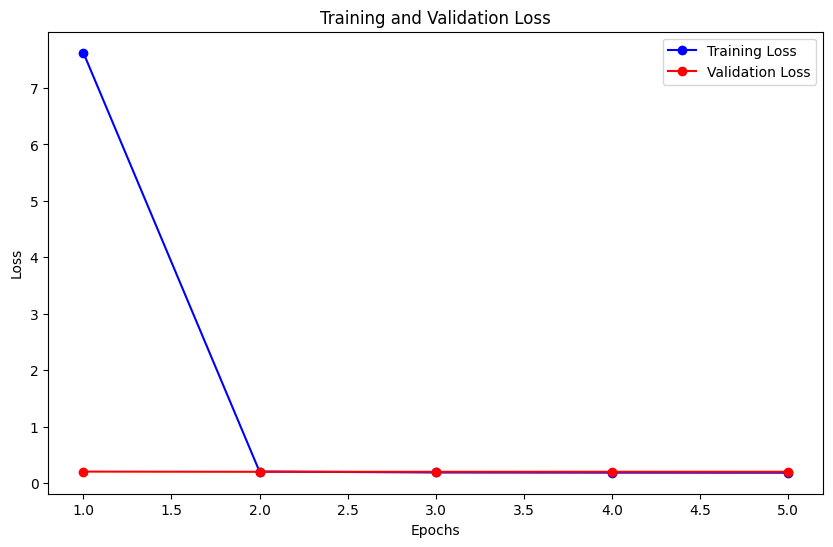

In [ ]:
# Plot training and validation loss
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate with MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict test data
predictions = model.predict([X_test_user_ids, X_test_track_ids, X_test_other_features])

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

4545/4545 [==============================] - 7s 2ms/step
Mean Absolute Error (MAE): 0.3257415590770484
Root Mean Squared Error (RMSE): 0.43752781507552113


Neural Hybrid Model:

MAE: 0.326

RMSE: 0.438

In [ ]:
# Evaluate with Hit Rate which means if any test track appear in the top-N recommendations

# Get top n recommendation tracks with one user
def top_n_recommend(model, user_id, all_tracks, user_seen_tracks, n):
    track_to_predict = [track for track in all_tracks if track not in user_seen_tracks]

    user_ids = np.array([user_id] * len(track_to_predict), dtype='int32')
    track_ids = np.array(track_to_predict, dtype='int32')

    filtered_df = merged_df[merged_df['track_id'].isin(track_ids)].drop_duplicates(subset='track_id')
    other_features = filtered_df.drop(['user_id', 'track_id', 'playcount', 'name', 'tags'], axis=1).values

    # Predict playcount for all tracks with this user
    predictions = model.predict([user_ids, track_ids, other_features]).flatten()

    # Get top n tracks with highest playcounts predicted
    top_n_index = np.argsort(predictions)[-n:]
    top_n_tracks = [all_tracks[i] for i in top_n_index]

    return top_n_tracks

# Calculate average hit rate across all test datasets
def average_hit_rate(model, test_data, all_tracks, n):
    total_hit_count = 0
    user_count = 0

    for user_id, group in test_data.groupby('user_id'):

        # Get user_seen_tracks from training dataset
        user_seen_tracks = train[train['user_id'] == user_id]['track_id'].tolist()
        top_n_recommends = top_n_recommend(model, user_id, all_tracks, user_seen_tracks, n)
        test_tracks = group['track_id'].values

        print(user_id)
        print(test_tracks)
        print(top_n_recommends)

        hit = any(track in top_n_recommends for track in test_tracks)
        if hit:
            print('***')
        total_hit_count += int(hit)
        print(total_hit_count)
        user_count += 1
    print('----')
    print(user_count)
    return total_hit_count/user_count if user_count > 0 else 0

all_tracks = pd.unique(merged_df['track_id'])
n = 50

# Choose 500 users track records from test dataset for testing
unique_users = test['user_id'].unique()
sample_users = np.random.choice(unique_users, size=500, replace=False)
test_data = test[test['user_id'].isin(sample_users)]

hit_rate = average_hit_rate(model, test_data, all_tracks, n)
print(f'The Hit Rate is {hit_rate}')

677/677 [==============================] - 1s 2ms/step
5
[ 2349  6800    93  1558   337 15750  3965   286  6817  4003   312 14518
   287  7930  1255   359  6113     0  7933 14097  3261  1250  7747  2337
  1514   291   299  3968  8995   327  3284   323   380  2347  4107   349
  3224  3999   241   367]
[3101, 4648, 9108, 369, 127, 354, 12816, 171, 6378, 270, 85, 329, 17363, 149, 341, 92, 1512, 4689, 278, 2449, 5109, 137, 271, 1462, 5845, 43, 298, 54, 188, 20433, 103, 242, 1511, 570, 165, 273, 343, 182, 187, 4687, 126, 344, 351, 552, 361, 179, 73, 356, 8115, 287]
***
1
677/677 [==============================] - 1s 2ms/step
10
[ 2191  3451  1233  1831  9651  4892 14814  2504  1665   227  4982   803
  7865  6849  3265  5097    52   884   640 11962  1574   447   568   203
  3259  1983   204 12538  8021  4955  4968  6837     0  2047  5107   770
 14882  9441  2493   426]
[367, 103, 10990, 6373, 169, 14985, 749, 4635, 339, 268, 12800, 351, 148, 4343, 91, 1517, 4690, 83, 16648, 276, 2452, 3096, 

Neural Hybrid Model Hit Rate as shown above is **0.376**.

After fine-tuning, this proposed Neural Hybrid achieved good Hit Rate performance through integrating user_item interactions and item features.



# 4.  Methods Comparison

The four methods were implemented in our Music Recommender Project. For some methods, multiple models were built to compare internally, and finally chose the best performing one.

**4 Methods Comparsion and Analysis:**

Methods | Content-based | CF(SVD) | Neural CF(NeuMF) | Neural Hybrid
:- | :-: | :-: | :-: | :-:
MAE | Na | 0.643 | 0.294 | 0.326
RMSE | Na | 0.983 | 0.458 | 0.438
**Hit Rate** | 0.168 | 0.450 | 0.434 | 0.376

Above is the metric comparison of 4 methods that were implemented as above. Here we mainly focused on Hit Rate to compare the 4 methods which recommends top 50 songs for macro users to see if there is a hit.

Firstly, Content based is great method to deal with cold start problem when there are not enough interactions although it has lower hit rate of 0.168 for active users. Collaborative Filtering with Hit Rate of 0.450 is quite effective and sucessful in recommendation systems when there are ample user-item iteractions. The proprosed NeuMF method that combined CF and neural network also performed well with Hit Rate of 0.434, beating most other CF models, except for SVD. The last Neural Hybrid method performed not bad with a Hit Rate of 0.376



# 5.  Conclusion and Future Work

**Conclusion:**

In order to build a great music recommender system that users would like. We have done the following works.


*   Chose approriate dataset that both contains song feature and user listening history for our system to simulate.
*   Preprocessed dataset including feature selection, encoding, feature extraction, dataset merging etc.
*   4 methods were implemented. Content-based and CF are traditional and effective methods. 2 novel methods that combines neural network and content or CF were proposed and constructed based on some paper and existing work research. Also, experimented different models or fine-tuning for each of these 4 methods.
*   Conducted methods comparision and analysis. CF is an effective method to do items recommendation. NeuMF performs well and can be exprimented more for different cases.


**Future Work:**
*   Methods and models optimisation could be done for our methods
*   More expriments could done to integrate deep learning, content features and user-item actions like capturing sequential patterns in user listening history
*   Propose a hybrid and dynamic model that combine the strengts of different methods

**Acknowledgement:**

Finally, thank every team member for their hardwork and efforts. Thank our mentors Wayne Wobcke and Mingqin Yu for mentoring us and giving us advice.